<a href="https://colab.research.google.com/github/ivansudibyo14/GROUP_FINAL_PROJECT/blob/main/GFP_ok_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Dictionary


1.   RowNumber
2.   CustomerId
1.   Surname—the surname of a customer 
1.   CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
2.   Geography—a customer’s location 
1.   Gender
2.   Age—since older customers are less likely to leave their bank than younger ones.
1.   Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
2.   Balance—people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
1.   NumOfProducts—refers to the number of products that a customer has purchased through the bank.
2.   HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
1.   IsActiveMember—active customers are less likely to leave the bank.
2.   EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
1.   Exited—whether or not the customer left the bank (1 - exited, 0 - not exited)



# Import Python Library

In [ ]:
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
import matplotlib.pyplot as plt         # to perform simple interactive visualization
from datetime import datetime           #to perform manipulating dates and times
import seaborn as sns                  #to perform visualization with many color palettes, beatifull style and many statistical plots


# Read Churn for Bank Customers Data

In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1TnAoPPPw_c2yMYv7LeJqPVezICqHuS_iERdWq88eoHM/edit#gid=1385527598'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then collab can import it
df1 = pd.read_csv(sheet_url_trf) #define df to read csv
pd.set_option('display.max.columns',None) #to display all column, not separate)
df1.head() #only show first of 5 rows (not based on shorting etc)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

# Data Cleansing

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df1['CustomerId'].duplicated().sum()

0

In [ ]:
df1.drop('RowNumber', axis=1, inplace = True)
df1

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 13 columns]

In [ ]:
list_columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary', 'Exited']
for i in list_columns : 
  print(df1[i].unique())

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 560 752 701 53

In [ ]:
df1['CustomerId'] = df1['CustomerId'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  object 
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [ ]:
df1.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

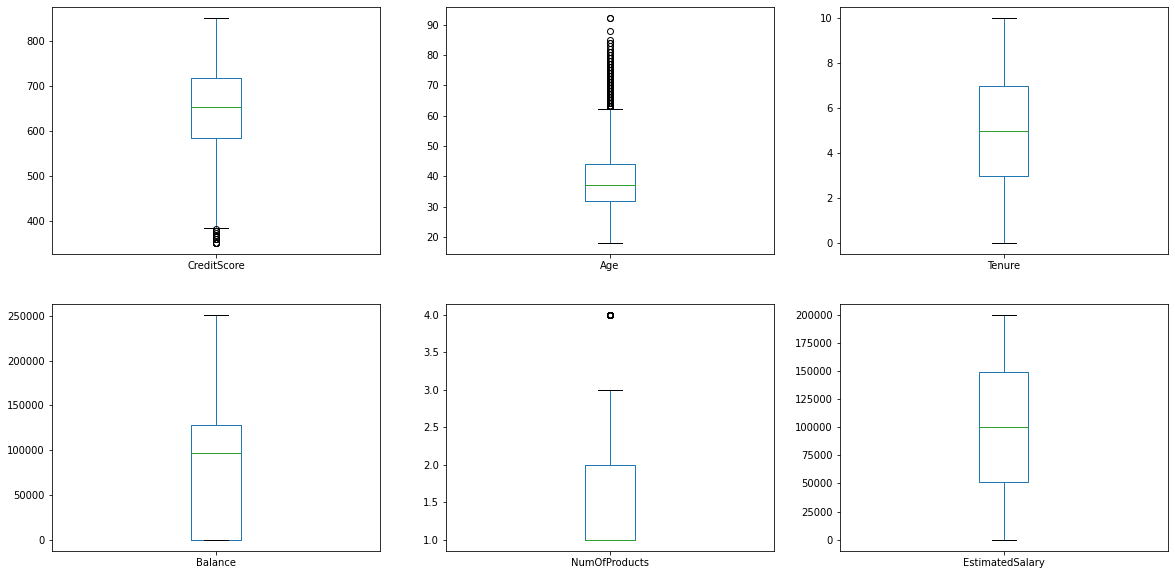

In [ ]:
# filter numeric column
numeric_column = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(numeric_column):
    a = df1.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

# Since all data are assumed as natural part of the observation, outliers are not removed from the dataframe

# **EDA**

## Show No of Customers based on Age

In [ ]:
Total_User = df1.groupby(['Age'])['CustomerId'].nunique().reset_index()
Total_User

Age  CustomerId
0    18          22
1    19          27
2    20          40
3    21          53
4    22          84
..  ...         ...
65   83           1
66   84           2
67   85           1
68   88           1
69   92           2

[70 rows x 2 columns]

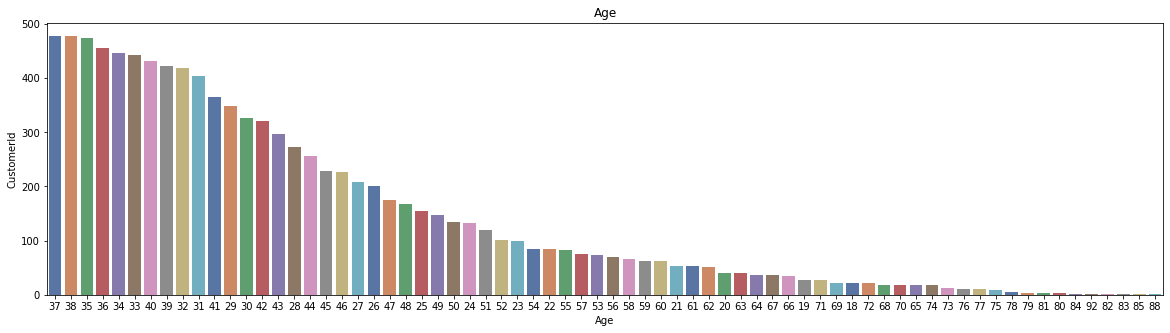

In [ ]:
plt.figure(figsize=(20, 5))
g1= df1.groupby(['Age'])['CustomerId'].nunique()
g1=g1.reset_index()
sns.barplot(x='Age',
           y='CustomerId',
           data=g1,order=g1.sort_values('CustomerId',ascending = False).Age, palette='deep')
plt.title("Age")
plt.show()

#user exited by Age

In [ ]:
df_exited= df1[df1['Exited'] == 1] 
Total_User_exited = df_exited.groupby(['Age'])['CustomerId'].nunique().reset_index()
Total_User_exited

Age  CustomerId
0    18           2
1    19           1
2    20           2
3    21           3
4    22          12
5    23           6
6    24          14
7    25           6
8    26          14
9    27          13
10   28          23
11   29          28
12   30          24
13   31          33
14   32          32
15   33          44
16   34          33
17   35          57
18   36          53
19   37          62
20   38          63
21   39          72
22   40          89
23   41          69
24   42          77
25   43          88
26   44          73
27   45          87
28   46          91
29   47          77
30   48          80
31   49          75
32   50          71
33   51          66
34   52          64
35   53          40
36   54          51
37   55          48
38   56          50
39   57          38
40   58          29
41   59          30
42   60          32
43   61          21
44   62          21
45   63          18
46   64          12
47   65           8
48   66           7
49   67           5
50   68           6
51   69           2
52   70           4
53   71           7
54   72           1
55   73           1
56   74           1
57   84           1

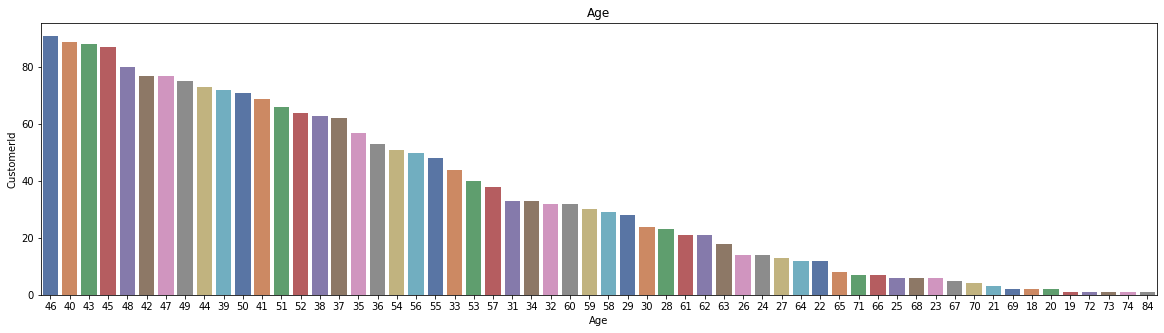

In [ ]:
plt.figure(figsize=(20, 5))
Total_User_exited=Total_User_exited.reset_index()
sns.barplot(x='Age',
           y='CustomerId',
           data=Total_User_exited,order=Total_User_exited.sort_values('CustomerId',ascending = False).Age, palette='deep')
plt.title("Age")
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  object 
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [ ]:
# df1.loc[df1['Age']<10, 'Age_group'] = 'teenage'
# df1.loc[df1['Age'].between(10,25), 'Age_group'] = 'Gen Z'
# df1.loc[df1['Age'].between(26,41), 'Age_group'] = 'Millennials'
# df1.loc[df1['Age'].between(42,57), 'Age_group'] = 'Gen X'
# df1.loc[df1['Age'].between(58,67), 'Age_group'] = 'Boomers II'
# df1.loc[df1['Age'].between(68,76), 'Age_group'] = 'Boomers I'
# df1.loc[df1['Age'].between(77,94), 'Age_group'] = 'Post War'
# df1.loc[df1['Age']>=95, 'Age_group'] = 'WWII'

In [ ]:
# Create age group
df1['Age_group'] = pd.cut(x=df1['Age'], bins=[10, 26, 42, 58, 68, 77, 94]
                               ,labels=['Gen Z','Millennials','Gen X','Boomers II','Boomers I','Post War'])
df1

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0      15634602   Hargrave          619    France  Female   42       2   
1      15647311       Hill          608     Spain  Female   41       1   
2      15619304       Onio          502    France  Female   42       8   
3      15701354       Boni          699    France  Female   39       1   
4      15737888   Mitchell          850     Spain  Female   43       2   
...         ...        ...          ...       ...     ...  ...     ...   
9995   15606229   Obijiaku          771    France    Male   39       5   
9996   15569892  Johnstone          516    France    Male   35      10   
9997   15584532        Liu          709    France  Female   36       7   
9998   15682355  Sabbatini          772   Germany    Male   42       3   
9999   15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited    Age_group  
0          1  Millennials  
1          0  Millennials  
2          1  Millennials  
3          0  Millennials  
4          0        Gen X  
...      ...          ...  
9995       0  Millennials  
9996       0  Millennials  
9997       1  Millennials  
9998       1  Millennials  
9999       0  Millennials  

[10000 rows x 14 columns]

In [ ]:
Total_User1 = df1.groupby(['Age_group'])['CustomerId'].nunique().reset_index()
Total_User1

Age_group  CustomerId
0        Gen Z         811
1  Millennials        6295
2        Gen X        2306
3   Boomers II         415
4    Boomers I         149
5     Post War          24

Millenials dominate the age group by 6295 users (62%)

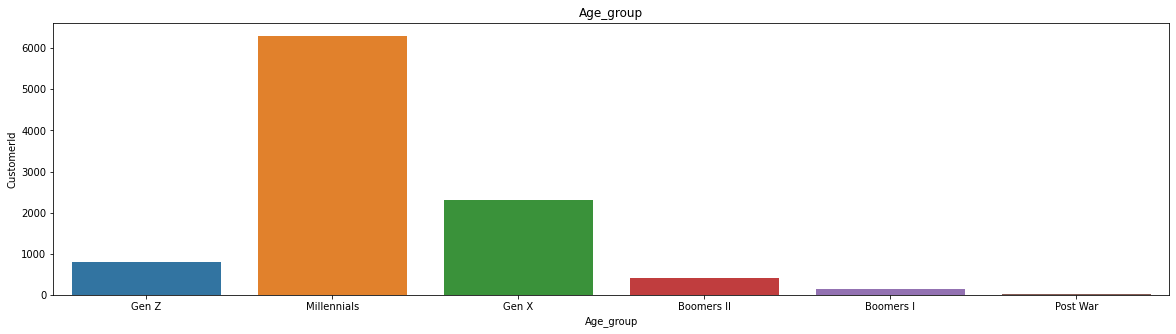

In [ ]:
plt.figure(figsize=(20, 5))
ga= df1.groupby(['Age_group'])['CustomerId'].nunique()
ga=ga.reset_index()
sns.barplot(x='Age_group',
           y='CustomerId',
           data=ga)
plt.title("Age_group")
plt.show()

In [ ]:
ga

Age_group  CustomerId
0        Gen Z         811
1  Millennials        6295
2        Gen X        2306
3   Boomers II         415
4    Boomers I         149
5     Post War          24

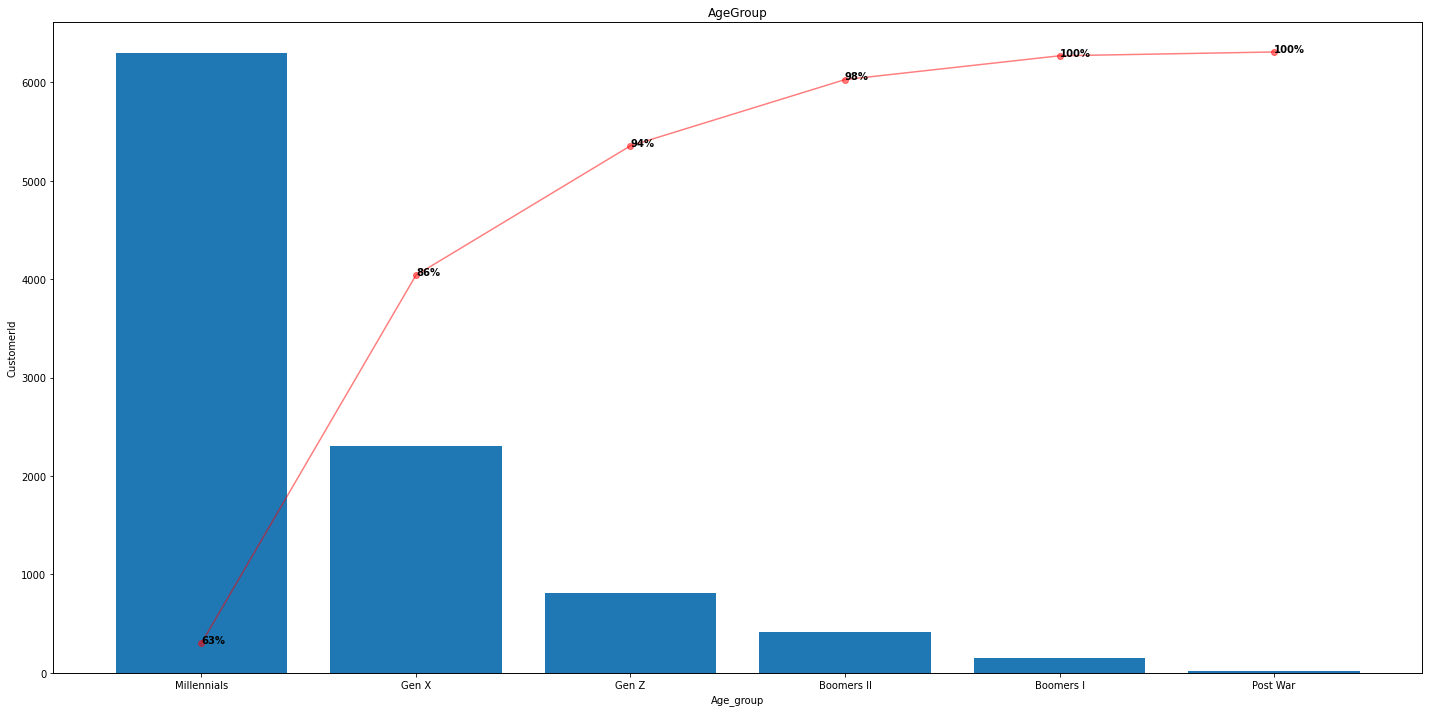

In [ ]:
def pareto_plot(ga, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = ga.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(ga, x='Age_group', y='CustomerId', title='AgeGroup')



86% of users are millennials and gen x

## Show No of Customers based on whether or not the customer has credit card 

           CustomerId
HasCrCard            
0                2945
1                7055


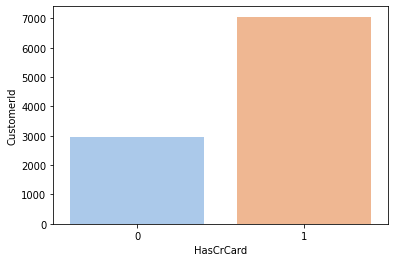

In [ ]:
grouped = df1.groupby('HasCrCard').agg('nunique')['CustomerId']
grouped = pd.DataFrame(grouped)
print(grouped)
# grouped
sns.barplot(x=grouped.index, y='CustomerId', data=grouped, palette='pastel')

## Show No of Customers Who are exited / not exited

        CustomerId
Exited            
0             7963
1             2037


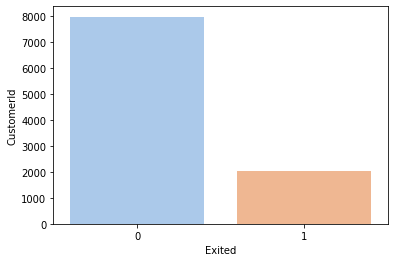

In [ ]:
grouped1 = df1.groupby('Exited').agg('nunique')['CustomerId']
grouped1 = pd.DataFrame(grouped1)
print(grouped1)
# grouped
sns.barplot(x=grouped1.index, y='CustomerId', data=grouped1, palette='pastel')

## Show No of Customers based on Credit Score

In [ ]:
# Create credit category refer to vantage score
df1['CreditCategory'] = pd.cut(x=df1['CreditScore'], bins=[300, 550, 650, 700, 750, 850]
                               ,labels=['Very Poor','Poor','Fair','Good','Excellent'])
df1


CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0      15634602   Hargrave          619    France  Female   42       2   
1      15647311       Hill          608     Spain  Female   41       1   
2      15619304       Onio          502    France  Female   42       8   
3      15701354       Boni          699    France  Female   39       1   
4      15737888   Mitchell          850     Spain  Female   43       2   
...         ...        ...          ...       ...     ...  ...     ...   
9995   15606229   Obijiaku          771    France    Male   39       5   
9996   15569892  Johnstone          516    France    Male   35      10   
9997   15584532        Liu          709    France  Female   36       7   
9998   15682355  Sabbatini          772   Germany    Male   42       3   
9999   15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited    Age_group CreditCategory  
0          1  Millennials           Poor  
1          0  Millennials           Poor  
2          1  Millennials      Very Poor  
3          0  Millennials           Fair  
4          0        Gen X      Excellent  
...      ...          ...            ...  
9995       0  Millennials      Excellent  
9996       0  Millennials      Very Poor  
9997       1  Millennials           Good  
9998       1  Millennials      Excellent  
9999       0  Millennials      Excellent  

[10000 rows x 15 columns]

In [ ]:
# Group by credit category
Credit_Score = df1.groupby(['CreditCategory'])['CustomerId'].nunique().reset_index()
Credit_Score

CreditCategory  CustomerId
0      Very Poor        1621
1           Poor        3316
2           Fair        1947
3           Good        1518
4      Excellent        1598

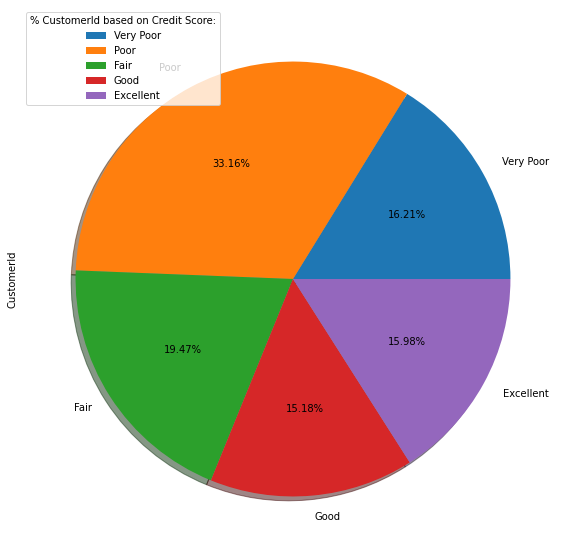

In [ ]:
# Add label
mylabels = ['Very Poor', 'Poor','Fair','Good','Excellent']

# Show pie plot of percentage for each credit category
Credit_Score.plot.pie( y='CustomerId', autopct='%.2f%%', figsize=(10,10), labels = mylabels, shadow = True, rot=0)

# showing legend
plt.legend(title = '% CustomerId based on Credit Score:')

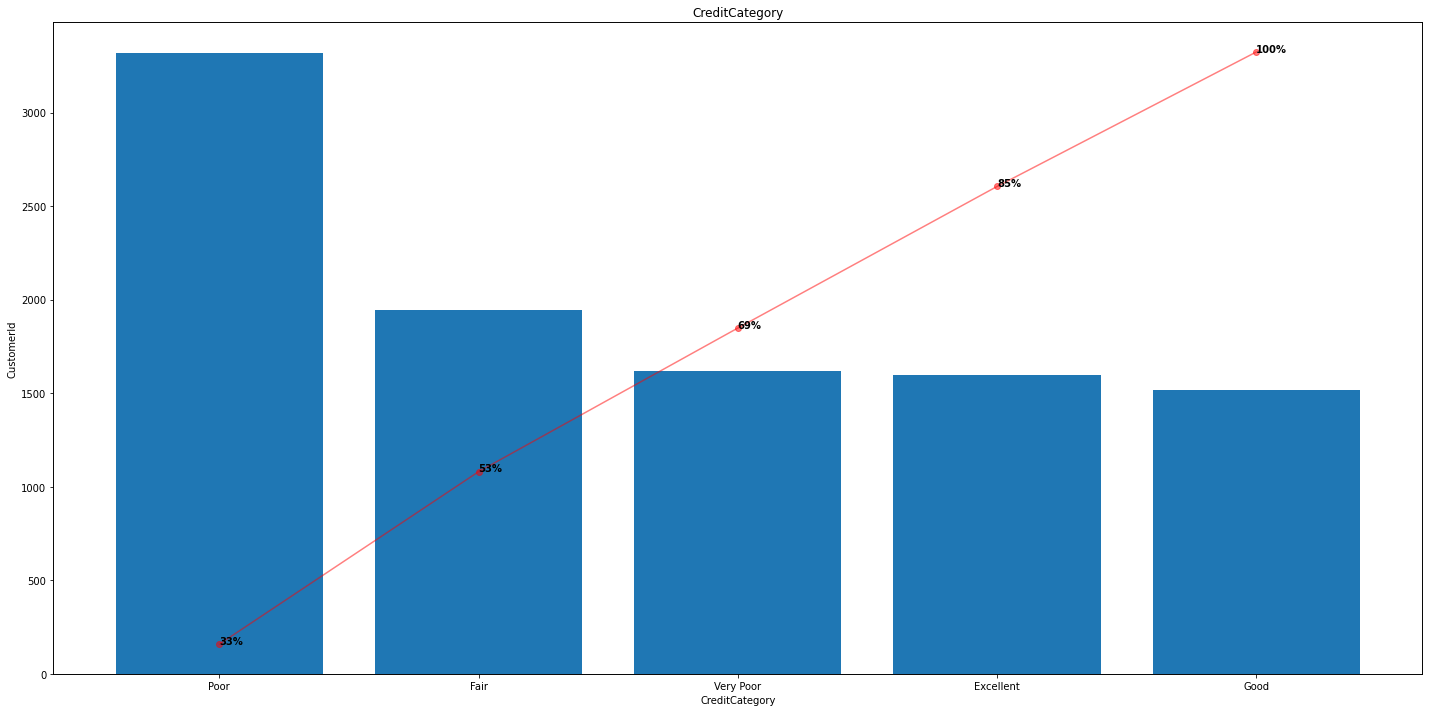

In [ ]:
def pareto_plot(Credit_Score, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = Credit_Score.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(Credit_Score, x='CreditCategory', y='CustomerId', title='CreditCategory')



## Show No of Customers based on Tenure

In [ ]:
# Group by tenure
Tenure = df1.groupby(['Tenure'])['CustomerId'].nunique().reset_index()
Tenure

Tenure  CustomerId
0        0         413
1        1        1035
2        2        1048
3        3        1009
4        4         989
5        5        1012
6        6         967
7        7        1028
8        8        1025
9        9         984
10      10         490

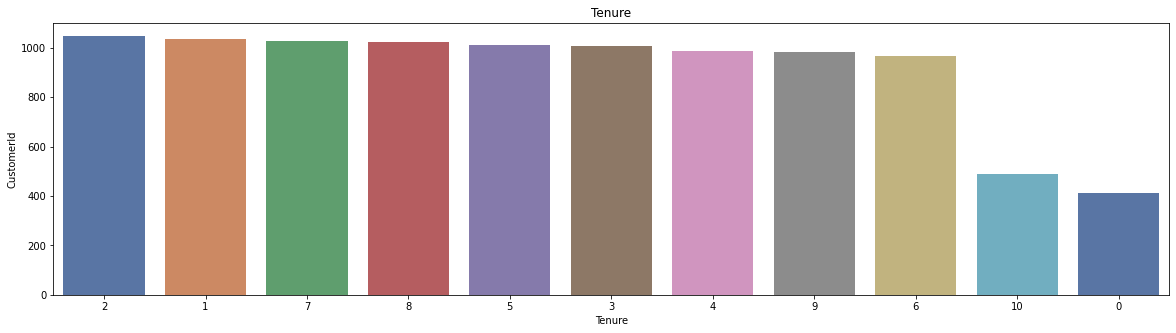

In [ ]:
# Display bar chart with x from 0 to 10
plt.figure(figsize=(20, 5))
Tenure= df1.groupby(['Tenure'])['CustomerId'].nunique()
Tenure=Tenure.reset_index()
sns.barplot(x='Tenure',
           y='CustomerId',
           data=Tenure,order=Tenure.sort_values('CustomerId',ascending = False).Tenure, palette='deep')
plt.title("Tenure")
plt.show()

In [ ]:
Tenure=Tenure.sort_values('CustomerId',ascending = False)
Tenure

Tenure  CustomerId
2        2        1048
1        1        1035
7        7        1028
8        8        1025
5        5        1012
3        3        1009
4        4         989
9        9         984
6        6         967
10      10         490
0        0         413

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

Tenure = Tenure.sort_values(by='CustomerId',ascending=False)
Tenure["cumpercentage"] = Tenure["CustomerId"].cumsum()/Tenure["CustomerId"].sum()*100
Tenure


Tenure  CustomerId  cumpercentage
2        2        1048          10.48
1        1        1035          20.83
7        7        1028          31.11
8        8        1025          41.36
5        5        1012          51.48
3        3        1009          61.57
4        4         989          71.46
9        9         984          81.30
6        6         967          90.97
10      10         490          95.87
0        0         413         100.00

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

sorted = Tenure.sort_values(by='CustomerId',ascending=False)
sorted["cumpercentage"] = sorted["CustomerId"].cumsum()/sorted["CustomerId"].sum()*100
sorted['Tenure'] = sorted.Tenure.astype('category')

sorted


Tenure  CustomerId  cumpercentage
2       2        1048          10.48
1       1        1035          20.83
7       7        1028          31.11
8       8        1025          41.36
5       5        1012          51.48
3       3        1009          61.57
4       4         989          71.46
9       9         984          81.30
6       6         967          90.97
10     10         490          95.87
0       0         413         100.00

<ipython-input-33-213b4cb31297>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax2 = sns.lineplot(data=sorted.cumpercentage * (sorted.max().CustomerId / 100), color="C1", marker="D", ms=7)
<ipython-input-33-213b4cb31297>:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax2.annotate(txt, (i, sorted.cumpercentage[i]* (sorted.max().CustomerId / 100)), fontweight='heavy')


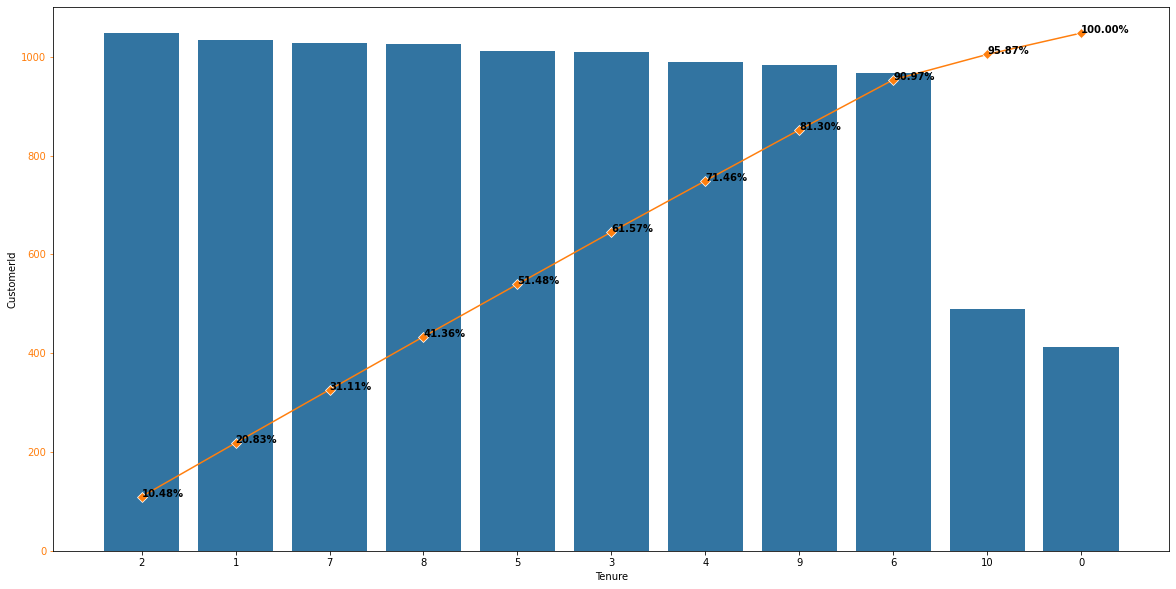

In [ ]:
sorted=sorted.reset_index()
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1 = sns.barplot(x='Tenure',
           y='CustomerId',order=Tenure.sort_values('CustomerId',ascending = False).Tenure,
           data=sorted, color="C0")

ax2 = sns.lineplot(data=sorted.cumpercentage * (sorted.max().CustomerId / 100), color="C1", marker="D", ms=7)

ax1.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

#create labels

pct_format='{0:.2%}'
formatted_weights = [pct_format.format(x/100) for x in sorted.cumpercentage]

for i, txt in enumerate(formatted_weights):
  ax2.annotate(txt, (i, sorted.cumpercentage[i]* (sorted.max().CustomerId / 100)), fontweight='heavy')  

plt.show()

## Show No of Customers based on Active_Member

                CustomerId
IsActiveMember            
0                     4849
1                     5151


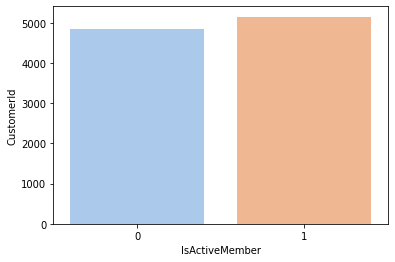

In [ ]:
# Group by active member
Active_Member = df1.groupby('IsActiveMember').agg('nunique')['CustomerId']
Active_Member = pd.DataFrame(Active_Member)
print(Active_Member)
# Display bar plot
sns.barplot(x=Active_Member.index, y='CustomerId', data=Active_Member, palette='pastel')

## Show No of Customers based on NumOfProduts

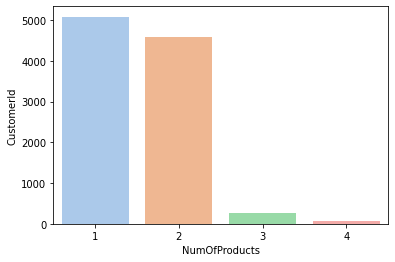

In [ ]:
NumOfProducts = df1.groupby('NumOfProducts').agg('nunique')['CustomerId']
NumOfProducts=NumOfProducts.reset_index()
# grouped
sns.barplot(x='NumOfProducts', y='CustomerId', data=NumOfProducts, palette='pastel')

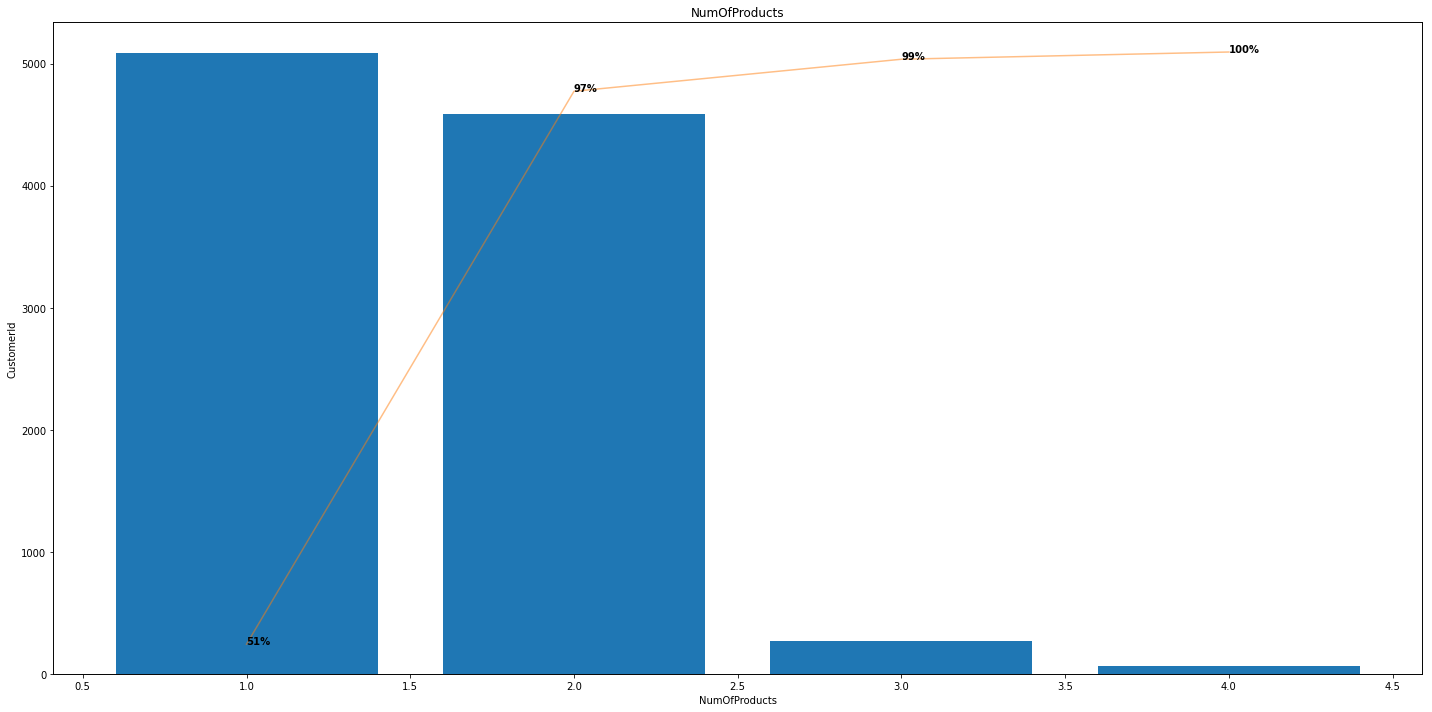

In [ ]:
def pareto_plot(NumOfProducts, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = NumOfProducts.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'C1', alpha=0.5)
    ax2.set_ylabel('', color='C1')
    ax2.tick_params('y', colors='C1')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(NumOfProducts, x='NumOfProducts', y='CustomerId', title='NumOfProducts')



## Show No of Customers based on Gender

In [ ]:
User_gender = df1.copy()

# show number of user data (unique) based on gender
User_gender = User_gender.groupby(['Gender']).nunique()['CustomerId'].reset_index()
User_gender 

Gender  CustomerId
0  Female        4543
1    Male        5457

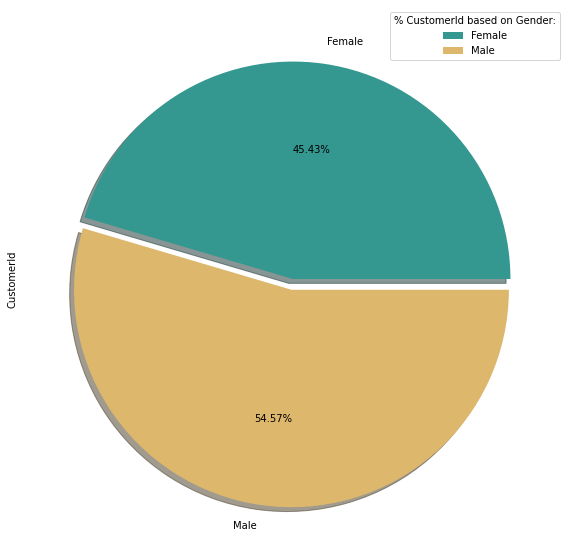

In [ ]:
# This is just a cosmetic
myexplode = [0,0.05]
mycolors = ['#349891', '#DCB76C']
mylabels = ['Female', 'Male']

# Show pie plot of Percentage orderd per payment type
User_gender.plot.pie( y='CustomerId', autopct='%.2f%%', figsize=(10,10), labels = mylabels, explode = myexplode, colors = mycolors, shadow = True, rot=0)

# showing legend
plt.legend(title = '% CustomerId based on Gender:')

## Show No of Customers based on Gender & NumOfProducts 

In [ ]:
# identify outer pie
Outer = df1.copy()
# show number of transaction per gender
Outer = Outer.groupby(['Gender']).nunique()['CustomerId']

# identify inner pie
Inner = df1.copy()
# Show number of transaction based on gender and payment methode
Inner = Inner.groupby(['Gender','NumOfProducts']).nunique()['CustomerId']


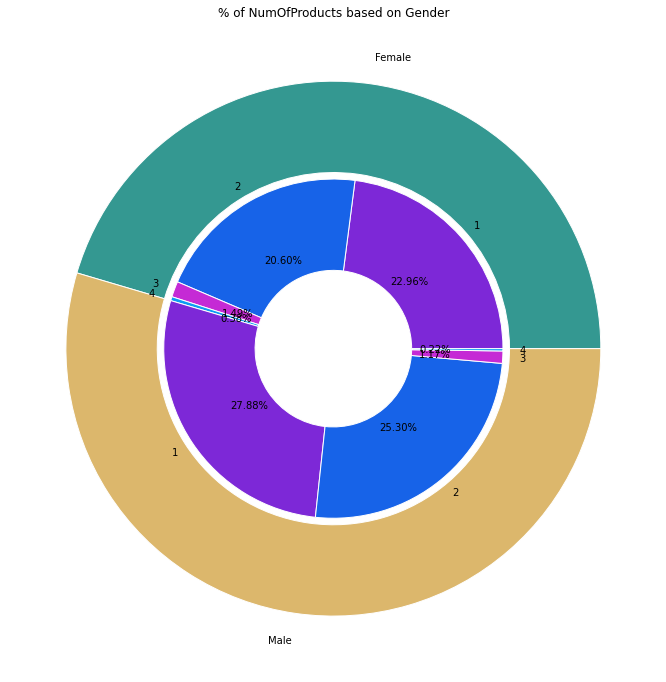

In [ ]:
# Cosmetic
fig, ax = plt.subplots(figsize=(24,12))
size = 0.35
myoutercolors = ['#349891', '#DCB76C']
myinnercolors = ['#7d28d7','#1763e8','#c52ad5','#0d9cf2']

# Make outer pie
ax.pie(Outer.values.flatten(), radius=1.025,
       labels=Outer.index,
       colors =myoutercolors,
       wedgeprops=dict(width=size, edgecolor='white', ))

# inner labeling
inner_labels = Inner.index.get_level_values(1)

# Make inner pie
ax.pie(Inner.values.flatten(), radius=1-size, 
       labels = inner_labels,
       autopct='%.2f%%', 
       colors =myinnercolors,
       wedgeprops=dict(width=size, edgecolor='w'))
# autopct for labeling in %, wedgepprops for line thickness properties in chart

ax.set(aspect="equal", title='% of NumOfProducts based on Gender')

# aspect = equal to set both axes to be equal
plt.show()

## Show No of Geography based on Costumers

In [ ]:
User_Geography= df1.copy()

# show number of user data (unique) based on Geography
User_Geography = User_Geography.groupby(['Geography']).nunique()['CustomerId'].reset_index()
User_Geography  

Geography  CustomerId
0    France        5014
1   Germany        2509
2     Spain        2477

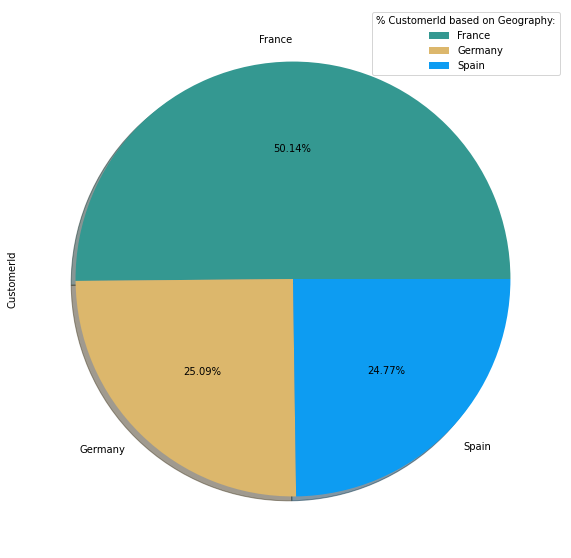

In [ ]:
# This is just a cosmetic
myexplode = [0,0.05]
mycolors = ['#349891', '#DCB76C','#0d9cf2']
mylabels = ['France','Germany','Spain']

# Show pie plot of Percentage orderd per payment type
User_Geography.plot.pie( y='CustomerId', autopct='%.2f%%', figsize=(10,10), labels = mylabels, x = myexplode, colors = mycolors, shadow = True, rot=0)

# showing legend
plt.legend(title = '% CustomerId based on Geography:')

##Show No of Balance based on Costumers

In [ ]:
print(df1[df1['Balance'].isnull()])

Empty DataFrame
Columns: [CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Age_group, CreditCategory]
Index: []


In [ ]:
df1['Balance'] = pd.to_numeric(df1['Balance'], errors='coerce')

In [ ]:
df1 = df1.dropna(subset=['Balance'])

In [ ]:
df1['Balance'] = df1['Balance'].astype(int)

In [ ]:
df1['Balancecategory'] = pd.cut(x=df1['Balance'], bins=5,labels=['Level 1','Level 2','Level 3','Level 4','Level 5'])
df1

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0      15634602   Hargrave          619    France  Female   42       2   
1      15647311       Hill          608     Spain  Female   41       1   
2      15619304       Onio          502    France  Female   42       8   
3      15701354       Boni          699    France  Female   39       1   
4      15737888   Mitchell          850     Spain  Female   43       2   
...         ...        ...          ...       ...     ...  ...     ...   
9995   15606229   Obijiaku          771    France    Male   39       5   
9996   15569892  Johnstone          516    France    Male   35      10   
9997   15584532        Liu          709    France  Female   36       7   
9998   15682355  Sabbatini          772   Germany    Male   42       3   
9999   15628319     Walker          792    France  Female   28       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0           0              1          1               1        101348.88   
1       83807              1          0               1        112542.58   
2      159660              3          1               0        113931.57   
3           0              2          0               0         93826.63   
4      125510              1          1               1         79084.10   
...       ...            ...        ...             ...              ...   
9995        0              2          1               0         96270.64   
9996    57369              1          1               1        101699.77   
9997        0              1          0               1         42085.58   
9998    75075              2          1               0         92888.52   
9999   130142              1          1               0         38190.78   

      Exited    Age_group CreditCategory Balancecategory  
0          1  Millennials           Poor         Level 1  
1          0  Millennials           Poor         Level 2  
2          1  Millennials      Very Poor         Level 4  
3          0  Millennials           Fair         Level 1  
4          0        Gen X      Excellent         Level 3  
...      ...          ...            ...             ...  
9995       0  Millennials      Excellent         Level 1  
9996       0  Millennials      Very Poor         Level 2  
9997       1  Millennials           Good         Level 1  
9998       1  Millennials      Excellent         Level 2  
9999       0  Millennials      Excellent         Level 3  

[10000 rows x 16 columns]

In [ ]:
Balance = df1.groupby(['Balancecategory'])['CustomerId'].nunique().reset_index()
Balance

Balancecategory  CustomerId
0         Level 1        3692
1         Level 2        1534
2         Level 3        3827
3         Level 4         915
4         Level 5          32

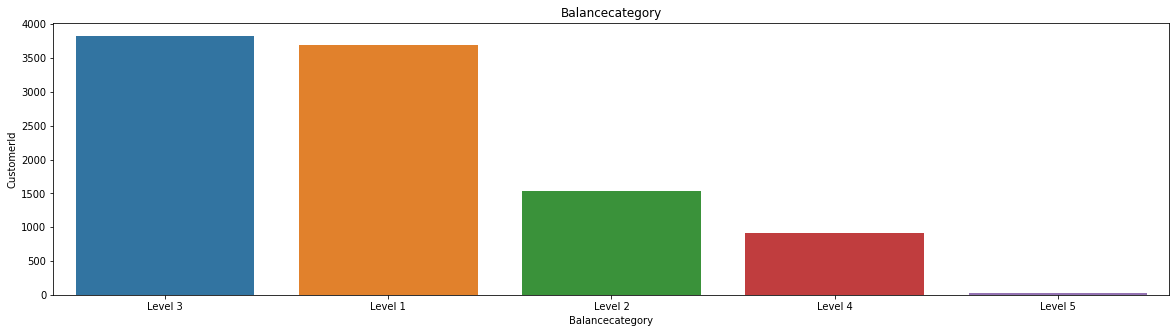

In [ ]:
plt.figure(figsize=(20, 5))
g1= df1.groupby(['Balancecategory'])['CustomerId'].nunique()
g1=g1.reset_index()
sns.barplot(x='Balancecategory',
           y='CustomerId',
           data=g1,order=g1.sort_values('CustomerId',ascending = False).Balancecategory)
plt.title("Balancecategory")
plt.show()

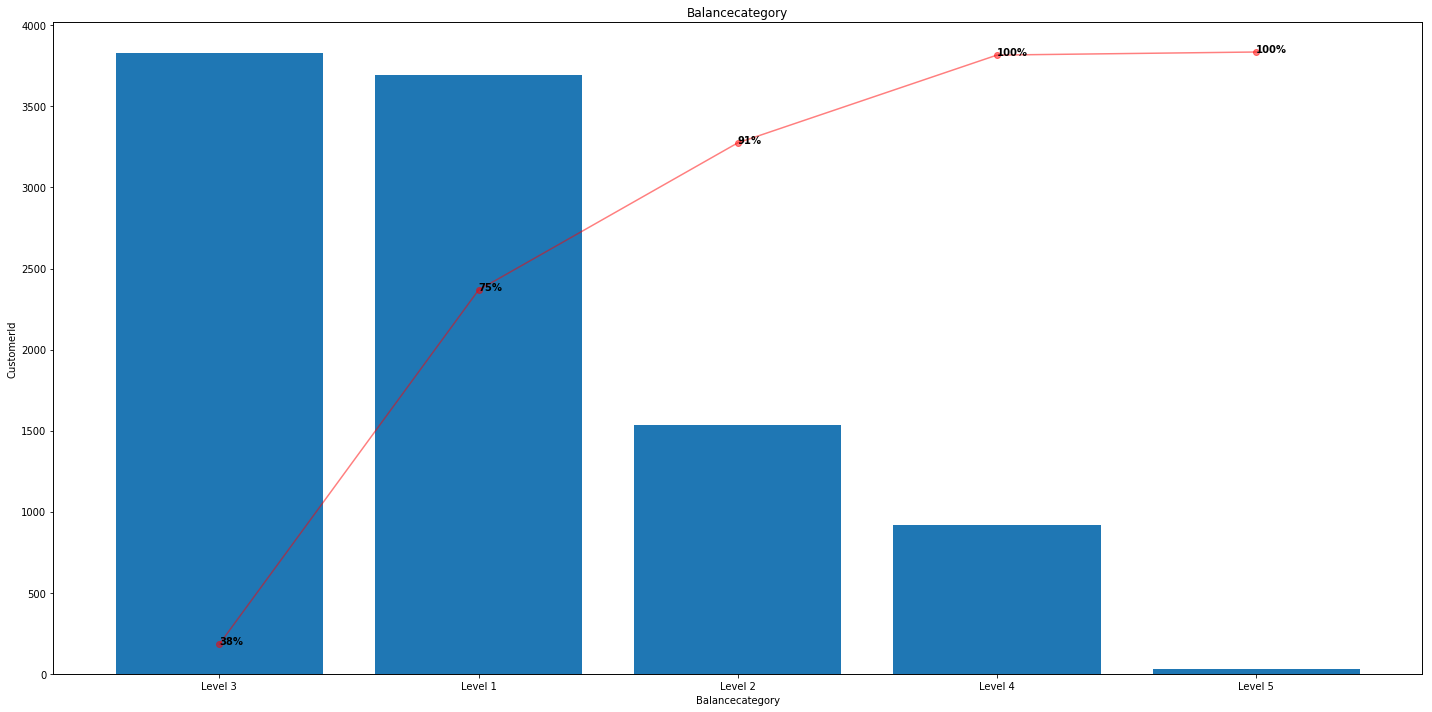

In [ ]:
def pareto_plot(g1, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = g1.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(g1, x='Balancecategory', y='CustomerId', title='Balancecategory')



##Show No of Estimated salary based on Costumers

In [ ]:
print(df1[df1['EstimatedSalary'].isnull()])

Empty DataFrame
Columns: [CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Age_group, CreditCategory, Balancecategory]
Index: []


In [ ]:
df1['EstimatedSalary'] = pd.to_numeric(df1['EstimatedSalary'], errors='coerce')

In [ ]:
df1 = df1.dropna(subset=['EstimatedSalary'])

In [ ]:
df1['EstimatedSalary'] = df1['EstimatedSalary'].astype(int)

In [ ]:
df1['EstimatedSalary'].describe()

count     10000.000000
mean     100089.748400
std       57510.491042
min          11.000000
25%       51001.750000
50%      100193.500000
75%      149387.750000
max      199992.000000
Name: EstimatedSalary, dtype: float64

In [ ]:
df1['EstimatedSalarycategory'] = pd.cut(x=df1['EstimatedSalary'], bins=[10000,25000, 50000, 100000, 150000, 190000],labels=['Very Poor','Poor','Fair','Good','Excellent'])
df1

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0      15634602   Hargrave          619    France  Female   42       2   
1      15647311       Hill          608     Spain  Female   41       1   
2      15619304       Onio          502    France  Female   42       8   
3      15701354       Boni          699    France  Female   39       1   
4      15737888   Mitchell          850     Spain  Female   43       2   
...         ...        ...          ...       ...     ...  ...     ...   
9995   15606229   Obijiaku          771    France    Male   39       5   
9996   15569892  Johnstone          516    France    Male   35      10   
9997   15584532        Liu          709    France  Female   36       7   
9998   15682355  Sabbatini          772   Germany    Male   42       3   
9999   15628319     Walker          792    France  Female   28       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0           0              1          1               1           101348   
1       83807              1          0               1           112542   
2      159660              3          1               0           113931   
3           0              2          0               0            93826   
4      125510              1          1               1            79084   
...       ...            ...        ...             ...              ...   
9995        0              2          1               0            96270   
9996    57369              1          1               1           101699   
9997        0              1          0               1            42085   
9998    75075              2          1               0            92888   
9999   130142              1          1               0            38190   

      Exited    Age_group CreditCategory Balancecategory  \
0          1  Millennials           Poor         Level 1   
1          0  Millennials           Poor         Level 2   
2          1  Millennials      Very Poor         Level 4   
3          0  Millennials           Fair         Level 1   
4          0        Gen X      Excellent         Level 3   
...      ...          ...            ...             ...   
9995       0  Millennials      Excellent         Level 1   
9996       0  Millennials      Very Poor         Level 2   
9997       1  Millennials           Good         Level 1   
9998       1  Millennials      Excellent         Level 2   
9999       0  Millennials      Excellent         Level 3   

     EstimatedSalarycategory  
0                       Good  
1                       Good  
2                       Good  
3                       Fair  
4                       Fair  
...                      ...  
9995                    Fair  
9996                    Good  
9997                    Poor  
9998                    Fair  
9999                    Poor  

[10000 rows x 17 columns]

In [ ]:
EstimatedSalary = df1.groupby(['EstimatedSalarycategory'])['CustomerId'].nunique().reset_index()
EstimatedSalary

EstimatedSalarycategory  CustomerId
0               Very Poor         709
1                    Poor        1236
2                    Fair        2537
3                    Good        2555
4               Excellent        1946

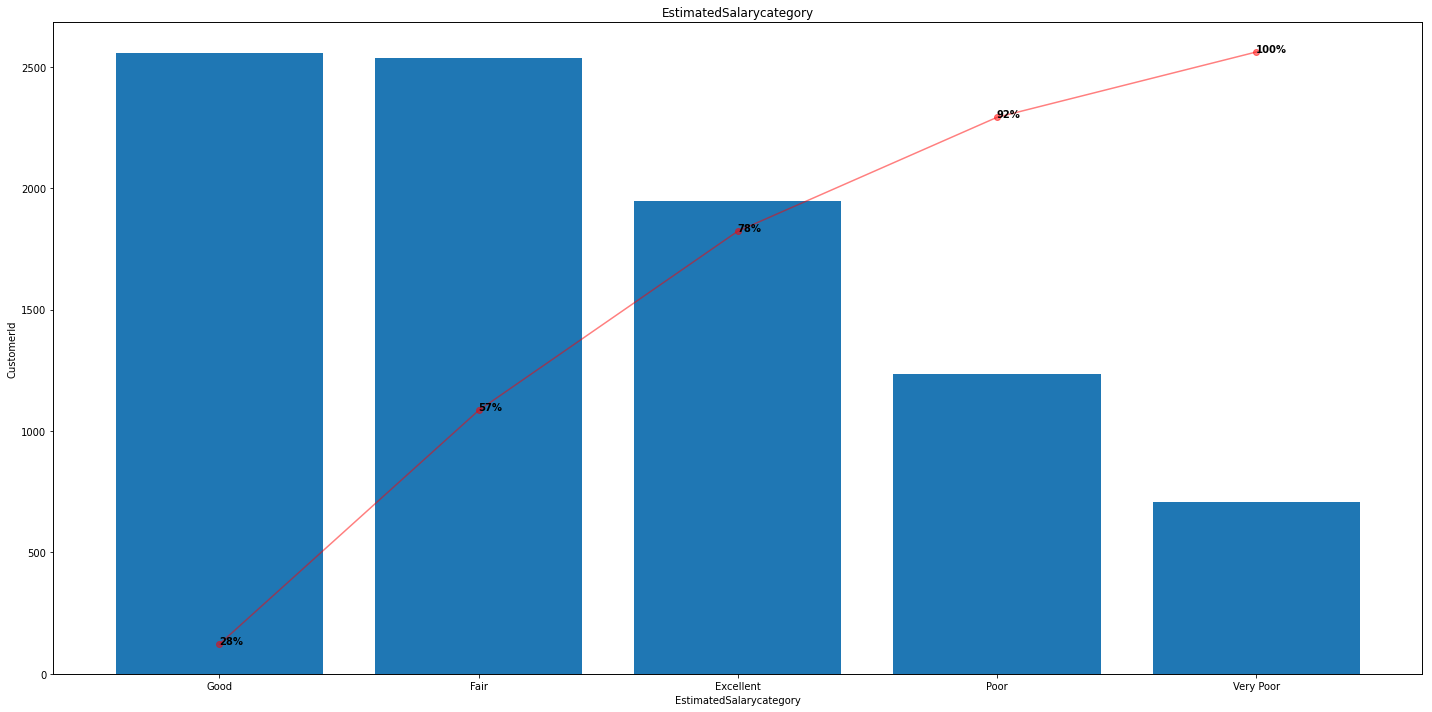

In [ ]:
def pareto_plot(EstimatedSalary, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = EstimatedSalary.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(EstimatedSalary, x='EstimatedSalarycategory', y='CustomerId', title='EstimatedSalarycategory')



# EDA Exited / Non-Exited Customers

In [ ]:
groupedExitedGeoCredit = df1.groupby(['Exited','Geography','CreditCategory']).agg('nunique')['CustomerId']
groupedExitedGeoCredit 


Exited  Geography  CreditCategory
0       France     Very Poor          686
                   Poor              1343
                   Fair               852
                   Good               650
                   Excellent          673
        Germany    Very Poor          266
                   Poor               563
                   Fair               326
                   Good               245
                   Excellent          295
        Spain      Very Poor          301
                   Poor               721
                   Fair               408
                   Good               317
                   Excellent          317
1       France     Very Poor          157
                   Poor               267
                   Fair               158
                   Good               113
                   Excellent          115
        Germany    Very Poor          146
                   Poor               275
                   Fair               130


In [ ]:
groupedExitedGeoSalary = df1.groupby(['Exited','Geography','EstimatedSalarycategory']).agg('nunique')['CustomerId']
groupedExitedGeoSalary 


Exited  Geography  EstimatedSalarycategory
0       France     Very Poor                   285
                   Poor                        534
                   Fair                       1088
                   Good                       1063
                   Excellent                   803
        Germany    Very Poor                   116
                   Poor                        203
                   Fair                        420
                   Good                        438
                   Excellent                   341
        Spain      Very Poor                   167
                   Poor                        252
                   Fair                        525
                   Good                        537
                   Excellent                   380
1       France     Very Poor                    58
                   Poor                         88
                   Fair                        209
                   Good                

In [ ]:
groupedExitedGeoGender = df1.groupby(['Exited','Geography','Gender']).agg('nunique')['CustomerId']
groupedExitedGeoGender 

Exited  Geography  Gender
0       France     Female    1801
                   Male      2403
        Germany    Female     745
                   Male       950
        Spain      Female     858
                   Male      1206
1       France     Female     460
                   Male       350
        Germany    Female     448
                   Male       366
        Spain      Female     231
                   Male       182
Name: CustomerId, dtype: int64

In [ ]:
groupedExitedGeo = df1.groupby(['Exited','Geography']).agg('nunique')['CustomerId']
groupedExitedGeo 

Exited  Geography
0       France       4204
        Germany      1695
        Spain        2064
1       France        810
        Germany       814
        Spain         413
Name: CustomerId, dtype: int64

In [ ]:
groupedExitedGeoProduct = df1.groupby(['Exited','Geography','NumOfProducts']).agg('nunique')['CustomerId']
groupedExitedGeoProduct

Exited  Geography  NumOfProducts
0       France     1                1950
                   2                2232
                   3                  22
        Germany    1                 771
                   2                 914
                   3                  10
        Spain      1                 954
                   2                1096
                   3                  14
1       France     1                 564
                   2                 135
                   3                  82
                   4                  29
        Germany    1                 578
                   2                 126
                   3                  86
                   4                  24
        Spain      1                 267
                   2                  87
                   3                  52
                   4                   7
Name: CustomerId, dtype: int64

In [ ]:
groupedExitedGeoBalance = df1.groupby(['Exited','Geography','Balancecategory']).agg('nunique')['CustomerId']
groupedExitedGeoBalance

Exited  Geography  Balancecategory
0       France     Level 1            2102
                   Level 2             548
                   Level 3            1233
                   Level 4             315
                   Level 5               6
        Germany    Level 1              19
                   Level 2             420
                   Level 3            1008
                   Level 4             243
                   Level 5               5
        Spain      Level 1            1045
                   Level 2             260
                   Level 3             599
                   Level 4             158
                   Level 5               2
1       France     Level 1             357
                   Level 2             110
                   Level 3             242
                   Level 4              91
                   Level 5              10
        Germany    Level 1               0
                   Level 2             114
                   

In [ ]:
groupedExitedSalaryBalance = df1.groupby(['Exited','EstimatedSalarycategory','Balancecategory']).agg('nunique')['CustomerId']
groupedExitedSalaryBalance

Exited  EstimatedSalarycategory  Balancecategory
0       Very Poor                Level 1            224
                                 Level 2             88
                                 Level 3            192
                                 Level 4             63
                                 Level 5              1
        Poor                     Level 1            394
                                 Level 2            159
                                 Level 3            342
                                 Level 4             94
                                 Level 5              0
        Fair                     Level 1            810
                                 Level 2            309
                                 Level 3            737
                                 Level 4            174
                                 Level 5              3
        Good                     Level 1            791
                                 Level 2            324

## 2 Layers

### Age Group

In [ ]:
groupedAge_groupExited = df1.groupby(['Age_group','Exited']).agg('nunique')['CustomerId']
groupedAge_groupExited

Age_group    Exited
Gen Z        0          751
             1           60
Millennials  0         5523
             1          772
Gen X        0         1278
             1         1028
Boomers II   0          255
             1          160
Boomers I    0          133
             1           16
Post War     0           23
             1            1
Name: CustomerId, dtype: int64

In [ ]:
groupedAge_groupExited

Age_group    Exited
Gen Z        0          751
             1           60
Millennials  0         5523
             1          772
Gen X        0         1278
             1         1028
Boomers II   0          255
             1          160
Boomers I    0          133
             1           16
Post War     0           23
             1            1
Name: CustomerId, dtype: int64

In [ ]:
groupedAge_groupExited1 = df1.groupby(['Age_group','Exited','HasCrCard','IsActiveMember']).agg('nunique')['CustomerId']
groupedAge_groupExited1

Age_group    Exited  HasCrCard  IsActiveMember
Gen Z        0       0          0                   98
                                1                  127
                     1          0                  250
                                1                  276
             1       0          0                   14
                                1                    7
                     1          0                   25
                                1                   14
Millennials  0       0          0                  784
                                1                  818
                     1          0                 1890
                                1                 2031
             1       0          0                  123
                                1                   89
                     1          0                  362
                                1                  198
Gen X        0       0          0                  155
                  

In [ ]:
df_exited= df1[df1['Exited'] == 1] 
ga_exited = df_exited.groupby(['Age_group','Exited'])['CustomerId'].nunique().reset_index()
ga_exited = ga_exited.sort_values(by='CustomerId',ascending=False)

ga_exited

Age_group  Exited  CustomerId
2        Gen X       1        1028
1  Millennials       1         772
3   Boomers II       1         160
0        Gen Z       1          60
4    Boomers I       1          16
5     Post War       1           1

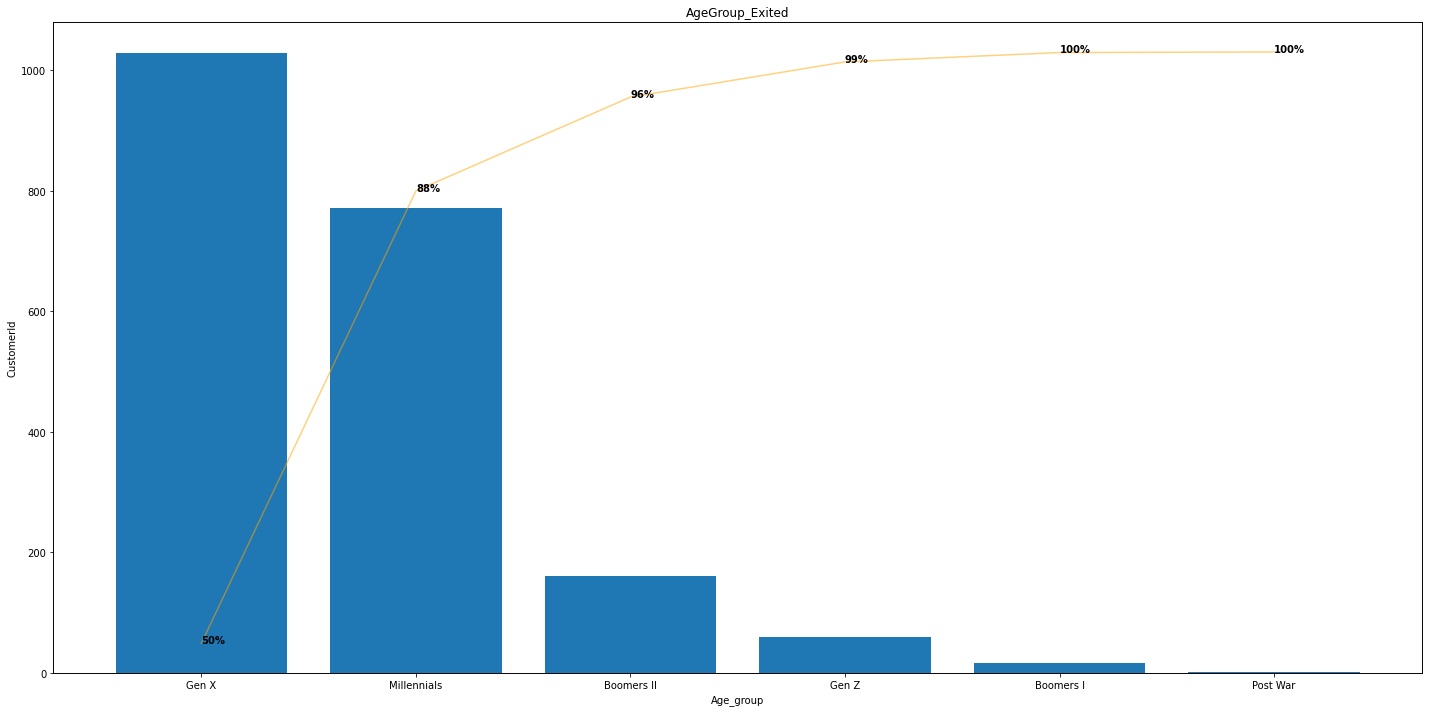

In [ ]:
def pareto_plot(ga_exited, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = ga_exited.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(ga_exited, x='Age_group', y='CustomerId', title='AgeGroup_Exited')

In [ ]:
groupedAge_SumExited = df1.groupby(['Age_group','Exited']).agg(['mean','sum'])['Balance']
groupedAge_SumExited

mean        sum
Age_group   Exited                         
Gen Z       0       74548.166445   55985673
            1       96872.616667    5812357
Millennials 0       72432.643672  400045491
            1       91970.187824   71000985
Gen X       0       73825.291080   94348722
            1       90199.805447   92725400
Boomers II  0       72132.764706   18393855
            1       90472.125000   14475540
Boomers I   0       70306.541353    9350770
            1       92823.875000    1485182
Post War    0       49733.347826    1143867
            1       87873.000000      87873

In [ ]:
92725400/764855715*100

12.12325386102397

**1028 Gen X users exited (44.57% churn rate)**

**Total balance of these users is 92.725 million (12.12% of total balance of all users)**

#gen x

In [ ]:
df_GenX = df1[df1['Age_group']=='Gen X']
df_GenX

CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
4      15737888     Mitchell          850     Spain  Female   43       2   
5      15574012          Chu          645     Spain    Male   44       8   
6      15592531     Bartlett          822    France    Male   50       7   
8      15792365           He          501    France    Male   44       4   
15     15643966      Goforth          616   Germany    Male   45       3   
...         ...          ...          ...       ...     ...  ...     ...   
9975   15666295        Smith          610   Germany    Male   50       1   
9979   15692664       Diribe          677    France  Female   58       1   
9982   15768163      Griffin          655   Germany  Female   46       7   
9986   15581736     Bartlett          673   Germany    Male   47       1   
9991   15769959  Ajuluchukwu          597    France  Female   53       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
4      125510              1          1               1            79084   
5      113755              2          1               0           149756   
6           0              2          1               1            10062   
8      142051              2          0               1            74940   
15     143129              2          0               1            64327   
...       ...            ...        ...             ...              ...   
9975   113957              2          1               0           196526   
9979    90022              1          0               1             2988   
9982   137145              1          1               0           115146   
9986   183579              2          0               1            34047   
9991    88381              1          1               0            69384   

      Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  
4          0     Gen X      Excellent         Level 3                    Fair  
5          1     Gen X           Poor         Level 3                    Good  
6          0     Gen X      Excellent         Level 1               Very Poor  
8          0     Gen X      Very Poor         Level 3                    Fair  
15         0     Gen X           Poor         Level 3                    Fair  
...      ...       ...            ...             ...                     ...  
9975       1     Gen X           Poor         Level 3                     NaN  
9979       0     Gen X           Fair         Level 2                     NaN  
9982       1     Gen X           Fair         Level 3                    Good  
9986       0     Gen X           Fair         Level 4                    Poor  
9991       1     Gen X           Poor         Level 2                    Fair  

[2306 rows x 17 columns]

In [ ]:
df_GenX_Exited = df_GenX[df_GenX['Exited']==1]
df_GenX_Exited 

CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
5      15574012          Chu          645     Spain    Male   44       8   
16     15737452        Romeo          653   Germany    Male   58       1   
35     15794171     Lombardo          475    France  Female   45       0   
41     15738148       Clarke          465    France  Female   51       8   
43     15755196       Lavine          834    France  Female   49       2   
...         ...          ...          ...       ...     ...  ...     ...   
9956   15707861        Nucci          520    France  Female   46      10   
9962   15594612        Flynn          702     Spain    Male   44       9   
9975   15666295        Smith          610   Germany    Male   50       1   
9982   15768163      Griffin          655   Germany  Female   46       7   
9991   15769959  Ajuluchukwu          597    France  Female   53       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
5      113755              2          1               0           149756   
16     132602              1          1               0             5097   
35     134264              1          1               0            27822   
41     122522              1          0               0           181297   
43     131394              1          0               0           194365   
...       ...            ...        ...             ...              ...   
9956    85216              1          1               0           117369   
9962        0              1          0               0            59207   
9975   113957              2          1               0           196526   
9982   137145              1          1               0           115146   
9991    88381              1          1               0            69384   

      Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  
5          1     Gen X           Poor         Level 3                    Good  
16         1     Gen X           Fair         Level 3                     NaN  
35         1     Gen X      Very Poor         Level 3                    Poor  
41         1     Gen X      Very Poor         Level 3               Excellent  
43         1     Gen X      Excellent         Level 3                     NaN  
...      ...       ...            ...             ...                     ...  
9956       1     Gen X      Very Poor         Level 2                    Good  
9962       1     Gen X           Good         Level 1                    Fair  
9975       1     Gen X           Poor         Level 3                     NaN  
9982       1     Gen X           Fair         Level 3                    Good  
9991       1     Gen X           Poor         Level 2                    Fair  

[1028 rows x 17 columns]

In [ ]:
genXNumOfProductsExited = df_GenX.groupby(['NumOfProducts','Exited']).agg('nunique')['CustomerId']
genXNumOfProductsExited

NumOfProducts  Exited
1              0         593
               1         728
2              0         684
               1         158
3              0           1
               1         107
4              1          35
Name: CustomerId, dtype: int64

In [ ]:
df_GenX_Exited['Card_Age'] = df_GenX_Exited['Age_group'].astype(str) +"-"+ df_GenX_Exited['HasCrCard'].astype(str)
df_GenX_Exited['Card_Active_Age'] = df_GenX_Exited['Card_Age'].astype(str) +"-"+ df_GenX_Exited['IsActiveMember'].astype(str)

genx_exited = df_GenX_Exited.groupby(['Card_Active_Age','Exited'])['CustomerId'].nunique().reset_index()
genx_exited = genx_exited.sort_values(by='CustomerId',ascending=False)
genx_exited

<ipython-input-76-d9c783a2c052>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GenX_Exited['Card_Age'] = df_GenX_Exited['Age_group'].astype(str) +"-"+ df_GenX_Exited['HasCrCard'].astype(str)
<ipython-input-76-d9c783a2c052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GenX_Exited['Card_Active_Age'] = df_GenX_Exited['Card_Age'].astype(str) +"-"+ df_GenX_Exited['IsActiveMember'].astype(str)


Card_Active_Age  Exited  CustomerId
2       Gen X-1-0       1         471
3       Gen X-1-1       1         229
0       Gen X-0-0       1         190
1       Gen X-0-1       1         138

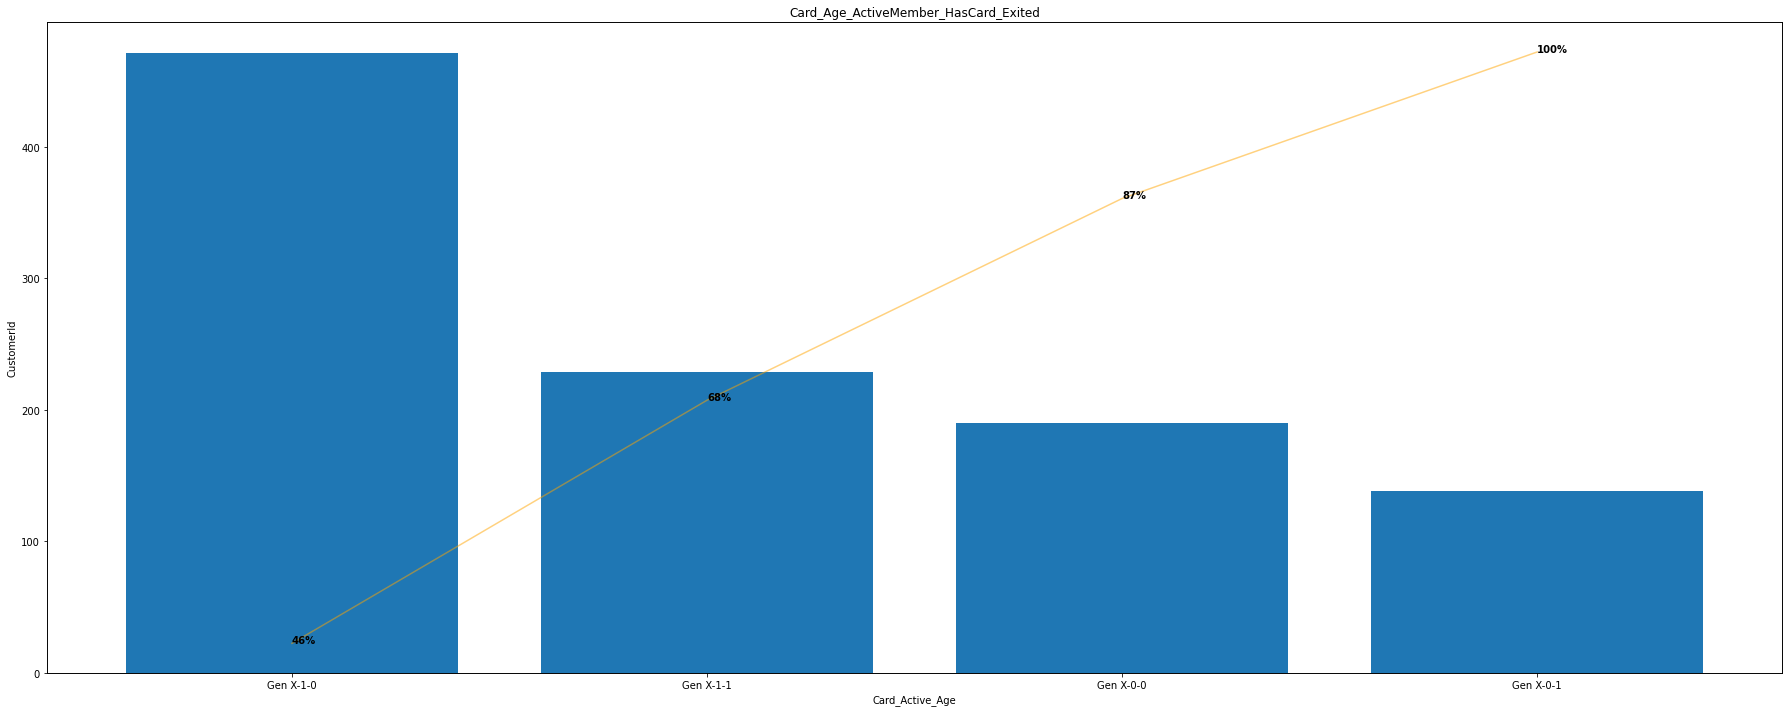

In [ ]:
def pareto_plot(genx_exited, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = genx_exited.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(25, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(genx_exited, x='Card_Active_Age', y='CustomerId', title='Card_Age_ActiveMember_HasCard_Exited')

### Credit Card Ownership

In [ ]:
groupedHasCrCardExited = df1.groupby(['HasCrCard','Exited']).agg('nunique')['CustomerId']
groupedHasCrCardExited

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: CustomerId, dtype: int64

In [ ]:
1424/(1424+5631)*100

20.184266477675408

In [ ]:
groupedHasCrCardSumExited = df1.groupby(['HasCrCard','Exited']).agg(['sum','mean'])['Balance']
groupedHasCrCardSumExited

sum          mean
HasCrCard Exited                         
0         0       173123192  74238.075472
          1        56352571  91929.153344
1         0       406145186  72126.653525
          1       129234766  90754.751404

In [ ]:
129234766/df1['Balance'].agg('sum')*100

16.896620299163224

**1424 users who use credit card product exited (20.18% churn rate)**

**Total balance of these users is 129.234 million (16.89% of total balance of all users)**

In [ ]:
df_exited= df1[df1['Exited'] == 1] 
gh_exited = df_exited.groupby(['Age_group','HasCrCard','Exited'])['CustomerId'].nunique().reset_index()
gh_exited = gh_exited.sort_values(by='CustomerId',ascending=False)

gh_exited


Age_group  HasCrCard  Exited  CustomerId
5         Gen X          1       1         700
3   Millennials          1       1         560
4         Gen X          0       1         328
2   Millennials          0       1         212
7    Boomers II          1       1         113
6    Boomers II          0       1          47
1         Gen Z          1       1          39
0         Gen Z          0       1          21
9     Boomers I          1       1          12
8     Boomers I          0       1           4
10     Post War          0       1           1
11     Post War          1       1           0

In [ ]:
df_exited['Card_Age'] = df_exited['Age_group'].astype(str) +"-"+ df_exited['HasCrCard'].astype(str)
gc_exited = df_exited.groupby(['Card_Age','Exited'])['CustomerId'].nunique().reset_index()
gc_exited = gc_exited.sort_values(by='CustomerId',ascending=False)
gc_exited

<ipython-input-83-faffa3c99fbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exited['Card_Age'] = df_exited['Age_group'].astype(str) +"-"+ df_exited['HasCrCard'].astype(str)


Card_Age  Exited  CustomerId
5         Gen X-1       1         700
9   Millennials-1       1         560
4         Gen X-0       1         328
8   Millennials-0       1         212
3    Boomers II-1       1         113
2    Boomers II-0       1          47
7         Gen Z-1       1          39
6         Gen Z-0       1          21
1     Boomers I-1       1          12
0     Boomers I-0       1           4
10     Post War-0       1           1

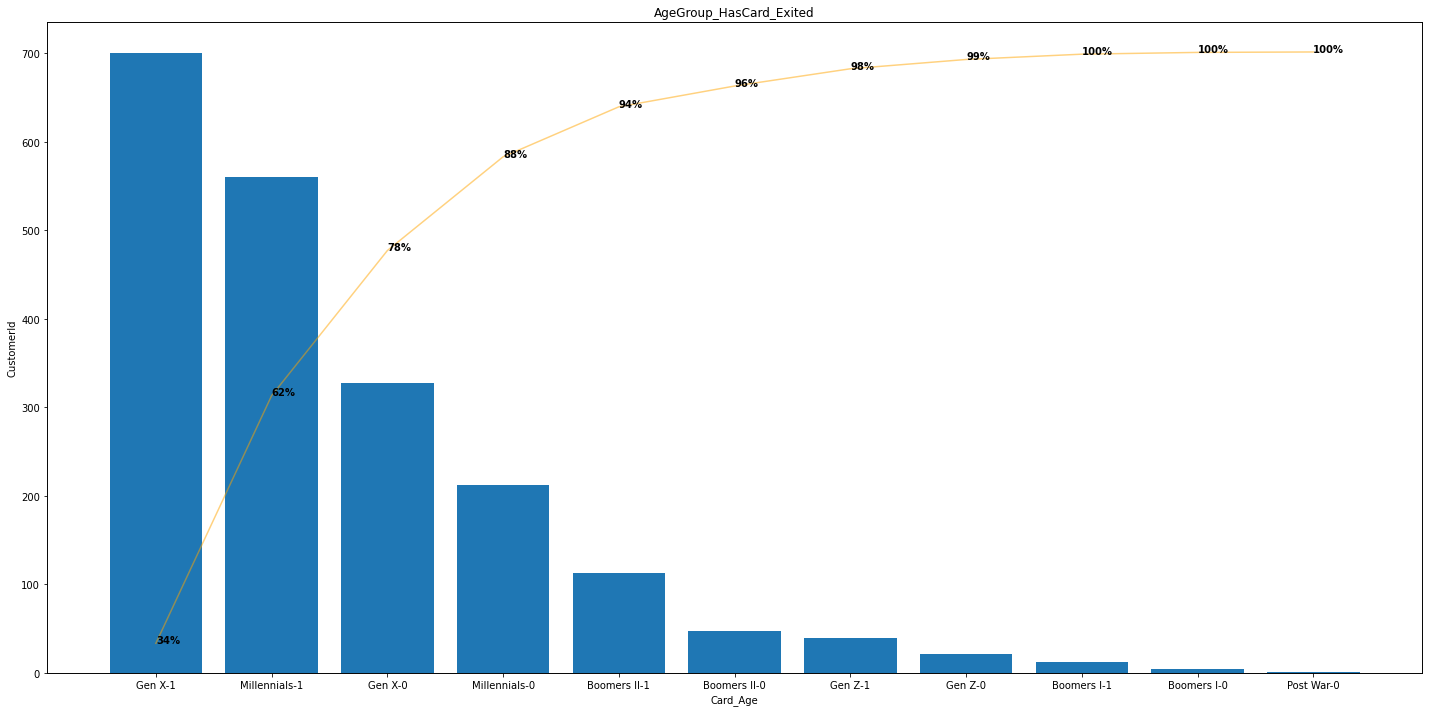

In [ ]:
def pareto_plot(gc_exited, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = gc_exited.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(gc_exited, x='Card_Age', y='CustomerId', title='AgeGroup_HasCard_Exited')

### Credit Score

In [ ]:
groupedCreditCategoryExited = df1.groupby(['CreditCategory','Exited']).agg('nunique')['CustomerId']
groupedCreditCategoryExited

CreditCategory  Exited
Very Poor       0         1253
                1          368
Poor            0         2627
                1          689
Fair            0         1586
                1          361
Good            0         1212
                1          306
Excellent       0         1285
                1          313
Name: CustomerId, dtype: int64

In [ ]:
groupedCreditCategorySumExited = df1.groupby(['CreditCategory','Exited']).agg(['sum','mean'])['Balance']
groupedCreditCategorySumExited

sum          mean
CreditCategory Exited                         
Very Poor      0        91016107  72638.553073
               1        32450452  88180.576087
Poor           0       189158677  72005.586981
               1        63171705  91686.074020
Fair           0       116714833  73590.689155
               1        32976468  91347.556787
Good           0        85712419  70719.817657
               1        27828863  90943.996732
Excellent      0        96666342  75226.725292
               1        29159849  93162.456869

689 poor creditors exited

### Tenure

In [ ]:
groupedTenureExited = df1.groupby(['Tenure','Exited']).agg('nunique')['CustomerId']
groupedTenureExited

Tenure  Exited
0       0         318
        1          95
1       0         803
        1         232
2       0         847
        1         201
3       0         796
        1         213
4       0         786
        1         203
5       0         803
        1         209
6       0         771
        1         196
7       0         851
        1         177
8       0         828
        1         197
9       0         771
        1         213
10      0         389
        1         101
Name: CustomerId, dtype: int64

In [ ]:
232/(232+803)*100

22.415458937198068

In [ ]:
groupedTenureSumExited = df1.groupby(['Tenure','Exited']).agg(['sum','mean'])['Balance']
groupedTenureSumExited

sum          mean
Tenure Exited                        
0      0       23864675  75046.147799
       1        9125180  96054.526316
1      0       60460781  75293.625156
       1       20843707  89843.564655
2      0       63571876  75055.343566
       1       16955719  84356.810945
3      0       59164356  74327.080402
       1       19202383  90152.032864
4      0       55384999  70464.375318
       1       17859427  87977.472906
5      0       58040074  72279.046077
       1       19321218  92446.019139
6      0       54653469  70886.470817
       1       17294842  88238.989796
7      0       61327964  72065.762632
       1       16338797  92309.587571
8      0       60567475  73149.124396
       1       19317216  98056.934010
9      0       54642950  70872.827497
       1       20694289  97156.286385
10     0       27589759  70924.830334
       1        8634559  85490.683168

232 users with tenure 1 year exited

### Active Member

In [ ]:
groupedIsActiveMemberExited = df1.groupby(['IsActiveMember','Exited']).agg('nunique')['CustomerId']
groupedIsActiveMemberExited

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: CustomerId, dtype: int64

In [ ]:
1302/(1302+3547)*100

26.850897092183956

In [ ]:
groupedIsActiveMemberSumExited = df1.groupby(['IsActiveMember','Exited']).agg(['sum','mean'])['Balance']
groupedIsActiveMemberSumExited

sum          mean
IsActiveMember Exited                         
0              0       255556111  72048.522977
               1       118466952  90988.442396
1              0       323712267  73304.408288
               1        67120385  91320.251701

In [ ]:
118466952/df1.agg('sum')['Balance']*100

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


15.488797387099343

**1302 not active users exited (churn rate 26.85%)**

**Total balance of these users is 118.466 million (15.48% of total balance of all users)**

### Credit Card

In [ ]:
df_exited['Card_Active'] = df_exited['HasCrCard'].astype(str) +"-"+ df_exited['IsActiveMember'].astype(str)
gac_exited = df_exited.groupby(['Card_Active','Exited'])['CustomerId'].nunique().reset_index()
gac_exited = gac_exited.sort_values(by='CustomerId',ascending=False)
gac_exited

<ipython-input-94-d636a87f6b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exited['Card_Active'] = df_exited['HasCrCard'].astype(str) +"-"+ df_exited['IsActiveMember'].astype(str)


Card_Active  Exited  CustomerId
2         1-0       1         942
3         1-1       1         482
0         0-0       1         360
1         0-1       1         253

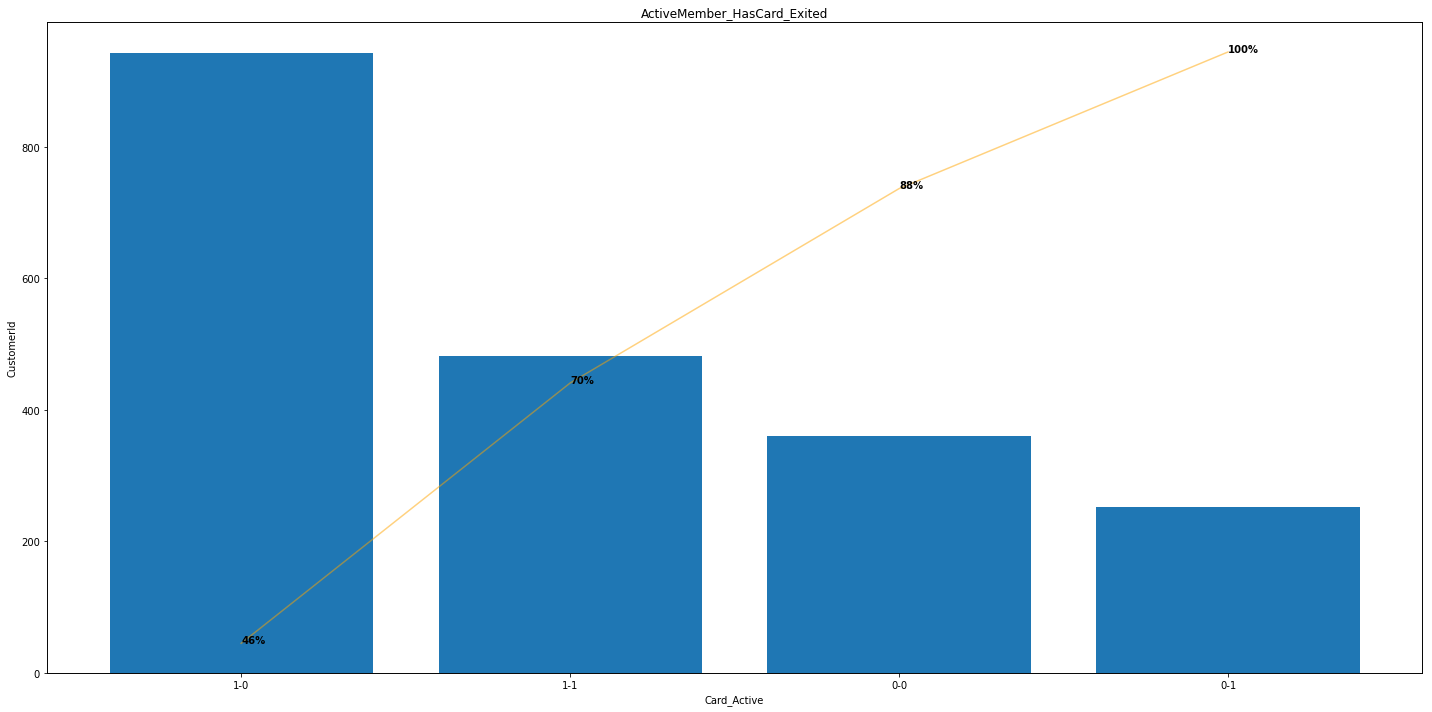

In [ ]:
def pareto_plot(gac_exited, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = gac_exited.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(gac_exited, x='Card_Active', y='CustomerId', title='ActiveMember_HasCard_Exited')

In [ ]:
df_exited['Card_Active_Age'] = df_exited['Card_Age'].astype(str) +"-"+ df_exited['IsActiveMember'].astype(str)
gm_exited = df_exited.groupby(['Card_Active_Age','Exited'])['CustomerId'].nunique().reset_index()
gm_exited = gm_exited.sort_values(by='CustomerId',ascending=False)
gm_exited

<ipython-input-96-6deeeedf5c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exited['Card_Active_Age'] = df_exited['Card_Age'].astype(str) +"-"+ df_exited['IsActiveMember'].astype(str)


Card_Active_Age  Exited  CustomerId
10        Gen X-1-0       1         471
18  Millennials-1-0       1         362
11        Gen X-1-1       1         229
19  Millennials-1-1       1         198
8         Gen X-0-0       1         190
9         Gen X-0-1       1         138
16  Millennials-0-0       1         123
17  Millennials-0-1       1          89
6    Boomers II-1-0       1          77
7    Boomers II-1-1       1          36
4    Boomers II-0-0       1          30
14        Gen Z-1-0       1          25
5    Boomers II-0-1       1          17
12        Gen Z-0-0       1          14
15        Gen Z-1-1       1          14
2     Boomers I-1-0       1           7
13        Gen Z-0-1       1           7
3     Boomers I-1-1       1           5
0     Boomers I-0-0       1           2
1     Boomers I-0-1       1           2
20     Post War-0-0       1           1

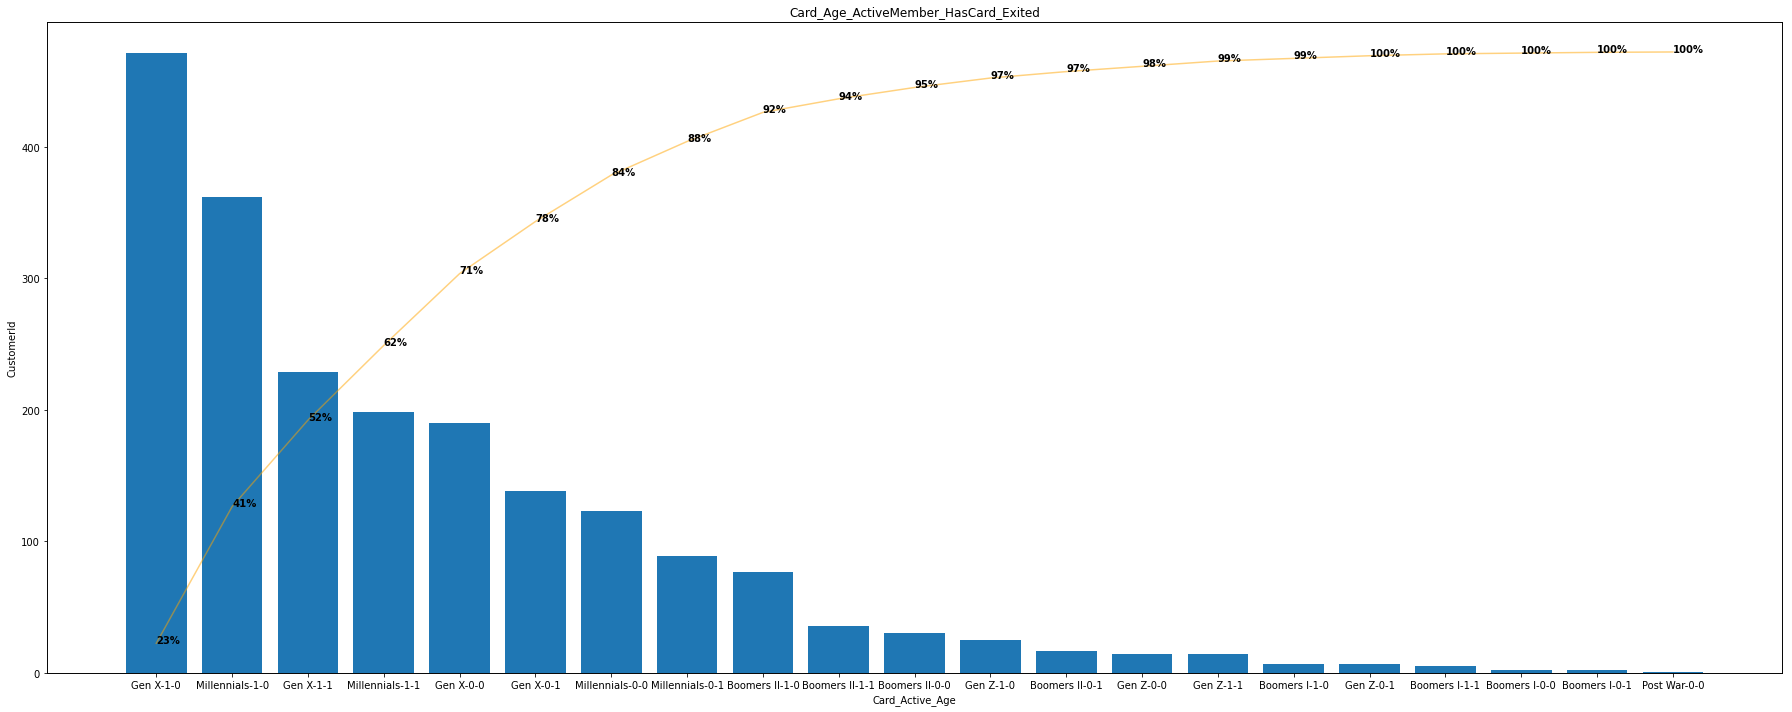

In [ ]:
def pareto_plot(gm_exited, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = gm_exited.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(25, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(gm_exited, x='Card_Active_Age', y='CustomerId', title='Card_Age_ActiveMember_HasCard_Exited')

In [ ]:
gmb_exited = df_exited.groupby(['Card_Active_Age','Exited'])['Balance'].sum().reset_index()
gmb_exited = gmb_exited.sort_values(by='Balance',ascending=False)
gmb_exited

Card_Active_Age  Exited   Balance
10        Gen X-1-0       1  42293428
18  Millennials-1-0       1  33243779
11        Gen X-1-1       1  21050215
19  Millennials-1-1       1  18485786
8         Gen X-0-0       1  16953099
9         Gen X-0-1       1  12428658
16  Millennials-0-0       1  11298790
17  Millennials-0-1       1   7972630
6    Boomers II-1-0       1   6533986
4    Boomers II-0-0       1   3322889
7    Boomers II-1-1       1   3038998
14        Gen Z-1-0       1   2283673
12        Gen Z-0-0       1   1664379
5    Boomers II-0-1       1   1579667
15        Gen Z-1-1       1   1180470
2     Boomers I-1-0       1    699018
13        Gen Z-0-1       1    683835
3     Boomers I-1-1       1    425413
1     Boomers I-0-1       1    274713
20     Post War-0-0       1     87873
0     Boomers I-0-0       1     86038

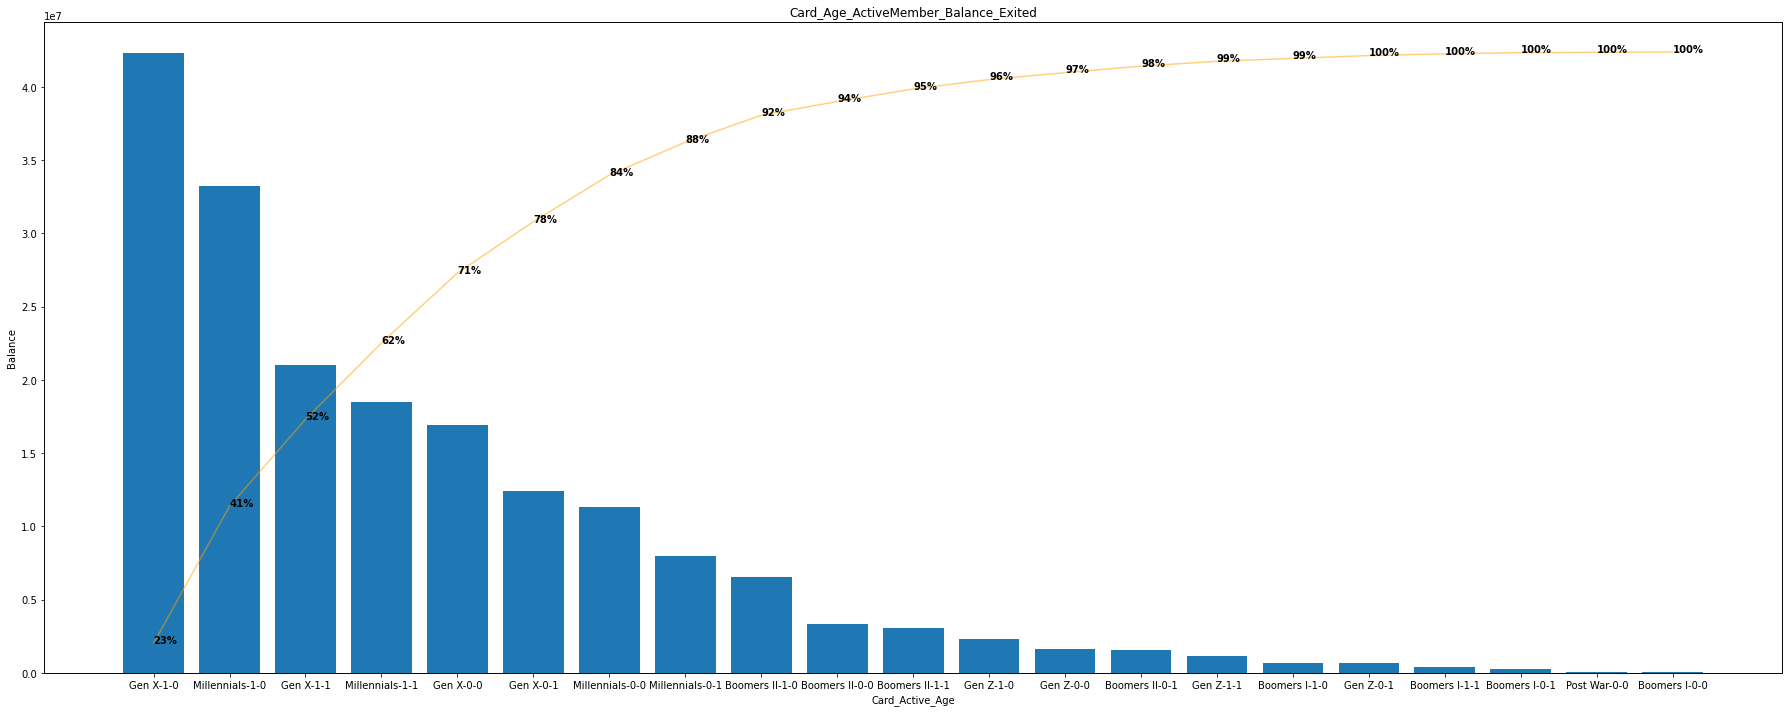

In [ ]:
def pareto_plot(gmb_exited, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = gmb_exited.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(25, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(gmb_exited, x='Card_Active_Age', y='Balance', title='Card_Age_ActiveMember_Balance_Exited')

In [ ]:
gacb_exited = df_exited.groupby(['Card_Active','Exited'])['Balance'].sum().reset_index()
gacb_exited = gacb_exited.sort_values(by='Balance',ascending=False)
gacb_exited

Card_Active  Exited   Balance
2         1-0       1  85053884
3         1-1       1  44180882
0         0-0       1  33413068
1         0-1       1  22939503

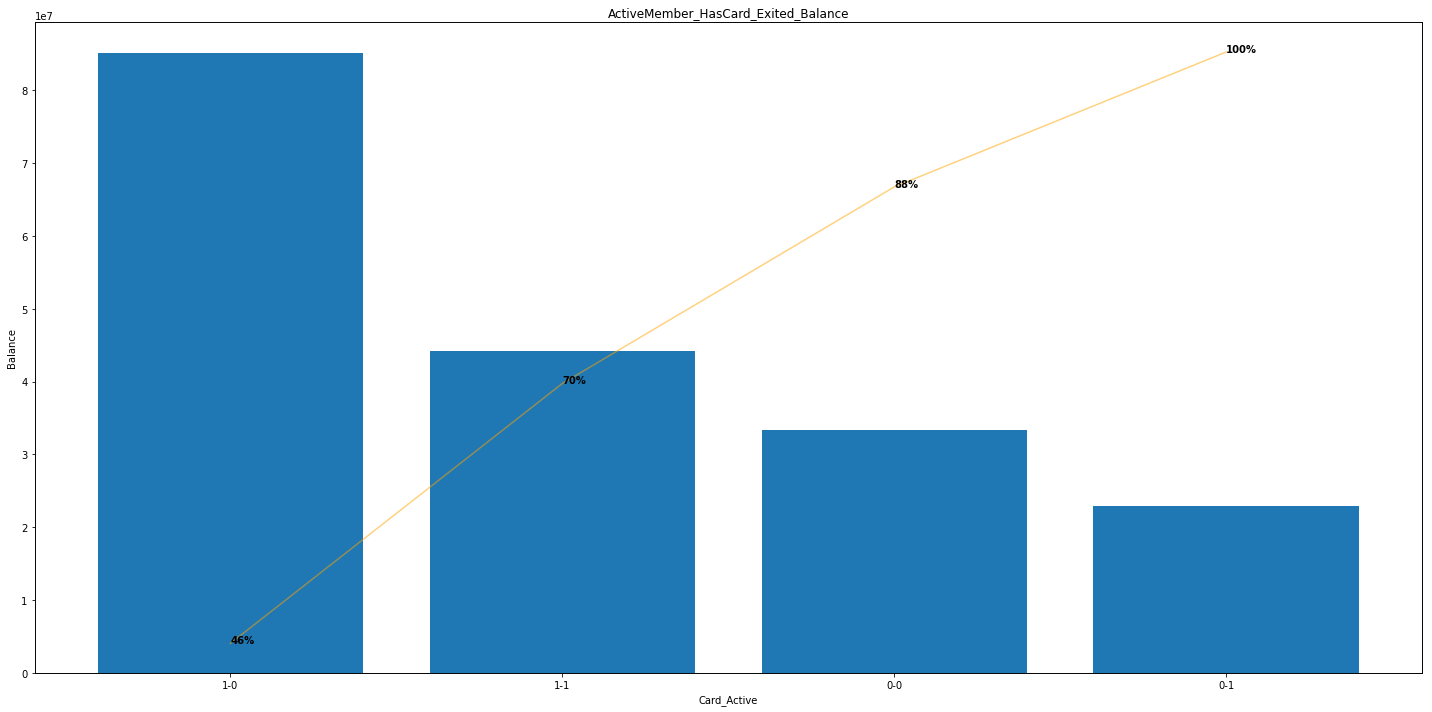

In [ ]:
def pareto_plot(gacb_exited, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = gacb_exited.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(gacb_exited, x='Card_Active', y='Balance', title='ActiveMember_HasCard_Exited_Balance')

### Number of Products

In [ ]:
groupedNumOfProductsExited = df1.groupby(['NumOfProducts','Exited']).agg('nunique')['CustomerId']
groupedNumOfProductsExited

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              0           46
               1          220
4              1           60
Name: CustomerId, dtype: int64

In [ ]:
1409/(1409+3675)*100

27.714398111723053

In [ ]:
groupedNumOfProductsSumExited = df1.groupby(['NumOfProducts','Exited']).agg(['sum','mean'])['Balance']
groupedNumOfProductsSumExited

sum           mean
NumOfProducts Exited                          
1             0       371367536  101052.390748
              1       129668076   92028.442867
2             0       206716611   48730.931400
              1        31407696   90252.000000
3             0         1184231   25744.152174
              1        18887597   85852.713636
4             1         5623968   93732.800000

In [ ]:
129668076/764855715*100

16.95327281433728

**1409 users who use 1 product exited (27.71% churn rate)**

**Total balance of these users is 129.668 million (16.95% of total balance of all users)**

### Gender

In [ ]:
groupedGenderExited = df1.groupby(['Gender','Exited']).agg('nunique')['CustomerId']
groupedGenderExited

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: CustomerId, dtype: int64

In [ ]:
1139/(1139+3404)*100

25.071538630860662

In [ ]:
groupedGenderSumExited = df1.groupby(['Gender','Exited']).agg(['sum','mean'])['Balance']
groupedGenderSumExited

sum          mean
Gender Exited                         
Female 0       242306745  71182.945065
       1       101412316  89036.273924
Male   0       336961633  73911.303575
       1        84175021  93736.103563

In [ ]:
101412316/764855715*100

13.259012649202731

**1139 female users exited (churn rate 25.07%)**

**Total balance of these users is 101.412 million (13.25% of total balance of all users)**

### Balance

In [ ]:
groupedBalancecategoryExited = df1.groupby(['Balancecategory','Exited']).agg('nunique')['CustomerId']
groupedBalancecategoryExited

Balancecategory  Exited
Level 1          0         3166
                 1          526
Level 2          0         1228
                 1          306
Level 3          0         2840
                 1          987
Level 4          0          716
                 1          199
Level 5          0           13
                 1           19
Name: CustomerId, dtype: int64

In [ ]:
groupedBalanceSumExited = df1.groupby(['Balancecategory','Exited']).agg(['mean','sum'])['Balance']
groupedBalanceSumExited

mean        sum
Balancecategory Exited                          
Level 1         0          627.509792    1986696
                1         1847.579848     971827
Level 2         0        84146.259772  103331607
                1        84077.133987   25727603
Level 3         0       124228.464437  352808839
                1       123342.060790  121738614
Level 4         0       165389.569832  118418932
                1       166456.894472   33124922
Level 5         0       209408.000000    2722304
                1       211809.000000    4024371

In [ ]:
987/(987+2840)*100

25.790436373138228

In [ ]:
121738614/764855715*100

15.916546299193177

**987 users with level 3 balance exited (25.79% churn rate)**

**Total balance of these users is 121.738 million (15.91% of total balance of all users)**

### Geography

In [ ]:
groupedGeoExited = df1.groupby(['Geography','Exited']).agg('nunique')['CustomerId']
groupedGeoExited 

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: CustomerId, dtype: int64

In [ ]:
814/(814+1695)*100

32.44320446392985

In [ ]:
groupedGeographySumExited = df1.groupby(['Geography','Exited']).agg(['mean','sum'])['Balance']
groupedGeographySumExited

mean        sum
Geography Exited                          
France    0        60339.020932  253665244
          1        71192.513580   57665936
Germany   0       119426.609440  202428103
          1       120360.574939   97973508
Spain     0        59677.825097  123175031
          1        72513.058111   29947893

In [ ]:
97973508/764855715*100

12.809410465083602

**814 users from Germany exited (32.44% churn rate)**

**Total balance of these users is 97.973 million (12.80% of total balance of all users)**

In [ ]:
gb_exited = df_exited.groupby(['Card_Age','Exited'])['Balance'].sum().reset_index()
gb_exited = gb_exited.sort_values(by='Balance',ascending=False)
gb_exited


Card_Age  Exited   Balance
5         Gen X-1       1  63343643
9   Millennials-1       1  51729565
4         Gen X-0       1  29381757
8   Millennials-0       1  19271420
3    Boomers II-1       1   9572984
2    Boomers II-0       1   4902556
7         Gen Z-1       1   3464143
6         Gen Z-0       1   2348214
1     Boomers I-1       1   1124431
0     Boomers I-0       1    360751
10     Post War-0       1     87873

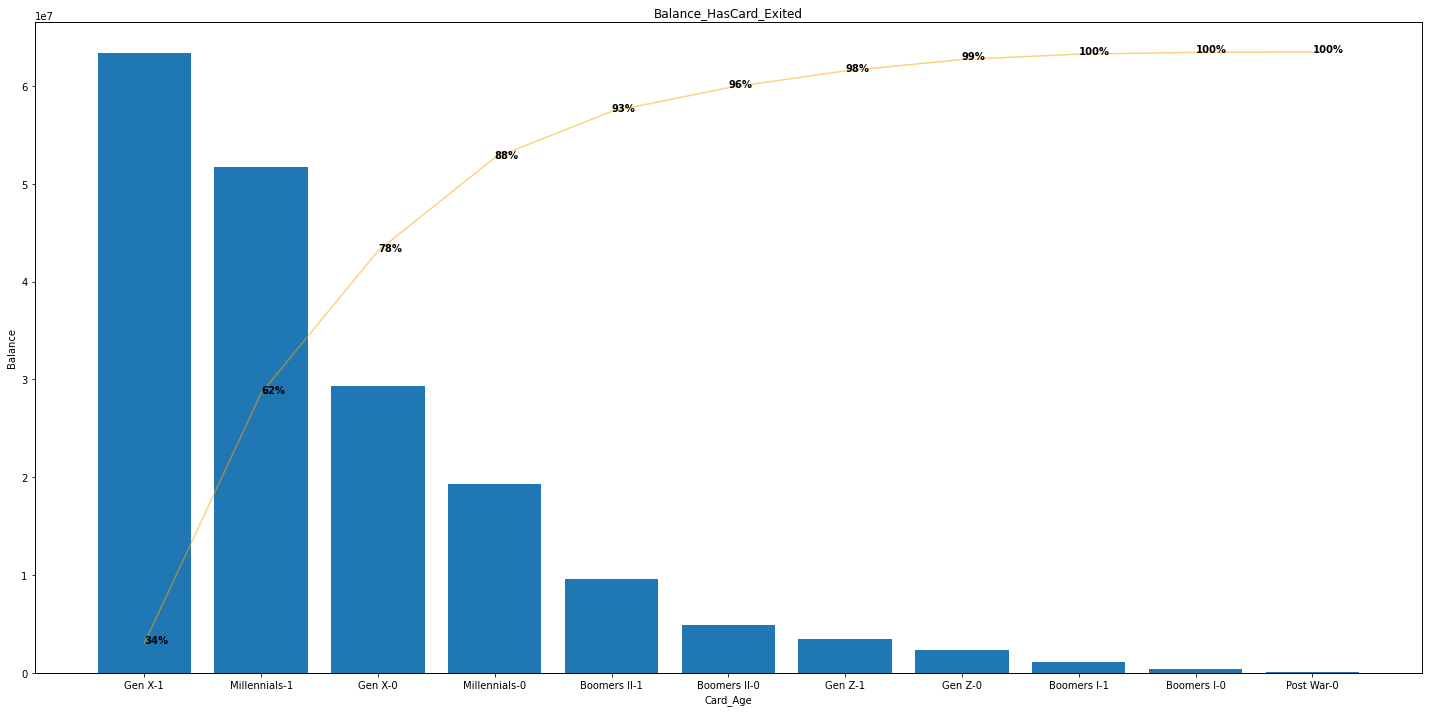

In [ ]:
def pareto_plot(gb_exited, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = gb_exited.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(gb_exited, x='Card_Age', y='Balance', title='Balance_HasCard_Exited')

# **Clustering**

## One Hot Encoding

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn.preprocessing import RobustScaler

In [ ]:
df_cluster = df1.copy()

In [ ]:
# cat.code gender
# 0 Male, 1 Female
df_cluster['Gender'] = df_cluster['Gender'].astype('category')
df_cluster['Gender'] = df_cluster['Gender'].cat.set_categories(['Male', 'Female'])

df_cluster['Gender_category'] = df_cluster['Gender'].cat.codes
df_cluster

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0      15634602   Hargrave          619    France  Female   42       2   
1      15647311       Hill          608     Spain  Female   41       1   
2      15619304       Onio          502    France  Female   42       8   
3      15701354       Boni          699    France  Female   39       1   
4      15737888   Mitchell          850     Spain  Female   43       2   
...         ...        ...          ...       ...     ...  ...     ...   
9995   15606229   Obijiaku          771    France    Male   39       5   
9996   15569892  Johnstone          516    France    Male   35      10   
9997   15584532        Liu          709    France  Female   36       7   
9998   15682355  Sabbatini          772   Germany    Male   42       3   
9999   15628319     Walker          792    France  Female   28       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0           0              1          1               1           101348   
1       83807              1          0               1           112542   
2      159660              3          1               0           113931   
3           0              2          0               0            93826   
4      125510              1          1               1            79084   
...       ...            ...        ...             ...              ...   
9995        0              2          1               0            96270   
9996    57369              1          1               1           101699   
9997        0              1          0               1            42085   
9998    75075              2          1               0            92888   
9999   130142              1          1               0            38190   

      Exited    Age_group CreditCategory Balancecategory  \
0          1  Millennials           Poor         Level 1   
1          0  Millennials           Poor         Level 2   
2          1  Millennials      Very Poor         Level 4   
3          0  Millennials           Fair         Level 1   
4          0        Gen X      Excellent         Level 3   
...      ...          ...            ...             ...   
9995       0  Millennials      Excellent         Level 1   
9996       0  Millennials      Very Poor         Level 2   
9997       1  Millennials           Good         Level 1   
9998       1  Millennials      Excellent         Level 2   
9999       0  Millennials      Excellent         Level 3   

     EstimatedSalarycategory  Gender_category  
0                       Good                1  
1                       Good                1  
2                       Good                1  
3                       Fair                1  
4                       Fair                1  
...                      ...              ...  
9995                    Fair                0  
9996                    Good                0  
9997                    Poor                1  
9998                    Fair                0  
9999                    Poor                1  

[10000 rows x 18 columns]

In [ ]:
# cat.code geography
# 0 France, 1 Germany, Spain 2
df_cluster['Geography'] = df_cluster['Geography'].astype('category')
df_cluster['Geography'] = df_cluster['Geography'].cat.set_categories(['France', 'Germany', 'Spain'])

df_cluster['Geography_category'] = df_cluster['Geography'].cat.codes
df_cluster

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0      15634602   Hargrave          619    France  Female   42       2   
1      15647311       Hill          608     Spain  Female   41       1   
2      15619304       Onio          502    France  Female   42       8   
3      15701354       Boni          699    France  Female   39       1   
4      15737888   Mitchell          850     Spain  Female   43       2   
...         ...        ...          ...       ...     ...  ...     ...   
9995   15606229   Obijiaku          771    France    Male   39       5   
9996   15569892  Johnstone          516    France    Male   35      10   
9997   15584532        Liu          709    France  Female   36       7   
9998   15682355  Sabbatini          772   Germany    Male   42       3   
9999   15628319     Walker          792    France  Female   28       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0           0              1          1               1           101348   
1       83807              1          0               1           112542   
2      159660              3          1               0           113931   
3           0              2          0               0            93826   
4      125510              1          1               1            79084   
...       ...            ...        ...             ...              ...   
9995        0              2          1               0            96270   
9996    57369              1          1               1           101699   
9997        0              1          0               1            42085   
9998    75075              2          1               0            92888   
9999   130142              1          1               0            38190   

      Exited    Age_group CreditCategory Balancecategory  \
0          1  Millennials           Poor         Level 1   
1          0  Millennials           Poor         Level 2   
2          1  Millennials      Very Poor         Level 4   
3          0  Millennials           Fair         Level 1   
4          0        Gen X      Excellent         Level 3   
...      ...          ...            ...             ...   
9995       0  Millennials      Excellent         Level 1   
9996       0  Millennials      Very Poor         Level 2   
9997       1  Millennials           Good         Level 1   
9998       1  Millennials      Excellent         Level 2   
9999       0  Millennials      Excellent         Level 3   

     EstimatedSalarycategory  Gender_category  Geography_category  
0                       Good                1                   0  
1                       Good                1                   2  
2                       Good                1                   0  
3                       Fair                1                   0  
4                       Fair                1                   2  
...                      ...              ...                 ...  
9995                    Fair                0                   0  
9996                    Good                0                   0  
9997                    Poor                1                   0  
9998                    Fair                0                   1  
9999                    Poor                1                   0  

[10000 rows x 19 columns]

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerId               10000 non-null  object  
 1   Surname                  10000 non-null  object  
 2   CreditScore              10000 non-null  int64   
 3   Geography                10000 non-null  category
 4   Gender                   10000 non-null  category
 5   Age                      10000 non-null  int64   
 6   Tenure                   10000 non-null  int64   
 7   Balance                  10000 non-null  int64   
 8   NumOfProducts            10000 non-null  int64   
 9   HasCrCard                10000 non-null  int64   
 10  IsActiveMember           10000 non-null  int64   
 11  EstimatedSalary          10000 non-null  int64   
 12  Exited                   10000 non-null  int64   
 13  Age_group                10000 non-null  category
 14  CreditC

In [ ]:
df_cluster.drop(columns=['Surname','Geography','Gender','Age_group','CreditCategory','Balancecategory','EstimatedSalarycategory','Exited','Gender_category','CustomerId'], inplace=True)


In [ ]:
columns_list = df_cluster.columns

#clustering all

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
from yellowbrick.cluster import SilhouetteVisualizer 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from sklearn.preprocessing import RobustScaler

In [ ]:
columns_list = df_cluster.columns
df_cluster[columns_list]

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0             619   42       2        0              1          1   
1             608   41       1    83807              1          0   
2             502   42       8   159660              3          1   
3             699   39       1        0              2          0   
4             850   43       2   125510              1          1   
...           ...  ...     ...      ...            ...        ...   
9995          771   39       5        0              2          1   
9996          516   35      10    57369              1          1   
9997          709   36       7        0              1          0   
9998          772   42       3    75075              2          1   
9999          792   28       4   130142              1          1   

      IsActiveMember  EstimatedSalary  Geography_category  
0                  1           101348                   0  
1                  1           112542                   2  
2                  0           113931                   0  
3                  0            93826                   0  
4                  1            79084                   2  
...              ...              ...                 ...  
9995               0            96270                   0  
9996               1           101699                   0  
9997               1            42085                   0  
9998               0            92888                   1  
9999               0            38190                   0  

[10000 rows x 9 columns]

In [ ]:
scaler = MinMaxScaler() #Transform data by scaler
df_cluster[columns_list] = scaler.fit_transform(df_cluster[columns_list])
df_cluster

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0           0.538  0.324324     0.2  0.000000       0.000000        1.0   
1           0.516  0.310811     0.1  0.334028       0.000000        0.0   
2           0.304  0.324324     0.8  0.636354       0.666667        1.0   
3           0.698  0.283784     0.1  0.000000       0.333333        0.0   
4           1.000  0.337838     0.2  0.500243       0.000000        1.0   
...           ...       ...     ...       ...            ...        ...   
9995        0.842  0.283784     0.5  0.000000       0.333333        1.0   
9996        0.332  0.229730     1.0  0.228655       0.000000        1.0   
9997        0.718  0.243243     0.7  0.000000       0.000000        0.0   
9998        0.844  0.324324     0.3  0.299225       0.333333        1.0   
9999        0.884  0.135135     0.4  0.518705       0.000000        1.0   

      IsActiveMember  EstimatedSalary  Geography_category  
0                1.0         0.506733                 0.0  
1                1.0         0.562708                 1.0  
2                0.0         0.569654                 0.0  
3                0.0         0.469120                 0.0  
4                1.0         0.395403                 1.0  
...              ...              ...                 ...  
9995             0.0         0.481341                 0.0  
9996             1.0         0.508488                 0.0  
9997             1.0         0.210390                 0.0  
9998             0.0         0.464429                 0.5  
9999             0.0         0.190913                 0.0  

[10000 rows x 9 columns]

In [ ]:
#we pick 4 cluster based on above (lowest cluster number with all cluster value are more than average sillhouette score and relative similar thickness for each cluster)
cluster_model = cluster.KMeans(n_clusters=4, random_state=42)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df_cluster['cluster'] = cluster_label
df_cluster[columns_list] = scaler.inverse_transform(df_cluster[columns_list])
df_cluster

CreditScore   Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0           619.0  42.0     2.0       0.0            1.0        1.0   
1           608.0  41.0     1.0   83807.0            1.0        0.0   
2           502.0  42.0     8.0  159660.0            3.0        1.0   
3           699.0  39.0     1.0       0.0            2.0        0.0   
4           850.0  43.0     2.0  125510.0            1.0        1.0   
...           ...   ...     ...       ...            ...        ...   
9995        771.0  39.0     5.0       0.0            2.0        1.0   
9996        516.0  35.0    10.0   57369.0            1.0        1.0   
9997        709.0  36.0     7.0       0.0            1.0        0.0   
9998        772.0  42.0     3.0   75075.0            2.0        1.0   
9999        792.0  28.0     4.0  130142.0            1.0        1.0   

      IsActiveMember  EstimatedSalary  Geography_category  cluster  
0                1.0         101348.0                 0.0        0  
1                1.0         112542.0                 2.0        3  
2                0.0         113931.0                 0.0        1  
3                0.0          93826.0                 0.0        2  
4                1.0          79084.0                 2.0        0  
...              ...              ...                 ...      ...  
9995             0.0          96270.0                 0.0        1  
9996             1.0         101699.0                 0.0        0  
9997             1.0          42085.0                 0.0        3  
9998             0.0          92888.0                 1.0        1  
9999             0.0          38190.0                 0.0        1  

[10000 rows x 10 columns]

In [ ]:
avg = df_cluster.groupby(['cluster'],as_index=False).agg(['mean','max','min'])
avg.round(2)

CreditScore                  Age             Tenure             \
               mean    max    min   mean   max   min   mean   max  min   
cluster                                                                  
0            652.95  850.0  350.0  39.65  92.0  18.0   4.99  10.0  0.0   
1            647.30  850.0  351.0  38.00  77.0  18.0   5.12  10.0  0.0   
2            649.64  850.0  350.0  38.00  84.0  18.0   5.04  10.0  0.0   
3            652.89  850.0  411.0  40.12  92.0  18.0   4.79  10.0  0.0   

          Balance                NumOfProducts           HasCrCard            \
             mean       max  min          mean  max  min      mean  max  min   
cluster                                                                        
0        74962.54  209767.0  0.0          1.54  4.0  1.0       1.0  1.0  1.0   
1        76853.27  221532.0  0.0          1.52  4.0  1.0       1.0  1.0  1.0   
2        77825.11  222267.0  0.0          1.53  4.0  1.0       0.0  0.0  0.0   
3        78006.98  250898.0  0.0          1.53  4.0  1.0       0.0  0.0  0.0   

        IsActiveMember           EstimatedSalary                  \
                  mean  max  min            mean       max   min   
cluster                                                            
0                  1.0  1.0  1.0        98736.04  199953.0  11.0   
1                  0.0  0.0  0.0       100750.70  199970.0  96.0   
2                  0.0  0.0  0.0       100806.09  199992.0  91.0   
3                  1.0  1.0  1.0       101126.18  199862.0  90.0   

        Geography_category            
                      mean  max  min  
cluster                               
0                     0.75  2.0  0.0  
1                     0.74  2.0  0.0  
2                     0.75  2.0  0.0  
3                     0.77  2.0  0.0

# Looking into Gen-X

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [ ]:
df_GenX = df1 [df1['Age_group']=='Gen X']
df_GenX

CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
4      15737888     Mitchell          850     Spain  Female   43       2   
5      15574012          Chu          645     Spain    Male   44       8   
6      15592531     Bartlett          822    France    Male   50       7   
8      15792365           He          501    France    Male   44       4   
15     15643966      Goforth          616   Germany    Male   45       3   
...         ...          ...          ...       ...     ...  ...     ...   
9975   15666295        Smith          610   Germany    Male   50       1   
9979   15692664       Diribe          677    France  Female   58       1   
9982   15768163      Griffin          655   Germany  Female   46       7   
9986   15581736     Bartlett          673   Germany    Male   47       1   
9991   15769959  Ajuluchukwu          597    France  Female   53       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
4      125510              1          1               1            79084   
5      113755              2          1               0           149756   
6           0              2          1               1            10062   
8      142051              2          0               1            74940   
15     143129              2          0               1            64327   
...       ...            ...        ...             ...              ...   
9975   113957              2          1               0           196526   
9979    90022              1          0               1             2988   
9982   137145              1          1               0           115146   
9986   183579              2          0               1            34047   
9991    88381              1          1               0            69384   

      Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  
4          0     Gen X      Excellent         Level 3                    Fair  
5          1     Gen X           Poor         Level 3                    Good  
6          0     Gen X      Excellent         Level 1               Very Poor  
8          0     Gen X      Very Poor         Level 3                    Fair  
15         0     Gen X           Poor         Level 3                    Fair  
...      ...       ...            ...             ...                     ...  
9975       1     Gen X           Poor         Level 3                     NaN  
9979       0     Gen X           Fair         Level 2                     NaN  
9982       1     Gen X           Fair         Level 3                    Good  
9986       0     Gen X           Fair         Level 4                    Poor  
9991       1     Gen X           Poor         Level 2                    Fair  

[2306 rows x 17 columns]

In [ ]:
df_GenX.drop(columns=['Surname','Age_group','CreditCategory','Balancecategory','EstimatedSalarycategory'], inplace=True)
df_GenX

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CustomerId  CreditScore Geography  Gender  Age  Tenure  Balance  \
4      15737888          850     Spain  Female   43       2   125510   
5      15574012          645     Spain    Male   44       8   113755   
6      15592531          822    France    Male   50       7        0   
8      15792365          501    France    Male   44       4   142051   
15     15643966          616   Germany    Male   45       3   143129   
...         ...          ...       ...     ...  ...     ...      ...   
9975   15666295          610   Germany    Male   50       1   113957   
9979   15692664          677    France  Female   58       1    90022   
9982   15768163          655   Germany  Female   46       7   137145   
9986   15581736          673   Germany    Male   47       1   183579   
9991   15769959          597    France  Female   53       4    88381   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
4                 1          1               1            79084       0  
5                 2          1               0           149756       1  
6                 2          1               1            10062       0  
8                 2          0               1            74940       0  
15                2          0               1            64327       0  
...             ...        ...             ...              ...     ...  
9975              2          1               0           196526       1  
9979              1          0               1             2988       0  
9982              1          1               0           115146       1  
9986              2          0               1            34047       0  
9991              1          1               0            69384       1  

[2306 rows x 12 columns]

In [ ]:
# cat.code geography
# 0 France, 1 Germany, Spain 2
df_GenX['Geography'] = df_GenX['Geography'].astype('category')
df_GenX['Geography'] = df_GenX['Geography'].cat.set_categories(['France', 'Germany', 'Spain'])
df_GenX['Geography_category'] = df_GenX['Geography'].cat.codes

# cat.code gender
# 0 Male, 1 Female
df_GenX['Gender'] = df_GenX['Gender'].astype('category')
df_GenX['Gender'] = df_GenX['Gender'].cat.set_categories(['Male', 'Female'])
df_GenX['Gender_category'] = df_GenX['Gender'].cat.codes

df_GenX.drop(columns=['Gender','Geography'], inplace=True)
df_GenX


<ipython-input-136-96e15b9b67ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GenX['Geography'] = df_GenX['Geography'].astype('category')
<ipython-input-136-96e15b9b67ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GenX['Geography'] = df_GenX['Geography'].cat.set_categories(['France', 'Germany', 'Spain'])
<ipython-input-136-96e15b9b67ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

CustomerId  CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
4      15737888          850   43       2   125510              1          1   
5      15574012          645   44       8   113755              2          1   
6      15592531          822   50       7        0              2          1   
8      15792365          501   44       4   142051              2          0   
15     15643966          616   45       3   143129              2          0   
...         ...          ...  ...     ...      ...            ...        ...   
9975   15666295          610   50       1   113957              2          1   
9979   15692664          677   58       1    90022              1          0   
9982   15768163          655   46       7   137145              1          1   
9986   15581736          673   47       1   183579              2          0   
9991   15769959          597   53       4    88381              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_category  \
4                  1            79084       0                   2   
5                  0           149756       1                   2   
6                  1            10062       0                   0   
8                  1            74940       0                   0   
15                 1            64327       0                   1   
...              ...              ...     ...                 ...   
9975               0           196526       1                   1   
9979               1             2988       0                   0   
9982               0           115146       1                   1   
9986               1            34047       0                   1   
9991               0            69384       1                   0   

      Gender_category  
4                   1  
5                   0  
6                   0  
8                   0  
15                  0  
...               ...  
9975                0  
9979                1  
9982                1  
9986                0  
9991                1  

[2306 rows x 12 columns]

In [ ]:
#df_GenX['Tenure_to_Age'] = df_GenX['Tenure']/df_GenX['Age']
#df_GenX.drop(columns=['Tenure','Age'], inplace=True)
df_GenX


CustomerId  CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
4      15737888          850   43       2   125510              1          1   
5      15574012          645   44       8   113755              2          1   
6      15592531          822   50       7        0              2          1   
8      15792365          501   44       4   142051              2          0   
15     15643966          616   45       3   143129              2          0   
...         ...          ...  ...     ...      ...            ...        ...   
9975   15666295          610   50       1   113957              2          1   
9979   15692664          677   58       1    90022              1          0   
9982   15768163          655   46       7   137145              1          1   
9986   15581736          673   47       1   183579              2          0   
9991   15769959          597   53       4    88381              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_category  \
4                  1            79084       0                   2   
5                  0           149756       1                   2   
6                  1            10062       0                   0   
8                  1            74940       0                   0   
15                 1            64327       0                   1   
...              ...              ...     ...                 ...   
9975               0           196526       1                   1   
9979               1             2988       0                   0   
9982               0           115146       1                   1   
9986               1            34047       0                   1   
9991               0            69384       1                   0   

      Gender_category  
4                   1  
5                   0  
6                   0  
8                   0  
15                  0  
...               ...  
9975                0  
9979                1  
9982                1  
9986                0  
9991                1  

[2306 rows x 12 columns]

In [ ]:
df_GenX.describe()

CreditScore     Age  Tenure   Balance  NumOfProducts  HasCrCard  \
count      2306.00 2306.00 2306.00   2306.00        2306.00    2306.00   
mean        648.15   48.31    4.99  81124.94           1.50       0.69   
std          95.80    4.37    2.92  61025.95           0.66       0.46   
min         350.00   43.00    0.00      0.00           1.00       0.00   
25%         582.00   45.00    2.00      0.00           1.00       0.00   
50%         649.00   47.00    5.00 102113.00           1.00       1.00   
75%         713.00   51.00    8.00 128139.25           2.00       1.00   
max         850.00   58.00   10.00 238387.00           4.00       1.00   

       IsActiveMember  EstimatedSalary  Exited  Geography_category  \
count         2306.00          2306.00 2306.00             2306.00   
mean             0.49        100636.90    0.45                0.80   
std              0.50         56946.18    0.50                0.81   
min              0.00            11.00    0.00                0.00   
25%              0.00         53075.75    0.00                0.00   
50%              0.00        100211.50    0.00                1.00   
75%              1.00        149551.50    1.00                1.00   
max              1.00        199661.00    1.00                2.00   

       Gender_category  
count          2306.00  
mean              0.49  
std               0.50  
min               0.00  
25%               0.00  
50%               0.00  
75%               1.00  
max               1.00

In [ ]:
df_GenX_NumProd = df_GenX.groupby(['Exited','Gender_category','NumOfProducts']).agg('nunique')['CustomerId']
df_GenX_NumProd


Exited  Gender_category  NumOfProducts
0       0                1                347
                         2                377
                         3                  1
        1                1                246
                         2                307
1       0                1                339
                         2                 62
                         3                 41
                         4                 15
        1                1                389
                         2                 96
                         3                 66
                         4                 20
Name: CustomerId, dtype: int64

In [ ]:
df_GenX_Card = df_GenX.groupby(['Exited','HasCrCard']).agg('nunique')['CustomerId']
df_GenX_Card

Exited  HasCrCard
0       0            386
        1            892
1       0            328
        1            700
Name: CustomerId, dtype: int64

In [ ]:
df_GenX_IsActive = df_GenX.groupby(['Exited','IsActiveMember']).agg('nunique')['CustomerId']
df_GenX_IsActive

Exited  IsActiveMember
0       0                 507
        1                 771
1       0                 661
        1                 367
Name: CustomerId, dtype: int64

In [ ]:
df_GenX_Geo = df_GenX.groupby(['Exited','Geography_category']).agg('nunique')['CustomerId']
df_GenX_Geo

Exited  Geography_category
0       0                     643
        1                     270
        2                     365
1       0                     397
        1                     426
        2                     205
Name: CustomerId, dtype: int64

In [ ]:
df_GenX_Gender = df_GenX.groupby(['Exited','Gender_category']).agg('nunique')['CustomerId']
df_GenX_Gender

Exited  Gender_category
0       0                  725
        1                  553
1       0                  457
        1                  571
Name: CustomerId, dtype: int64

In [ ]:
customer_master =df_GenX['CustomerId'] 
df_GenX.drop(columns='CustomerId', inplace=True)
df_GenX

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
4             850   43       2   125510              1          1   
5             645   44       8   113755              2          1   
6             822   50       7        0              2          1   
8             501   44       4   142051              2          0   
15            616   45       3   143129              2          0   
...           ...  ...     ...      ...            ...        ...   
9975          610   50       1   113957              2          1   
9979          677   58       1    90022              1          0   
9982          655   46       7   137145              1          1   
9986          673   47       1   183579              2          0   
9991          597   53       4    88381              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_category  \
4                  1            79084       0                   2   
5                  0           149756       1                   2   
6                  1            10062       0                   0   
8                  1            74940       0                   0   
15                 1            64327       0                   1   
...              ...              ...     ...                 ...   
9975               0           196526       1                   1   
9979               1             2988       0                   0   
9982               0           115146       1                   1   
9986               1            34047       0                   1   
9991               0            69384       1                   0   

      Gender_category  
4                   1  
5                   0  
6                   0  
8                   0  
15                  0  
...               ...  
9975                0  
9979                1  
9982                1  
9986                0  
9991                1  

[2306 rows x 11 columns]

In [ ]:
columns_list = df_GenX.columns

In [ ]:
masterdata_cluster = df_GenX
scaler = MinMaxScaler() #Transform data by scaler
masterdata_cluster[columns_list] = scaler.fit_transform(masterdata_cluster[columns_list])
masterdata_cluster

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
4            1.00 0.00    0.20     0.53           0.00       1.00   
5            0.59 0.07    0.80     0.48           0.33       1.00   
6            0.94 0.47    0.70     0.00           0.33       1.00   
8            0.30 0.07    0.40     0.60           0.33       0.00   
15           0.53 0.13    0.30     0.60           0.33       0.00   
...           ...  ...     ...      ...            ...        ...   
9975         0.52 0.47    0.10     0.48           0.33       1.00   
9979         0.65 1.00    0.10     0.38           0.00       0.00   
9982         0.61 0.20    0.70     0.58           0.00       1.00   
9986         0.65 0.27    0.10     0.77           0.33       0.00   
9991         0.49 0.67    0.40     0.37           0.00       1.00   

      IsActiveMember  EstimatedSalary  Exited  Geography_category  \
4               1.00             0.40    0.00                1.00   
5               0.00             0.75    1.00                1.00   
6               1.00             0.05    0.00                0.00   
8               1.00             0.38    0.00                0.00   
15              1.00             0.32    0.00                0.50   
...              ...              ...     ...                 ...   
9975            0.00             0.98    1.00                0.50   
9979            1.00             0.01    0.00                0.00   
9982            0.00             0.58    1.00                0.50   
9986            1.00             0.17    0.00                0.50   
9991            0.00             0.35    1.00                0.00   

      Gender_category  
4                1.00  
5                0.00  
6                0.00  
8                0.00  
15               0.00  
...               ...  
9975             0.00  
9979             1.00  
9982             1.00  
9986             0.00  
9991             1.00  

[2306 rows x 11 columns]

## GEn-X clustering

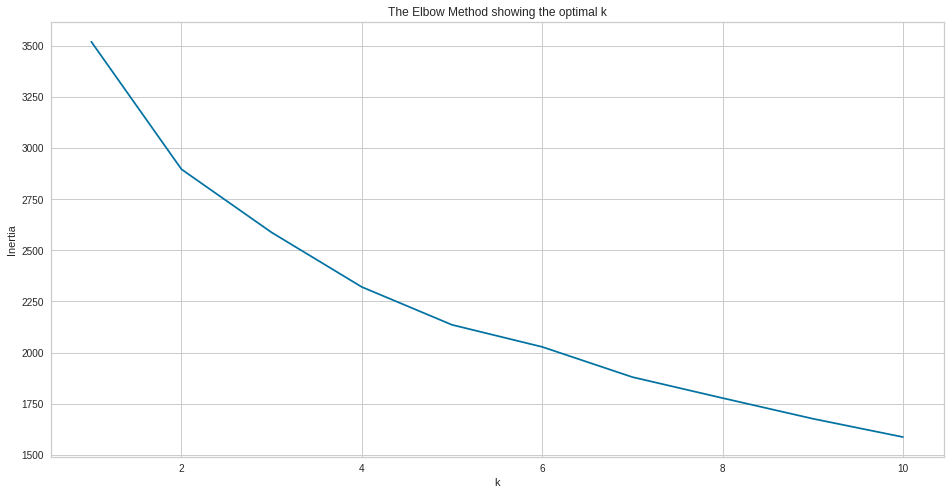

In [ ]:
#clustering

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(masterdata_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.1770322619437342
For k=3, the average silhouette score is 0.16933022187236035
For k=4, the average silhouette score is 0.18536982471211325
For k=5, the average silhouette score is 0.1833670886229957
For k=6, the average silhouette score is 0.15804687978121895
For k=7, the average silhouette score is 0.2110006747034956
For k=8, the average silhouette score is 0.2178855463723277
For k=9, the average silhouette score is 0.21119276994920436
For k=10, the average silhouette score is 0.21998173659947112


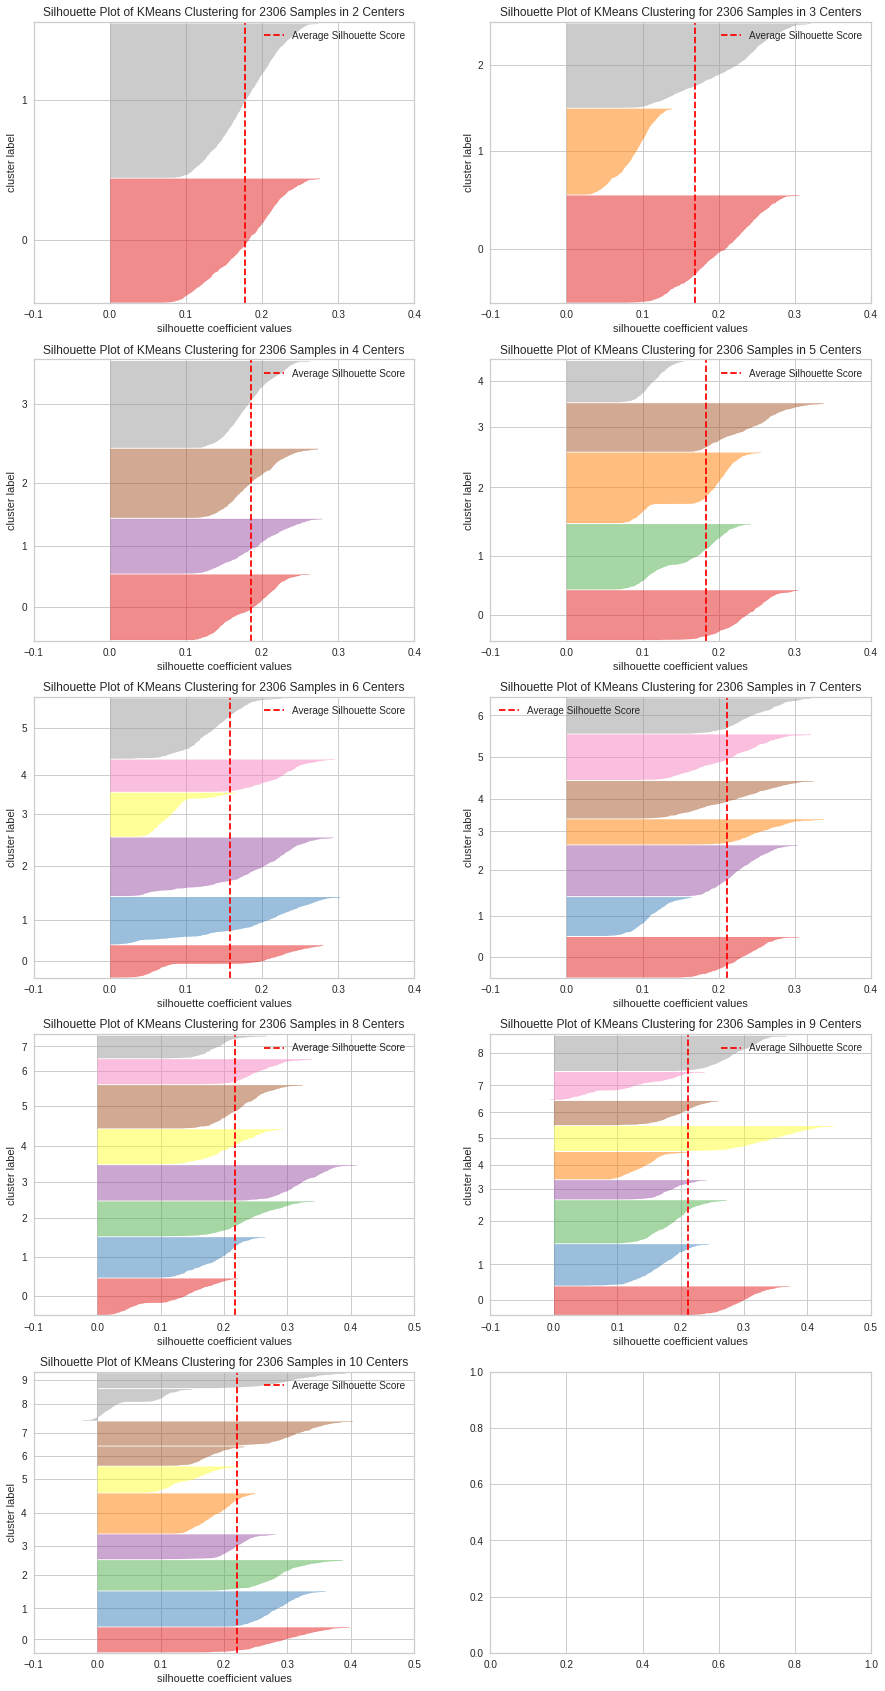

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(masterdata_cluster)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
#we pick 4 cluster based on above (lowest cluster number with all cluster value are more than average sillhouette score and relative similar thickness for each cluster)
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(masterdata_cluster)
cluster_label = cluster_model.labels_
masterdata_cluster['cluster'] = cluster_label
masterdata_cluster[columns_list] = scaler.inverse_transform(masterdata_cluster[columns_list])
masterdata_cluster['CustomerId'] = customer_master
masterdata_cluster

<ipython-input-149-fdc4250d9d9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masterdata_cluster['cluster'] = cluster_label
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
<ipython-input-149-fdc4250d9d9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

CreditScore   Age  Tenure   Balance  NumOfProducts  HasCrCard  \
4          850.00 43.00    2.00 125510.00           1.00       1.00   
5          645.00 44.00    8.00 113755.00           2.00       1.00   
6          822.00 50.00    7.00      0.00           2.00       1.00   
8          501.00 44.00    4.00 142051.00           2.00       0.00   
15         616.00 45.00    3.00 143129.00           2.00       0.00   
...           ...   ...     ...       ...            ...        ...   
9975       610.00 50.00    1.00 113957.00           2.00       1.00   
9979       677.00 58.00    1.00  90022.00           1.00       0.00   
9982       655.00 46.00    7.00 137145.00           1.00       1.00   
9986       673.00 47.00    1.00 183579.00           2.00       0.00   
9991       597.00 53.00    4.00  88381.00           1.00       1.00   

      IsActiveMember  EstimatedSalary  Exited  Geography_category  \
4               1.00         79084.00    0.00                2.00   
5               0.00        149756.00    1.00                2.00   
6               1.00         10062.00    0.00                0.00   
8               1.00         74940.00    0.00                0.00   
15              1.00         64327.00    0.00                1.00   
...              ...              ...     ...                 ...   
9975            0.00        196526.00    1.00                1.00   
9979            1.00          2988.00    0.00                0.00   
9982            0.00        115146.00    1.00                1.00   
9986            1.00         34047.00    0.00                1.00   
9991            0.00         69384.00    1.00                0.00   

      Gender_category  cluster CustomerId  
4                1.00        2   15737888  
5                0.00        1   15574012  
6                0.00        0   15592531  
8                0.00        0   15792365  
15               0.00        0   15643966  
...               ...      ...        ...  
9975             0.00        1   15666295  
9979             1.00        2   15692664  
9982             1.00        1   15768163  
9986             0.00        0   15581736  
9991             1.00        1   15769959  

[2306 rows x 13 columns]

In [ ]:
df_GenX_Cluster = masterdata_cluster.groupby(['cluster','Exited']).agg('nunique')['CustomerId']
df_GenX_Cluster

cluster  Exited
0        0.00      429
         1.00      162
1        1.00      661
2        0.00      342
         1.00      205
3        0.00      507
Name: CustomerId, dtype: int64

In [ ]:
masterdata_cluster.groupby(['cluster','Exited'])['Balance'].agg(['mean','median','max','min'])

mean    median       max  min
cluster Exited                                  
0       0.00   74864.00  91549.00 190678.00 0.00
        1.00   91171.40 107581.00 202904.00 0.00
1       1.00   89631.66 108508.00 213146.00 0.00
2       0.00   69649.93  89276.00 193213.00 0.00
        1.00   91263.94 110123.00 238387.00 0.00
3       0.00   75762.91  96353.00 212696.00 0.00

In [ ]:
masterdata_cluster.groupby(['cluster','Exited','NumOfProducts']).agg('nunique')['CustomerId']

cluster  Exited  NumOfProducts
0        0.00    1.00             203
                 2.00             225
                 3.00               1
         1.00    1.00             111
                 2.00              25
                 3.00              19
                 4.00               7
1        1.00    1.00             485
                 2.00              91
                 3.00              64
                 4.00              21
2        0.00    1.00             153
                 2.00             189
         1.00    1.00             132
                 2.00              42
                 3.00              24
                 4.00               7
3        0.00    1.00             237
                 2.00             270
Name: CustomerId, dtype: int64

In [ ]:
masterdata_cluster.groupby(['cluster','Exited','Gender_category']).agg('nunique')['CustomerId']

cluster  Exited  Gender_category
0        0.00    0.00               429
         1.00    0.00               162
1        1.00    0.00               295
                 1.00               366
2        0.00    1.00               342
         1.00    1.00               205
3        0.00    0.00               296
                 1.00               211
Name: CustomerId, dtype: int64

In [ ]:
masterdata_cluster.groupby(['cluster','Exited','Geography_category']).agg('nunique')['CustomerId']

cluster  Exited  Geography_category
0        0.00    0.00                  214
                 1.00                   90
                 2.00                  125
         1.00    0.00                   61
                 1.00                   68
                 2.00                   33
1        1.00    0.00                  248
                 1.00                  275
                 2.00                  138
2        0.00    0.00                  164
                 1.00                   73
                 2.00                  105
         1.00    0.00                   88
                 1.00                   83
                 2.00                   34
3        0.00    0.00                  265
                 1.00                  107
                 2.00                  135
Name: CustomerId, dtype: int64

In [ ]:
masterdata_cluster.groupby(['cluster','Exited','HasCrCard']).agg('nunique')['CustomerId']

cluster  Exited  HasCrCard
0        0.00    0.00         130
                 1.00         299
         1.00    0.00          59
                 1.00         103
1        1.00    0.00         190
                 1.00         471
2        0.00    0.00         101
                 1.00         241
         1.00    0.00          79
                 1.00         126
3        0.00    0.00         155
                 1.00         352
Name: CustomerId, dtype: int64

In [ ]:
masterdata_cluster.groupby(['cluster','Exited','IsActiveMember']).agg('nunique')['CustomerId']

cluster  Exited  IsActiveMember
0        0.00    1.00              429
         1.00    1.00              162
1        1.00    0.00              661
2        0.00    1.00              342
         1.00    1.00              205
3        0.00    0.00              507
Name: CustomerId, dtype: int64

In [ ]:
masterdata_cluster.groupby(['cluster','Exited'])['EstimatedSalary'].agg(['mean','median','max','min'])

mean    median       max     min
cluster Exited                                      
0       0.00   100062.60  95719.00 198926.00 1787.00
        1.00    99824.40 103151.50 199273.00   11.00
1       1.00   103104.34 104016.00 199378.00  123.00
2       0.00    97819.60  95628.50 199661.00  706.00
        1.00   102679.66 106061.00 196794.00  738.00
3       0.00    99240.00  98661.00 198398.00  487.00

In [ ]:
masterdata_cluster.groupby(['cluster','Exited'])['Tenure'].agg(['mean','median','max','min'])

mean  median   max  min
cluster Exited                         
0       0.00    5.10    5.00 10.00 0.00
        1.00    4.84    5.00 10.00 0.00
1       1.00    4.93    5.00 10.00 0.00
2       0.00    4.76    5.00 10.00 0.00
        1.00    4.67    4.00 10.00 0.00
3       0.00    5.29    5.00 10.00 0.00

In [ ]:
masterdata_cluster.groupby(['cluster','Exited'])['Age'].agg(['mean','median','max','min'])

mean  median   max   min
cluster Exited                          
0       0.00   48.59   47.00 58.00 43.00
        1.00   49.36   49.00 58.00 43.00
1       1.00   49.12   49.00 58.00 43.00
2       0.00   48.31   47.00 58.00 43.00
        1.00   49.62   49.00 58.00 43.00
3       0.00   46.13   45.00 58.00 43.00

https://365datascience.com/tutorials/python-tutorials/pca-k-means/
edisi mikir selanjutnya

#Genx_exited

In [ ]:
df_cluster_exited = df1[df1['Exited']==1]
df_cluster_exited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerId               2037 non-null   object  
 1   Surname                  2037 non-null   object  
 2   CreditScore              2037 non-null   int64   
 3   Geography                2037 non-null   object  
 4   Gender                   2037 non-null   object  
 5   Age                      2037 non-null   int64   
 6   Tenure                   2037 non-null   int64   
 7   Balance                  2037 non-null   int64   
 8   NumOfProducts            2037 non-null   int64   
 9   HasCrCard                2037 non-null   int64   
 10  IsActiveMember           2037 non-null   int64   
 11  EstimatedSalary          2037 non-null   int64   
 12  Exited                   2037 non-null   int64   
 13  Age_group                2037 non-null   category
 14  CreditCa

In [ ]:
df_clust1 = df_cluster_exited[df_cluster_exited['Age_group']=='Gen X']
df_clust1

CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
5      15574012          Chu          645     Spain    Male   44       8   
16     15737452        Romeo          653   Germany    Male   58       1   
35     15794171     Lombardo          475    France  Female   45       0   
41     15738148       Clarke          465    France  Female   51       8   
43     15755196       Lavine          834    France  Female   49       2   
...         ...          ...          ...       ...     ...  ...     ...   
9956   15707861        Nucci          520    France  Female   46      10   
9962   15594612        Flynn          702     Spain    Male   44       9   
9975   15666295        Smith          610   Germany    Male   50       1   
9982   15768163      Griffin          655   Germany  Female   46       7   
9991   15769959  Ajuluchukwu          597    France  Female   53       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
5      113755              2          1               0           149756   
16     132602              1          1               0             5097   
35     134264              1          1               0            27822   
41     122522              1          0               0           181297   
43     131394              1          0               0           194365   
...       ...            ...        ...             ...              ...   
9956    85216              1          1               0           117369   
9962        0              1          0               0            59207   
9975   113957              2          1               0           196526   
9982   137145              1          1               0           115146   
9991    88381              1          1               0            69384   

      Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  
5          1     Gen X           Poor         Level 3                    Good  
16         1     Gen X           Fair         Level 3                     NaN  
35         1     Gen X      Very Poor         Level 3                    Poor  
41         1     Gen X      Very Poor         Level 3               Excellent  
43         1     Gen X      Excellent         Level 3                     NaN  
...      ...       ...            ...             ...                     ...  
9956       1     Gen X      Very Poor         Level 2                    Good  
9962       1     Gen X           Good         Level 1                    Fair  
9975       1     Gen X           Poor         Level 3                     NaN  
9982       1     Gen X           Fair         Level 3                    Good  
9991       1     Gen X           Poor         Level 2                    Fair  

[1028 rows x 17 columns]

In [ ]:
df_clust1.drop(columns=['Surname','Geography','Gender','Age_group','CreditCategory','Balancecategory','EstimatedSalarycategory'], inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df_clust1.drop(columns=['CreditScore','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited','EstimatedSalary','Age'], inplace=True)
df_clust1

CustomerId  Tenure
5      15574012       8
16     15737452       1
35     15794171       0
41     15738148       8
43     15755196       2
...         ...     ...
9956   15707861      10
9962   15594612       9
9975   15666295       1
9982   15768163       7
9991   15769959       4

[1028 rows x 2 columns]

In [ ]:
columns_list = df_clust1.columns

In [ ]:
# Scaling numeric 
numeric = ['Tenure']



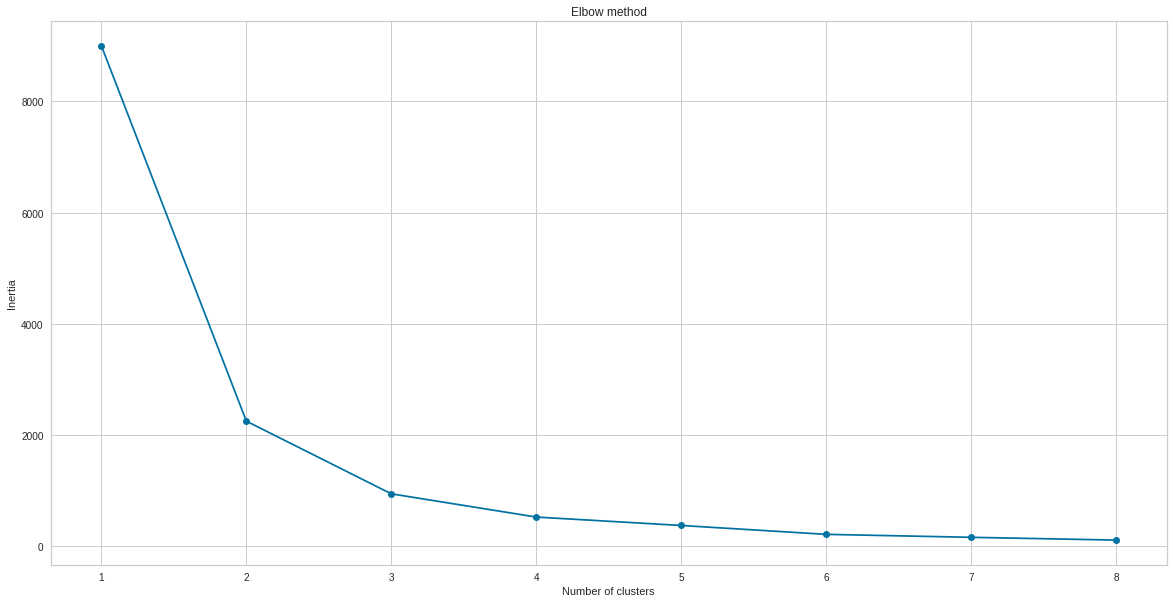

In [ ]:
inertias = []
fig = plt.figure(figsize=(20,10))

for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clust1[numeric])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
#cluster recommendation 3/ 4

For k=2, the average silhouette score is 0.6410601173756849
For k=3, the average silhouette score is 0.6290063195489919
For k=4, the average silhouette score is 0.6373496162817123


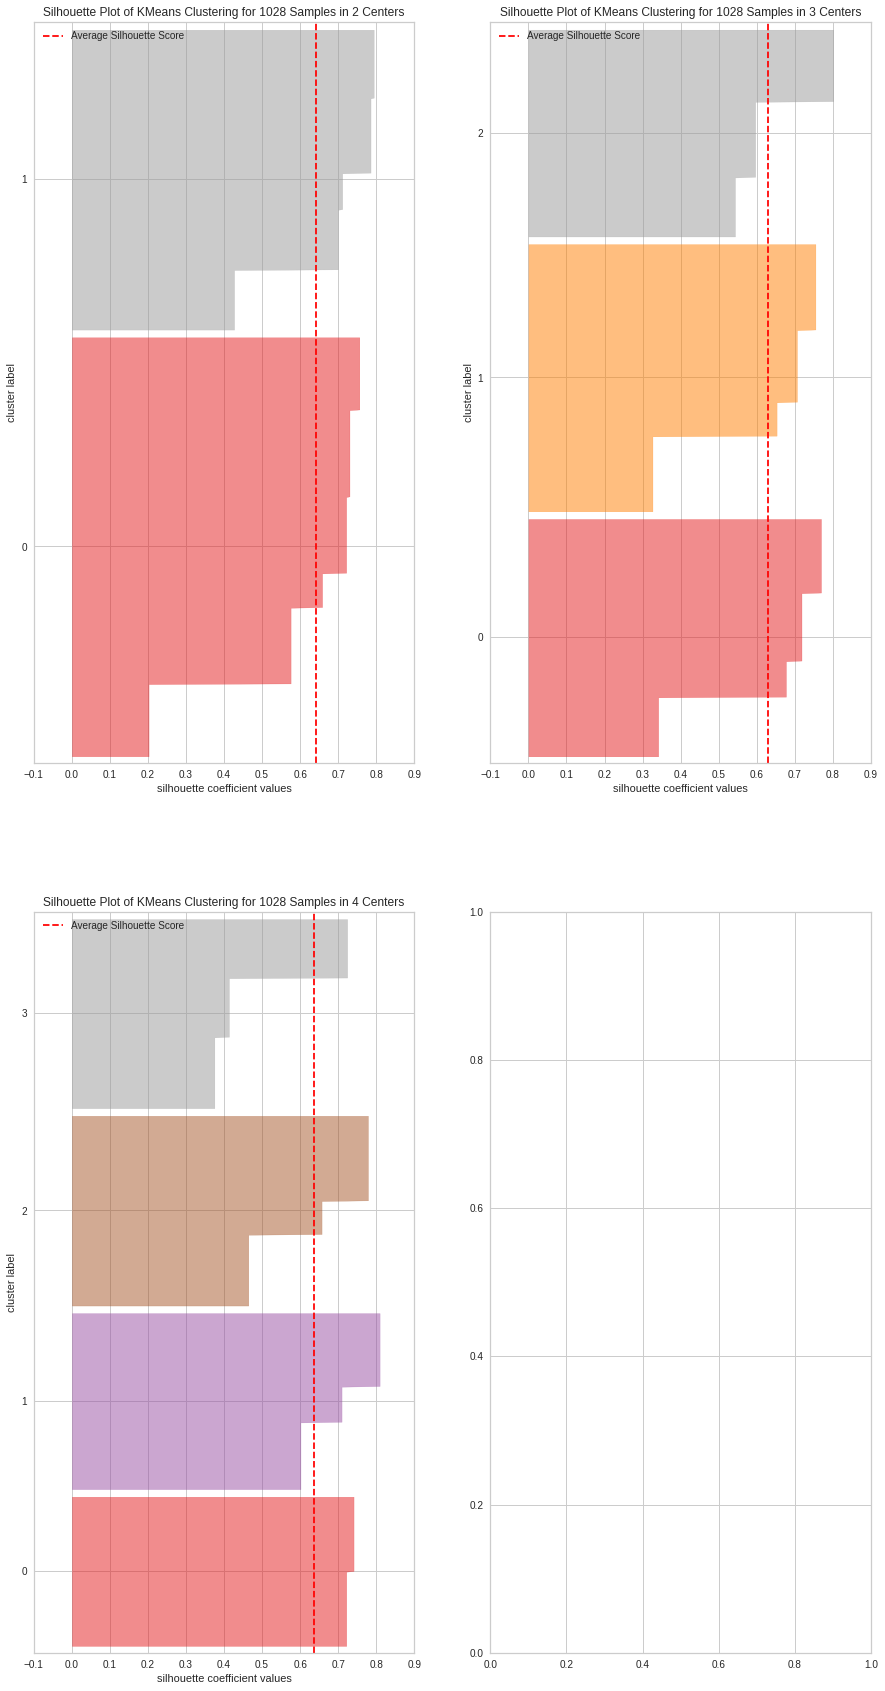

In [ ]:
# Silhouette score plot
K = range(2,5)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_clust1[numeric])
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4,random_state = 42)
cluster_model.fit(df_clust1[numeric])
cluster_label = cluster_model.labels_
df_clust1['cluster'] = cluster_label
df_clust1['CustomerId'] = customer_master

df_clust1

<ipython-input-168-bf9a3398eab4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust1['cluster'] = cluster_label
<ipython-input-168-bf9a3398eab4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust1['CustomerId'] = customer_master


CustomerId  Tenure  cluster
5      15574012       8        1
16     15737452       1        0
35     15794171       0        0
41     15738148       8        1
43     15755196       2        0
...         ...     ...      ...
9956   15707861      10        1
9962   15594612       9        1
9975   15666295       1        0
9982   15768163       7        3
9991   15769959       4        2

[1028 rows x 3 columns]

#by tenure

In [ ]:
avg1 = df_clust1.groupby(['cluster'],as_index=False).agg(['mean','max','min'])
avg1.drop(columns=['CustomerId'], inplace=True)

avg1.round(2)

Tenure        
          mean max min
cluster               
0         1.20   2   0
1         8.82  10   8
2         3.98   5   3
3         6.50   7   6

In [ ]:
bytenure = df_clust1.groupby(['cluster'])['CustomerId'].nunique().reset_index()
bytenure

cluster  CustomerId
0        0         277
1        1         257
2        2         322
3        3         172

#by estimated salary

In [ ]:
df_clust3 = df_cluster_exited[df_cluster_exited['Age_group']=='Gen X']
df_clust3.drop(columns=['Surname','Geography','Gender','Age_group','CreditCategory','Balancecategory','EstimatedSalarycategory'], inplace=True)
df_clust3.drop(columns=['CreditScore','Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited','Tenure','Age'], inplace=True)
df_clust3


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CustomerId  EstimatedSalary
5      15574012           149756
16     15737452             5097
35     15794171            27822
41     15738148           181297
43     15755196           194365
...         ...              ...
9956   15707861           117369
9962   15594612            59207
9975   15666295           196526
9982   15768163           115146
9991   15769959            69384

[1028 rows x 2 columns]

In [ ]:
# Scaling numeric 
numeric = ['EstimatedSalary']


In [ ]:
scaler = MinMaxScaler() #Transform data by scaler
df_clust3[numeric] = scaler.fit_transform(df_clust3[numeric])
df_clust3

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


CustomerId  EstimatedSalary
5      15574012             0.75
16     15737452             0.03
35     15794171             0.14
41     15738148             0.91
43     15755196             0.97
...         ...              ...
9956   15707861             0.59
9962   15594612             0.30
9975   15666295             0.99
9982   15768163             0.58
9991   15769959             0.35

[1028 rows x 2 columns]

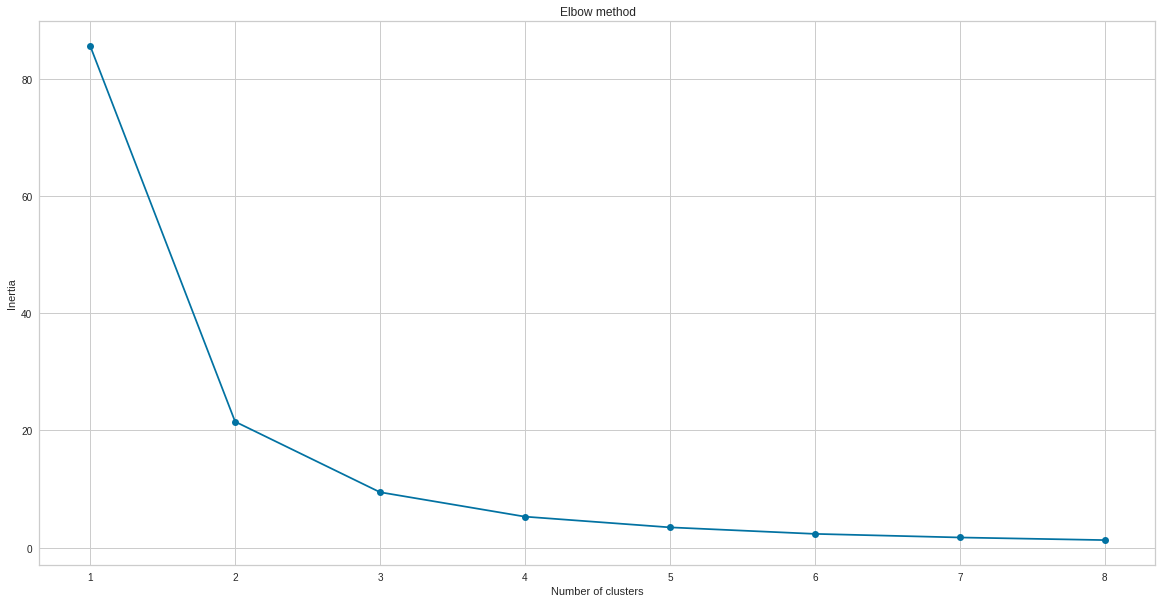

In [ ]:
inertias = []
fig = plt.figure(figsize=(20,10))

for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clust3[numeric])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
#cluster recommendation 3/ 4

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4,random_state = 42)
cluster_model.fit(df_clust3[numeric])
cluster_label = cluster_model.labels_
df_clust3['cluster'] = cluster_label
df_clust3[numeric] = scaler.inverse_transform(df_clust3[numeric])
df_clust3

<ipython-input-175-6090ddc0f9a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust3['cluster'] = cluster_label
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


CustomerId  EstimatedSalary  cluster
5      15574012        149756.00        2
16     15737452          5097.00        3
35     15794171         27822.00        3
41     15738148        181297.00        1
43     15755196        194365.00        1
...         ...              ...      ...
9956   15707861        117369.00        2
9962   15594612         59207.00        0
9975   15666295        196526.00        1
9982   15768163        115146.00        2
9991   15769959         69384.00        0

[1028 rows x 3 columns]

In [ ]:
avg3 = df_clust3.groupby(['cluster'],as_index=False).agg(['mean','max','min'])
avg3.drop(columns=['CustomerId'], inplace=True)

avg3.round(2)

EstimatedSalary                    
                   mean       max       min
cluster                                    
0              78927.29 103379.00  52629.00
1             175442.73 199378.00 152167.00
2             128431.21 151481.00 103712.00
3              25853.14  52035.00     11.00

In [ ]:
bysalary = df_clust3.groupby(['cluster'])['CustomerId'].nunique().reset_index()
bysalary

cluster  CustomerId
0        0         256
1        1         259
2        2         258
3        3         255

#by balance

In [ ]:
df_cluster_genx_exited= df_cluster_exited[df_cluster_exited['Age_group']=='Gen X']
df_clust4 = df_cluster_exited[df_cluster_exited['Age_group']=='Gen X']
df_clust4.drop(columns=['Surname','Geography','Gender','Age_group','CreditCategory','Balancecategory','EstimatedSalarycategory'], inplace=True)
df_clust4.drop(columns=['CreditScore','Tenure','EstimatedSalary', 'NumOfProducts','HasCrCard','IsActiveMember','Exited','Tenure','Age'], inplace=True)
df_clust4

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CustomerId  Balance
5      15574012   113755
16     15737452   132602
35     15794171   134264
41     15738148   122522
43     15755196   131394
...         ...      ...
9956   15707861    85216
9962   15594612        0
9975   15666295   113957
9982   15768163   137145
9991   15769959    88381

[1028 rows x 2 columns]

In [ ]:
# Scaling numeric 
numeric = ['Balance']


In [ ]:
scaler = MinMaxScaler() #Transform data by scaler
df_clust4[numeric] = scaler.fit_transform(df_clust4[numeric])
df_clust4

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


CustomerId  Balance
5      15574012     0.48
16     15737452     0.56
35     15794171     0.56
41     15738148     0.51
43     15755196     0.55
...         ...      ...
9956   15707861     0.36
9962   15594612     0.00
9975   15666295     0.48
9982   15768163     0.58
9991   15769959     0.37

[1028 rows x 2 columns]

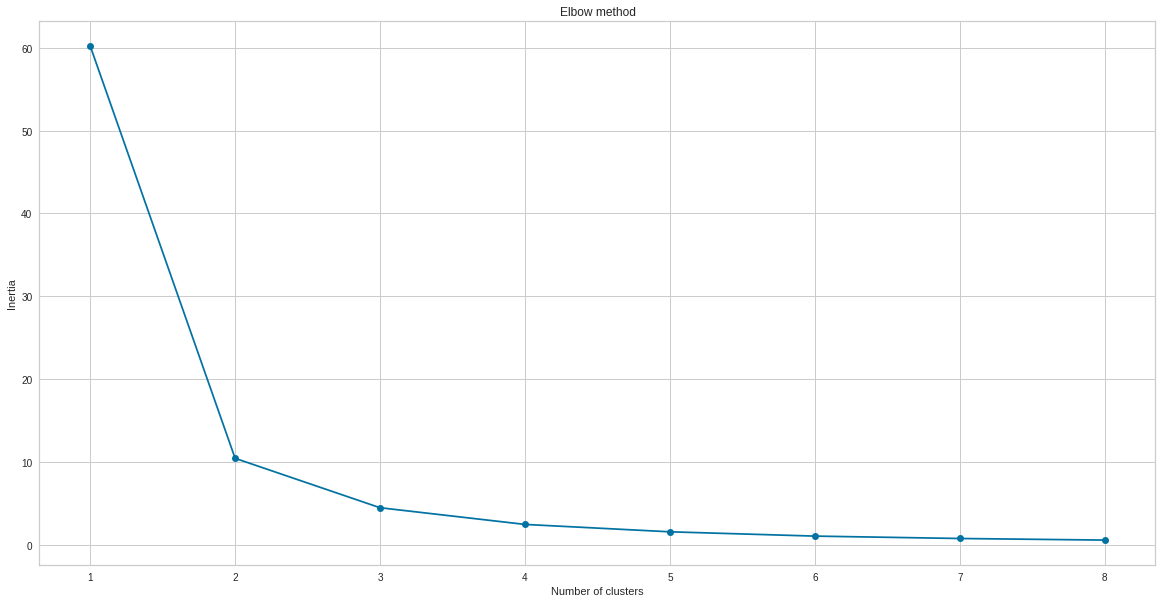

In [ ]:
inertias = []
fig = plt.figure(figsize=(20,10))

for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clust4[numeric])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
#cluster recommendation 3/ 4

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4,random_state = 42)
cluster_model.fit(df_clust4[numeric])
cluster_label = cluster_model.labels_
df_clust4['cluster'] = cluster_label
df_clust4[numeric] = scaler.inverse_transform(df_clust4[numeric])
df_clust4

<ipython-input-182-19a82e5ff6f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust4['cluster'] = cluster_label
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


CustomerId   Balance  cluster
5      15574012 113755.00        3
16     15737452 132602.00        3
35     15794171 134264.00        3
41     15738148 122522.00        3
43     15755196 131394.00        3
...         ...       ...      ...
9956   15707861  85216.00        0
9962   15594612      0.00        2
9975   15666295 113957.00        3
9982   15768163 137145.00        3
9991   15769959  88381.00        0

[1028 rows x 3 columns]

In [ ]:
avg4 = df_clust4.groupby(['cluster'],as_index=False).agg(['mean','max','min'])
avg4.drop(columns=['CustomerId'], inplace=True)

avg4.round(2)

Balance                    
             mean       max       min
cluster                              
0        84367.61 101465.00  44020.00
1       159215.79 238387.00 139493.00
2          345.97  29602.00      0.00
3       119447.41 138843.00 102016.00

In [ ]:
# Joining data
merge_1 = df_clust4.merge(df_cluster_genx_exited, how = 'inner', on='CustomerId')
merge_1.drop(columns=['Balance_y'], inplace=True)
merge_1.head()

CustomerId  Balance_x  cluster   Surname  CreditScore Geography  Gender  \
0   15574012  113755.00        3       Chu          645     Spain    Male   
1   15737452  132602.00        3     Romeo          653   Germany    Male   
2   15794171  134264.00        3  Lombardo          475    France  Female   
3   15738148  122522.00        3    Clarke          465    France  Female   
4   15755196  131394.00        3    Lavine          834    France  Female   

   Age  Tenure  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0   44       8              2          1               0           149756   
1   58       1              1          1               0             5097   
2   45       0              1          1               0            27822   
3   51       8              1          0               0           181297   
4   49       2              1          0               0           194365   

   Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  
0       1     Gen X           Poor         Level 3                    Good  
1       1     Gen X           Fair         Level 3                     NaN  
2       1     Gen X      Very Poor         Level 3                    Poor  
3       1     Gen X      Very Poor         Level 3               Excellent  
4       1     Gen X      Excellent         Level 3                     NaN

In [ ]:
avg4merge = merge_1.groupby(['cluster'],as_index=False).agg(['mean','max','min'])
avg4merge.drop(columns=['CustomerId'], inplace=True)

avg4merge.round(2)

Balance_x                     CreditScore             Age          \
             mean       max       min        mean  max  min  mean max min   
cluster                                                                     
0        84367.61 101465.00  44020.00      654.33  850  383 49.04  58  43   
1       159215.79 238387.00 139493.00      645.04  850  350 49.33  58  43   
2          345.97  29602.00      0.00      644.38  850  350 49.52  58  43   
3       119447.41 138843.00 102016.00      639.33  850  359 49.16  58  43   

        Tenure         NumOfProducts         HasCrCard         IsActiveMember  \
          mean max min          mean max min      mean max min           mean   
cluster                                                                         
0         4.88  10   0          1.47   4   1      0.63   1   0           0.37   
1         4.96  10   0          1.45   4   1      0.63   1   0           0.32   
2         4.76  10   0          1.49   4   1      0.67   1   0           0.34   
3         4.88  10   0          1.45   4   1      0.73   1   0           0.38   

                EstimatedSalary              Exited          
        max min            mean     max  min   mean max min  
cluster                                                      
0         1   0       103648.66  199378  548   1.00   1   1  
1         1   0       102967.67  198402  738   1.00   1   1  
2         1   0       103566.04  199290  944   1.00   1   1  
3         1   0       101177.05  198715   11   1.00   1   1

In [ ]:
bybalance = merge_1.groupby(['cluster'])['CustomerId'].nunique().reset_index()
bybalance

cluster  CustomerId
0        0         175
1        1         174
2        2         259
3        3         420

#by balance x estimatedsalary

In [ ]:
df_clust5 = df_cluster_exited[df_cluster_exited['Age_group']=='Gen X']
df_clust5.drop(columns=['Surname','Geography','Gender','Age_group','CreditCategory','Balancecategory','EstimatedSalarycategory'], inplace=True)
df_clust5.drop(columns=['CreditScore','Tenure', 'NumOfProducts','HasCrCard','IsActiveMember','Exited','Tenure','Age'], inplace=True)
df_clust5

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CustomerId  Balance  EstimatedSalary
5      15574012   113755           149756
16     15737452   132602             5097
35     15794171   134264            27822
41     15738148   122522           181297
43     15755196   131394           194365
...         ...      ...              ...
9956   15707861    85216           117369
9962   15594612        0            59207
9975   15666295   113957           196526
9982   15768163   137145           115146
9991   15769959    88381            69384

[1028 rows x 3 columns]

In [ ]:
# Scaling numeric 
numeric = ['Balance','EstimatedSalary']

In [ ]:
scaler = MinMaxScaler() #Transform data by scaler
df_clust5[numeric] = scaler.fit_transform(df_clust5[numeric])
df_clust5

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


CustomerId  Balance  EstimatedSalary
5      15574012     0.48             0.75
16     15737452     0.56             0.03
35     15794171     0.56             0.14
41     15738148     0.51             0.91
43     15755196     0.55             0.97
...         ...      ...              ...
9956   15707861     0.36             0.59
9962   15594612     0.00             0.30
9975   15666295     0.48             0.99
9982   15768163     0.58             0.58
9991   15769959     0.37             0.35

[1028 rows x 3 columns]

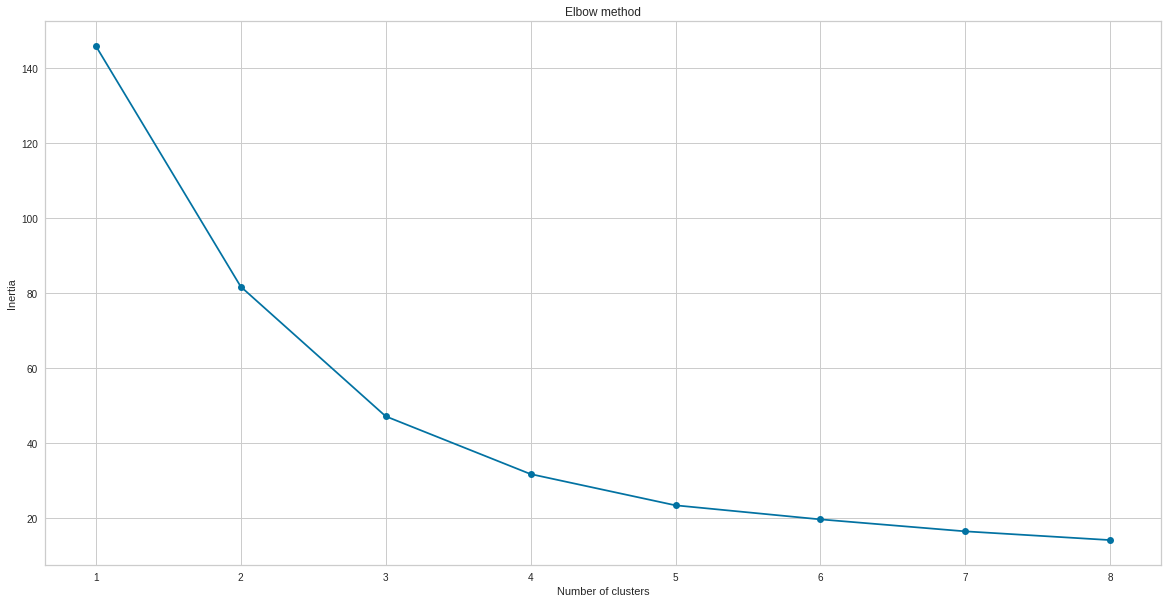

In [ ]:
inertias = []
fig = plt.figure(figsize=(20,10))

for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clust5[numeric])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
#cluster recommendation 3/ 4

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3,random_state = 42)
cluster_model.fit(df_clust5[numeric])
cluster_label = cluster_model.labels_
df_clust5['cluster'] = cluster_label
df_clust5[numeric] = scaler.inverse_transform(df_clust5[numeric])
df_clust5

<ipython-input-191-105b49dc686e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust5['cluster'] = cluster_label
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


CustomerId   Balance  EstimatedSalary  cluster
5      15574012 113755.00        149756.00        0
16     15737452 132602.00          5097.00        1
35     15794171 134264.00         27822.00        1
41     15738148 122522.00        181297.00        0
43     15755196 131394.00        194365.00        0
...         ...       ...              ...      ...
9956   15707861  85216.00        117369.00        0
9962   15594612      0.00         59207.00        2
9975   15666295 113957.00        196526.00        0
9982   15768163 137145.00        115146.00        0
9991   15769959  88381.00         69384.00        1

[1028 rows x 4 columns]

In [ ]:
avg5 = df_clust5.groupby(['cluster'],as_index=False).agg(['mean','max','min'])
avg5.drop(columns=['CustomerId'], inplace=True)

avg5.round(2)

Balance                    EstimatedSalary                    
             mean       max      min            mean       max       min
cluster                                                                 
0       121026.83 238387.00 53772.00       150953.06 199378.00 100686.00
1       122024.07 216109.00 45472.00        49302.85  99922.00     11.00
2         2756.79  70754.00     0.00       102947.48 199290.00    944.00

In [ ]:
bybalance_salary = df_clust5.groupby(['cluster'])['CustomerId'].nunique().reset_index()
bybalance_salary

cluster  CustomerId
0        0         395
1        1         362
2        2         271

# by hascard


In [ ]:
df_GenX_exited = df_GenX[df_GenX['Exited']==1]
customer_master =df_GenX['CustomerId'] 
df_GenX_exited = df_GenX.drop(columns=['cluster','Exited','CustomerId','Gender_category'], inplace=False)
df_GenX_exited


CreditScore   Age  Tenure   Balance  NumOfProducts  HasCrCard  \
4          850.00 43.00    2.00 125510.00           1.00       1.00   
5          645.00 44.00    8.00 113755.00           2.00       1.00   
6          822.00 50.00    7.00      0.00           2.00       1.00   
8          501.00 44.00    4.00 142051.00           2.00       0.00   
15         616.00 45.00    3.00 143129.00           2.00       0.00   
...           ...   ...     ...       ...            ...        ...   
9975       610.00 50.00    1.00 113957.00           2.00       1.00   
9979       677.00 58.00    1.00  90022.00           1.00       0.00   
9982       655.00 46.00    7.00 137145.00           1.00       1.00   
9986       673.00 47.00    1.00 183579.00           2.00       0.00   
9991       597.00 53.00    4.00  88381.00           1.00       1.00   

      IsActiveMember  EstimatedSalary  Geography_category  
4               1.00         79084.00                2.00  
5               0.00        149756.00                2.00  
6               1.00         10062.00                0.00  
8               1.00         74940.00                0.00  
15              1.00         64327.00                1.00  
...              ...              ...                 ...  
9975            0.00        196526.00                1.00  
9979            1.00          2988.00                0.00  
9982            0.00        115146.00                1.00  
9986            1.00         34047.00                1.00  
9991            0.00         69384.00                0.00  

[2306 rows x 9 columns]

In [ ]:
df_clust2=df_GenX_exited.copy()

In [ ]:
columns_list= df_clust2.columns

In [ ]:
scaler = MinMaxScaler() #Transform data by scaler
df_clust2[columns_list] = scaler.fit_transform(df_clust2[columns_list])
df_clust2

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
4            1.00 0.00    0.20     0.53           0.00       1.00   
5            0.59 0.07    0.80     0.48           0.33       1.00   
6            0.94 0.47    0.70     0.00           0.33       1.00   
8            0.30 0.07    0.40     0.60           0.33       0.00   
15           0.53 0.13    0.30     0.60           0.33       0.00   
...           ...  ...     ...      ...            ...        ...   
9975         0.52 0.47    0.10     0.48           0.33       1.00   
9979         0.65 1.00    0.10     0.38           0.00       0.00   
9982         0.61 0.20    0.70     0.58           0.00       1.00   
9986         0.65 0.27    0.10     0.77           0.33       0.00   
9991         0.49 0.67    0.40     0.37           0.00       1.00   

      IsActiveMember  EstimatedSalary  Geography_category  
4               1.00             0.40                1.00  
5               0.00             0.75                1.00  
6               1.00             0.05                0.00  
8               1.00             0.38                0.00  
15              1.00             0.32                0.50  
...              ...              ...                 ...  
9975            0.00             0.98                0.50  
9979            1.00             0.01                0.00  
9982            0.00             0.58                0.50  
9986            1.00             0.17                0.50  
9991            0.00             0.35                0.00  

[2306 rows x 9 columns]

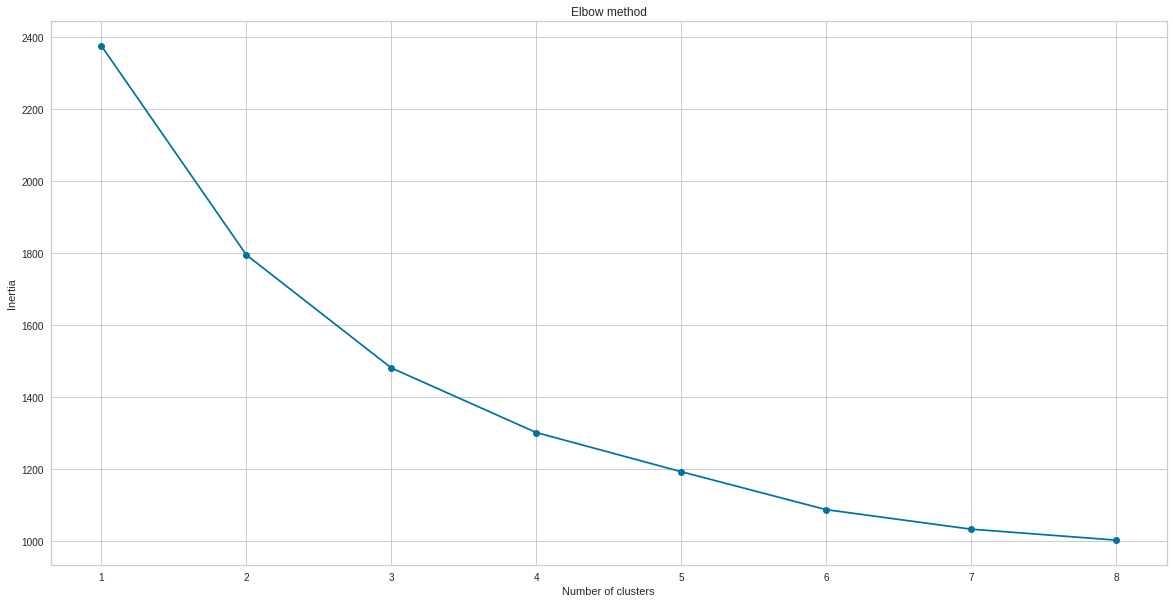

In [ ]:
inertias = []
fig = plt.figure(figsize=(20,10))

for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clust2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
#cluster recommendation 3/ 4

In [ ]:
#we pick 4 cluster based on above (lowest cluster number with all cluster value are more than average sillhouette score and relative similar thickness for each cluster)
cluster_model = cluster.KMeans(n_clusters=4,random_state = 42)
cluster_model.fit(df_clust2)
cluster_label = cluster_model.labels_
df_clust2['cluster'] = cluster_label
df_clust2[columns_list] = scaler.inverse_transform(df_clust2[columns_list])
df_clust2['CustomerId'] = customer_master
df_clust2

CreditScore   Age  Tenure   Balance  NumOfProducts  HasCrCard  \
4          850.00 43.00    2.00 125510.00           1.00       1.00   
5          645.00 44.00    8.00 113755.00           2.00       1.00   
6          822.00 50.00    7.00      0.00           2.00       1.00   
8          501.00 44.00    4.00 142051.00           2.00       0.00   
15         616.00 45.00    3.00 143129.00           2.00       0.00   
...           ...   ...     ...       ...            ...        ...   
9975       610.00 50.00    1.00 113957.00           2.00       1.00   
9979       677.00 58.00    1.00  90022.00           1.00       0.00   
9982       655.00 46.00    7.00 137145.00           1.00       1.00   
9986       673.00 47.00    1.00 183579.00           2.00       0.00   
9991       597.00 53.00    4.00  88381.00           1.00       1.00   

      IsActiveMember  EstimatedSalary  Geography_category  cluster CustomerId  
4               1.00         79084.00                2.00        0   15737888  
5               0.00        149756.00                2.00        1   15574012  
6               1.00         10062.00                0.00        0   15592531  
8               1.00         74940.00                0.00        2   15792365  
15              1.00         64327.00                1.00        2   15643966  
...              ...              ...                 ...      ...        ...  
9975            0.00        196526.00                1.00        1   15666295  
9979            1.00          2988.00                0.00        2   15692664  
9982            0.00        115146.00                1.00        1   15768163  
9986            1.00         34047.00                1.00        2   15581736  
9991            0.00         69384.00                0.00        1   15769959  

[2306 rows x 11 columns]

In [ ]:
data = df_clust2.groupby(['cluster'],as_index=False).agg(['mean','max','min','count'])
data.drop(columns=['CustomerId'], inplace=True)
data.round(2)

CreditScore                       Age                   Tenure        \
               mean    max    min count  mean   max   min count   mean   max   
cluster                                                                        
0            650.63 850.00 350.00   769 48.79 58.00 43.00   769   4.93 10.00   
1            644.48 850.00 351.00   823 47.80 58.00 43.00   823   5.08 10.00   
2            650.72 850.00 411.00   369 48.83 58.00 43.00   369   4.80 10.00   
3            648.59 850.00 383.00   345 47.86 58.00 43.00   345   5.10 10.00   

                    Balance                      NumOfProducts            \
         min count     mean       max  min count          mean  max  min   
cluster                                                                    
0       0.00   769 76828.28 209767.00 0.00   769          1.55 4.00 1.00   
1       0.00   823 83269.83 213146.00 0.00   823          1.47 4.00 1.00   
2       0.00   369 82208.27 238387.00 0.00   369          1.51 4.00 1.00   
3       0.00   345 84426.81 191808.00 0.00   345          1.48 4.00 1.00   

              HasCrCard                 IsActiveMember                  \
        count      mean  max  min count           mean  max  min count   
cluster                                                                  
0         769      1.00 1.00 1.00   769           1.00 1.00 1.00   769   
1         823      1.00 1.00 1.00   823           0.00 0.00 0.00   823   
2         369      0.00 0.00 0.00   369           1.00 1.00 1.00   369   
3         345      0.00 0.00 0.00   345           0.00 0.00 0.00   345   

        EstimatedSalary                        Geography_category            \
                   mean       max    min count               mean  max  min   
cluster                                                                       
0              98911.19 199661.00  11.00   769               0.78 2.00 0.00   
1             102311.39 199378.00 123.00   823               0.79 2.00 0.00   
2             101732.62 199505.00 645.00   369               0.84 2.00 0.00   
3              99317.04 198398.00 523.00   345               0.81 2.00 0.00   

               
        count  
cluster        
0         769  
1         823  
2         369  
3         345

In [ ]:
by_hascard = df_clust2.groupby(['cluster'])['CustomerId'].nunique().reset_index()
by_hascard

cluster  CustomerId
0        0         769
1        1         823
2        2         369
3        3         345

# by gender >< active member

In [ ]:
df_cluster_exited_GenX = df_GenX[(df_GenX['Exited']==1) ] 
df_cluster_exited_GenX


CreditScore   Age  Tenure   Balance  NumOfProducts  HasCrCard  \
5          645.00 44.00    8.00 113755.00           2.00       1.00   
16         653.00 58.00    1.00 132602.00           1.00       1.00   
35         475.00 45.00    0.00 134264.00           1.00       1.00   
41         465.00 51.00    8.00 122522.00           1.00       0.00   
43         834.00 49.00    2.00 131394.00           1.00       0.00   
...           ...   ...     ...       ...            ...        ...   
9956       520.00 46.00   10.00  85216.00           1.00       1.00   
9962       702.00 44.00    9.00      0.00           1.00       0.00   
9975       610.00 50.00    1.00 113957.00           2.00       1.00   
9982       655.00 46.00    7.00 137145.00           1.00       1.00   
9991       597.00 53.00    4.00  88381.00           1.00       1.00   

      IsActiveMember  EstimatedSalary  Exited  Geography_category  \
5               0.00        149756.00    1.00                2.00   
16              0.00          5097.00    1.00                1.00   
35              0.00         27822.00    1.00                0.00   
41              0.00        181297.00    1.00                0.00   
43              0.00        194365.00    1.00                0.00   
...              ...              ...     ...                 ...   
9956            0.00        117369.00    1.00                0.00   
9962            0.00         59207.00    1.00                2.00   
9975            0.00        196526.00    1.00                1.00   
9982            0.00        115146.00    1.00                1.00   
9991            0.00         69384.00    1.00                0.00   

      Gender_category  cluster CustomerId  
5                0.00        1   15574012  
16               0.00        1   15737452  
35               1.00        1   15794171  
41               1.00        1   15738148  
43               1.00        1   15755196  
...               ...      ...        ...  
9956             1.00        1   15707861  
9962             0.00        1   15594612  
9975             0.00        1   15666295  
9982             1.00        1   15768163  
9991             1.00        1   15769959  

[1028 rows x 13 columns]

In [ ]:
columns_list = df_cluster_exited_GenX.columns

In [ ]:
df_cluster_exited_GenX.drop(columns=['Age','Exited','CustomerId','Geography_category','EstimatedSalary','NumOfProducts','HasCrCard','Tenure','CreditScore'], inplace=True)
df_cluster_exited_GenX

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Balance  IsActiveMember  Gender_category  cluster
5    113755.00            0.00             0.00        1
16   132602.00            0.00             0.00        1
35   134264.00            0.00             1.00        1
41   122522.00            0.00             1.00        1
43   131394.00            0.00             1.00        1
...        ...             ...              ...      ...
9956  85216.00            0.00             1.00        1
9962      0.00            0.00             0.00        1
9975 113957.00            0.00             0.00        1
9982 137145.00            0.00             1.00        1
9991  88381.00            0.00             1.00        1

[1028 rows x 4 columns]

In [ ]:
data_cluster = df_cluster_exited_GenX
data_cluster

Balance  IsActiveMember  Gender_category  cluster
5    113755.00            0.00             0.00        1
16   132602.00            0.00             0.00        1
35   134264.00            0.00             1.00        1
41   122522.00            0.00             1.00        1
43   131394.00            0.00             1.00        1
...        ...             ...              ...      ...
9956  85216.00            0.00             1.00        1
9962      0.00            0.00             0.00        1
9975 113957.00            0.00             0.00        1
9982 137145.00            0.00             1.00        1
9991  88381.00            0.00             1.00        1

[1028 rows x 4 columns]

In [ ]:
# Scaling numeric 
numeric = ['Gender_category','IsActiveMember']


<ipython-input-207-39cd340eab33>:7: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeanModel.fit(data_cluster[numeric])
<ipython-input-207-39cd340eab33>:7: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeanModel.fit(data_cluster[numeric])
<ipython-input-207-39cd340eab33>:7: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeanModel.fit(data_cluster[numeric])
<ipython-input-207-39cd340eab33>:7: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeanModel.fit(data_cluster[numeric])
<ipython-input-207-39cd340eab33>:7: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeanModel.fit(data_cluster[

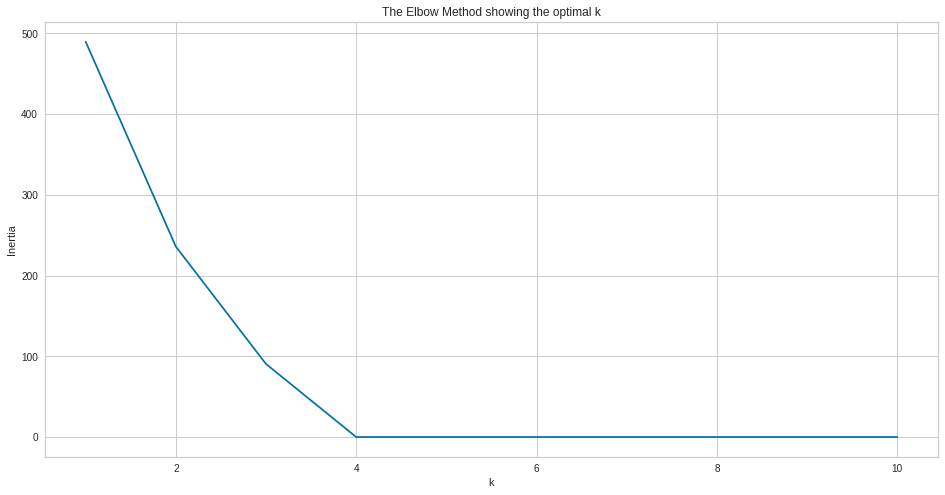

In [ ]:
#clustering

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(data_cluster[numeric])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.7841075712674043
For k=3, the average silhouette score is 0.6401482815934405
For k=4, the average silhouette score is 0.6462580479169026
For k=5, the average silhouette score is 0.634134545869726
For k=6, the average silhouette score is 0.6452866733631227
For k=7, the average silhouette score is 0.6432400712236634
For k=8, the average silhouette score is 0.6462454237527515
For k=9, the average silhouette score is 0.6518784475930302
For k=10, the average silhouette score is 0.6584171380615853


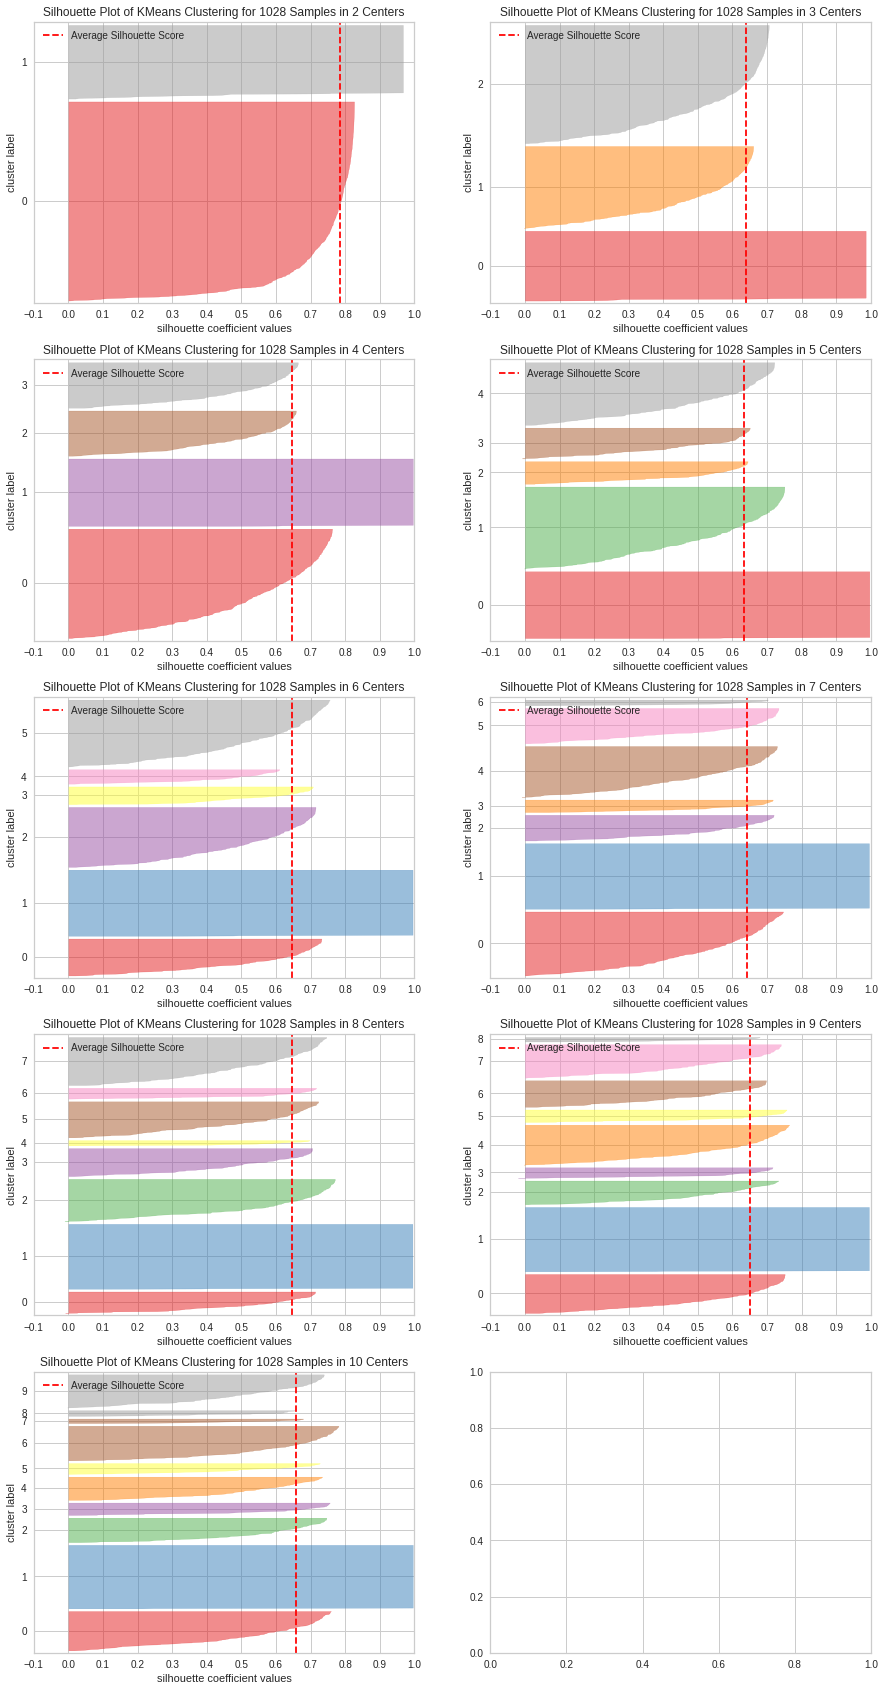

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(data_cluster)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
#we pick 4 cluster based on above (lowest cluster number with all cluster value are more than average sillhouette score and relative similar thickness for each cluster)
cluster_model = cluster.KMeans(n_clusters=4,random_state = 42)
cluster_model.fit(data_cluster[numeric])
cluster_label = cluster_model.labels_
data_cluster['cluster'] = cluster_label
data_cluster['CustomerId'] = customer_master
data_cluster

<ipython-input-209-51848420ca8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = cluster_label
<ipython-input-209-51848420ca8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['CustomerId'] = customer_master


Balance  IsActiveMember  Gender_category  cluster CustomerId
5    113755.00            0.00             0.00        2   15574012
16   132602.00            0.00             0.00        2   15737452
35   134264.00            0.00             1.00        0   15794171
41   122522.00            0.00             1.00        0   15738148
43   131394.00            0.00             1.00        0   15755196
...        ...             ...              ...      ...        ...
9956  85216.00            0.00             1.00        0   15707861
9962      0.00            0.00             0.00        2   15594612
9975 113957.00            0.00             0.00        2   15666295
9982 137145.00            0.00             1.00        0   15768163
9991  88381.00            0.00             1.00        0   15769959

[1028 rows x 5 columns]

In [ ]:
# Re-look the data after clustering with k=4
data_cluster.groupby('cluster')['IsActiveMember','Gender_category',].agg(['count', 'mean', 'max','min','sum'])

<ipython-input-210-efb4440f5ce4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_cluster.groupby('cluster')['IsActiveMember','Gender_category',].agg(['count', 'mean', 'max','min','sum'])


IsActiveMember                       Gender_category                 \
                 count mean  max  min    sum           count mean  max  min   
cluster                                                                       
0                  366 0.00 0.00 0.00   0.00             366 1.00 1.00 1.00   
1                  205 1.00 1.00 1.00 205.00             205 1.00 1.00 1.00   
2                  295 0.00 0.00 0.00   0.00             295 0.00 0.00 0.00   
3                  162 1.00 1.00 1.00 162.00             162 0.00 0.00 0.00   

                
           sum  
cluster         
0       366.00  
1       205.00  
2         0.00  
3         0.00

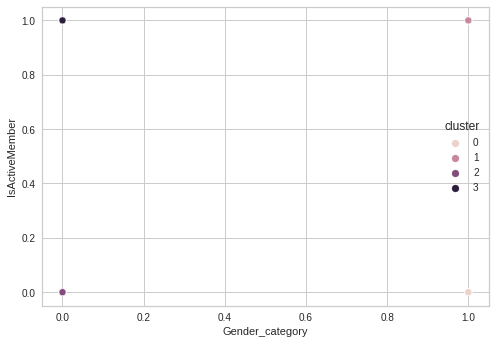

In [ ]:
# Re-look into data after clustering with k=4
scatter_plot = sns.scatterplot(x = 'Gender_category', y = 'IsActiveMember', data=data_cluster, hue='cluster')
fig = scatter_plot.get_figure()
# fig.savefig("kmeans2.png") 

In [ ]:
data_cluster['gender_activation'] = data_cluster['Gender_category'].astype(str) +"-"+ data_cluster['IsActiveMember'].astype(str)
data_cluster

<ipython-input-212-4f1c6eb4736b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['gender_activation'] = data_cluster['Gender_category'].astype(str) +"-"+ data_cluster['IsActiveMember'].astype(str)


Balance  IsActiveMember  Gender_category  cluster CustomerId  \
5    113755.00            0.00             0.00        2   15574012   
16   132602.00            0.00             0.00        2   15737452   
35   134264.00            0.00             1.00        0   15794171   
41   122522.00            0.00             1.00        0   15738148   
43   131394.00            0.00             1.00        0   15755196   
...        ...             ...              ...      ...        ...   
9956  85216.00            0.00             1.00        0   15707861   
9962      0.00            0.00             0.00        2   15594612   
9975 113957.00            0.00             0.00        2   15666295   
9982 137145.00            0.00             1.00        0   15768163   
9991  88381.00            0.00             1.00        0   15769959   

     gender_activation  
5              0.0-0.0  
16             0.0-0.0  
35             1.0-0.0  
41             1.0-0.0  
43             1.0-0.0  
...                ...  
9956           1.0-0.0  
9962           0.0-0.0  
9975           0.0-0.0  
9982           1.0-0.0  
9991           1.0-0.0  

[1028 rows x 6 columns]

In [ ]:
bygender_balance = data_cluster.groupby(['gender_activation'])['Balance'].sum().reset_index()
bygender_balance

gender_activation     Balance
0           0.0-0.0 27919042.00
1           0.0-1.0 14769766.00
2           1.0-0.0 31327485.00
3           1.0-1.0 18709107.00

In [ ]:
bygender = data_cluster.groupby(['gender_activation'])['CustomerId'].nunique().reset_index()
bygender

gender_activation  CustomerId
0           0.0-0.0         295
1           0.0-1.0         162
2           1.0-0.0         366
3           1.0-1.0         205

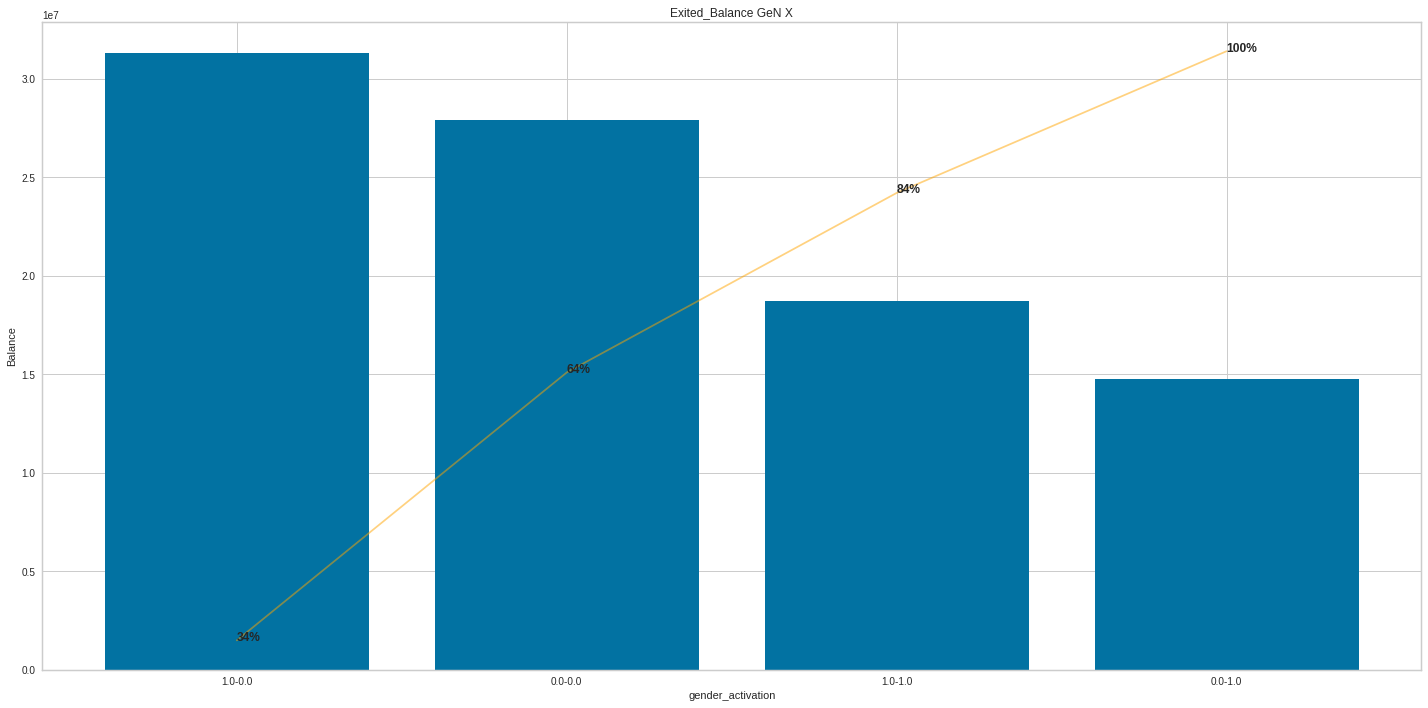

In [ ]:
def pareto_plot(bygender_balance, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = bygender_balance.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(bygender_balance, x='gender_activation', y='Balance', title='Exited_Balance GeN X')

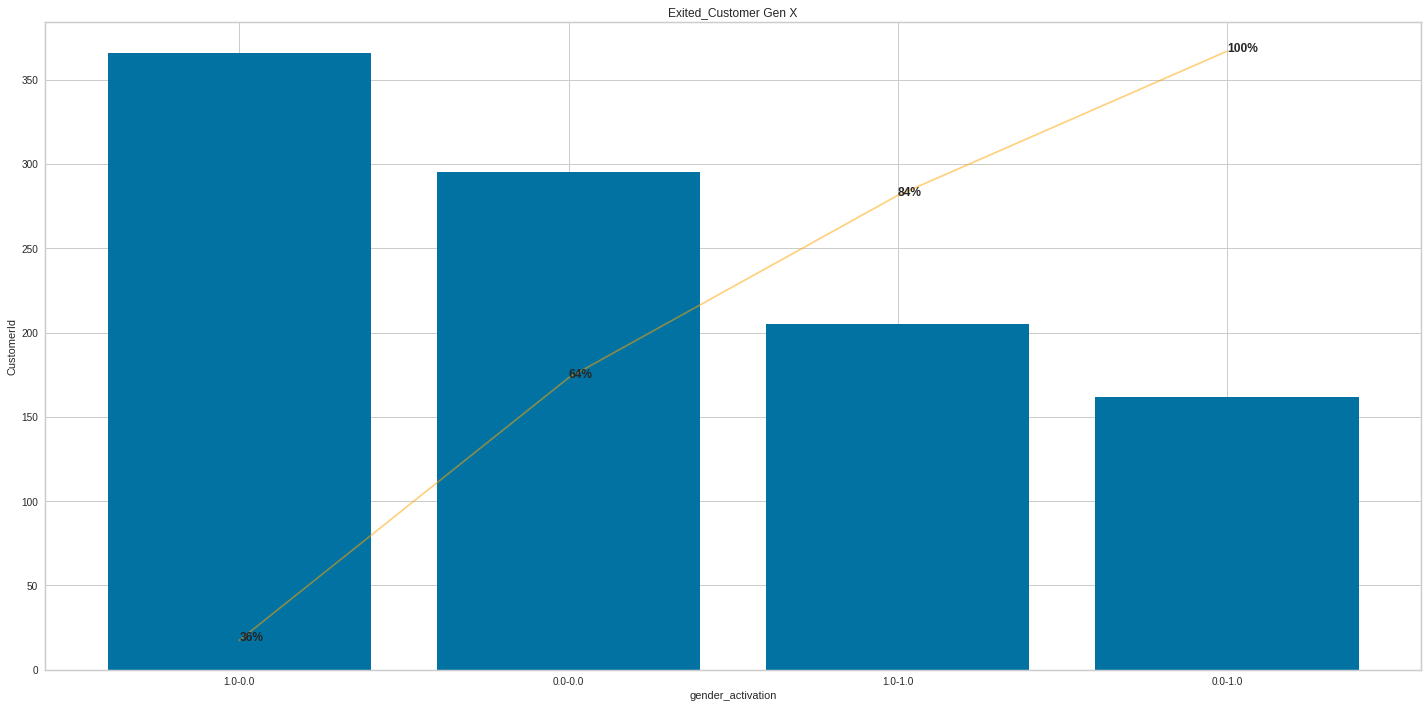

In [ ]:
def pareto_plot(bygender_balance, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = bygender_balance.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, 'orange', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


pareto_plot(bygender, x='gender_activation', y='CustomerId', title='Exited_Customer Gen X')

## Clustering Gen-X exited by all independen *var*

In [ ]:
df_cluster_exited_GenX = df1[(df1['Exited']==1) & (df1['Age_group']=='Gen X')] 
df_cluster_exited_GenX

CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
5      15574012          Chu          645     Spain    Male   44       8   
16     15737452        Romeo          653   Germany    Male   58       1   
35     15794171     Lombardo          475    France  Female   45       0   
41     15738148       Clarke          465    France  Female   51       8   
43     15755196       Lavine          834    France  Female   49       2   
...         ...          ...          ...       ...     ...  ...     ...   
9956   15707861        Nucci          520    France  Female   46      10   
9962   15594612        Flynn          702     Spain    Male   44       9   
9975   15666295        Smith          610   Germany    Male   50       1   
9982   15768163      Griffin          655   Germany  Female   46       7   
9991   15769959  Ajuluchukwu          597    France  Female   53       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
5      113755              2          1               0           149756   
16     132602              1          1               0             5097   
35     134264              1          1               0            27822   
41     122522              1          0               0           181297   
43     131394              1          0               0           194365   
...       ...            ...        ...             ...              ...   
9956    85216              1          1               0           117369   
9962        0              1          0               0            59207   
9975   113957              2          1               0           196526   
9982   137145              1          1               0           115146   
9991    88381              1          1               0            69384   

      Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  
5          1     Gen X           Poor         Level 3                    Good  
16         1     Gen X           Fair         Level 3                     NaN  
35         1     Gen X      Very Poor         Level 3                    Poor  
41         1     Gen X      Very Poor         Level 3               Excellent  
43         1     Gen X      Excellent         Level 3                     NaN  
...      ...       ...            ...             ...                     ...  
9956       1     Gen X      Very Poor         Level 2                    Good  
9962       1     Gen X           Good         Level 1                    Fair  
9975       1     Gen X           Poor         Level 3                     NaN  
9982       1     Gen X           Fair         Level 3                    Good  
9991       1     Gen X           Poor         Level 2                    Fair  

[1028 rows x 17 columns]

In [ ]:
# cat.code geography
# 0 France, 1 Germany, Spain 2
df_cluster_exited_GenX['Geography'] = df_cluster_exited_GenX['Geography'].astype('category')
df_cluster_exited_GenX['Geography'] = df_cluster_exited_GenX['Geography'].cat.set_categories(['France', 'Germany', 'Spain'])
df_cluster_exited_GenX['Geography_category'] = df_cluster_exited_GenX['Geography'].cat.codes

# cat.code gender
# 0 Male, 1 Female
df_cluster_exited_GenX['Gender'] = df_cluster_exited_GenX['Gender'].astype('category')
df_cluster_exited_GenX['Gender'] = df_cluster_exited_GenX['Gender'].cat.set_categories(['Male', 'Female'])
df_cluster_exited_GenX['Gender_category'] = df_cluster_exited_GenX['Gender'].cat.codes
df_cluster_exited_GenX


<ipython-input-218-f6a54d186f62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_exited_GenX['Geography'] = df_cluster_exited_GenX['Geography'].astype('category')
<ipython-input-218-f6a54d186f62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_exited_GenX['Geography'] = df_cluster_exited_GenX['Geography'].cat.set_categories(['France', 'Germany', 'Spain'])
<ipython-input-218-f6a54d186f62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
5      15574012          Chu          645     Spain    Male   44       8   
16     15737452        Romeo          653   Germany    Male   58       1   
35     15794171     Lombardo          475    France  Female   45       0   
41     15738148       Clarke          465    France  Female   51       8   
43     15755196       Lavine          834    France  Female   49       2   
...         ...          ...          ...       ...     ...  ...     ...   
9956   15707861        Nucci          520    France  Female   46      10   
9962   15594612        Flynn          702     Spain    Male   44       9   
9975   15666295        Smith          610   Germany    Male   50       1   
9982   15768163      Griffin          655   Germany  Female   46       7   
9991   15769959  Ajuluchukwu          597    France  Female   53       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
5      113755              2          1               0           149756   
16     132602              1          1               0             5097   
35     134264              1          1               0            27822   
41     122522              1          0               0           181297   
43     131394              1          0               0           194365   
...       ...            ...        ...             ...              ...   
9956    85216              1          1               0           117369   
9962        0              1          0               0            59207   
9975   113957              2          1               0           196526   
9982   137145              1          1               0           115146   
9991    88381              1          1               0            69384   

      Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  \
5          1     Gen X           Poor         Level 3                    Good   
16         1     Gen X           Fair         Level 3                     NaN   
35         1     Gen X      Very Poor         Level 3                    Poor   
41         1     Gen X      Very Poor         Level 3               Excellent   
43         1     Gen X      Excellent         Level 3                     NaN   
...      ...       ...            ...             ...                     ...   
9956       1     Gen X      Very Poor         Level 2                    Good   
9962       1     Gen X           Good         Level 1                    Fair   
9975       1     Gen X           Poor         Level 3                     NaN   
9982       1     Gen X           Fair         Level 3                    Good   
9991       1     Gen X           Poor         Level 2                    Fair   

      Geography_category  Gender_category  
5                      2                0  
16                     1                0  
35                     0                1  
41                     0                1  
43                     0                1  
...                  ...              ...  
9956                   0                1  
9962                   2                0  
9975                   1                0  
9982                   1                1  
9991                   0                1  

[1028 rows x 19 columns]

In [ ]:
df_cluster_exited_GenX.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Age_group', 'CreditCategory',
       'Balancecategory', 'EstimatedSalarycategory', 'Geography_category',
       'Gender_category'],
      dtype='object')

In [ ]:
customer_master = df_cluster_exited_GenX['CustomerId'] 
df_cluster_exited_GenX.drop(columns=['CustomerId', 'Surname','Gender','Geography','Age','Exited', 'Age_group', 'CreditCategory',
       'Balancecategory', 'EstimatedSalarycategory'], inplace=True)
df_cluster_exited_GenX

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CreditScore  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
5             645       8   113755              2          1               0   
16            653       1   132602              1          1               0   
35            475       0   134264              1          1               0   
41            465       8   122522              1          0               0   
43            834       2   131394              1          0               0   
...           ...     ...      ...            ...        ...             ...   
9956          520      10    85216              1          1               0   
9962          702       9        0              1          0               0   
9975          610       1   113957              2          1               0   
9982          655       7   137145              1          1               0   
9991          597       4    88381              1          1               0   

      EstimatedSalary  Geography_category  Gender_category  
5              149756                   2                0  
16               5097                   1                0  
35              27822                   0                1  
41             181297                   0                1  
43             194365                   0                1  
...               ...                 ...              ...  
9956           117369                   0                1  
9962            59207                   2                0  
9975           196526                   1                0  
9982           115146                   1                1  
9991            69384                   0                1  

[1028 rows x 9 columns]

In [ ]:
columns_list = df_cluster_exited_GenX.columns

scaler = MinMaxScaler() #Transform data by scaler
df_cluster_exited_GenX[columns_list] = scaler.fit_transform(df_cluster_exited_GenX[columns_list])
df_cluster_exited_GenX

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


CreditScore  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
5            0.59    0.80     0.48           0.33       1.00            0.00   
16           0.61    0.10     0.56           0.00       1.00            0.00   
35           0.25    0.00     0.56           0.00       1.00            0.00   
41           0.23    0.80     0.51           0.00       0.00            0.00   
43           0.97    0.20     0.55           0.00       0.00            0.00   
...           ...     ...      ...            ...        ...             ...   
9956         0.34    1.00     0.36           0.00       1.00            0.00   
9962         0.70    0.90     0.00           0.00       0.00            0.00   
9975         0.52    0.10     0.48           0.33       1.00            0.00   
9982         0.61    0.70     0.58           0.00       1.00            0.00   
9991         0.49    0.40     0.37           0.00       1.00            0.00   

      EstimatedSalary  Geography_category  Gender_category  
5                0.75                1.00             0.00  
16               0.03                0.50             0.00  
35               0.14                0.00             1.00  
41               0.91                0.00             1.00  
43               0.97                0.00             1.00  
...               ...                 ...              ...  
9956             0.59                0.00             1.00  
9962             0.30                1.00             0.00  
9975             0.99                0.50             0.00  
9982             0.58                0.50             1.00  
9991             0.35                0.00             1.00  

[1028 rows x 9 columns]

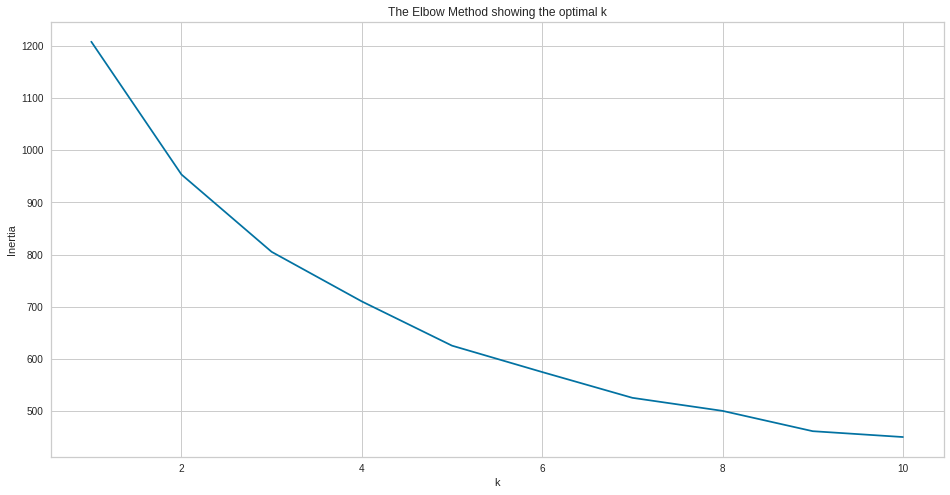

In [ ]:
#clustering

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster_exited_GenX)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.21292624793646314
For k=3, the average silhouette score is 0.21480589111848492
For k=4, the average silhouette score is 0.22512277163719666
For k=5, the average silhouette score is 0.2535075300358692
For k=6, the average silhouette score is 0.27212670484224344
For k=7, the average silhouette score is 0.2990647678130432
For k=8, the average silhouette score is 0.26132182133525755
For k=9, the average silhouette score is 0.29021704574307655
For k=10, the average silhouette score is 0.2592699249559423


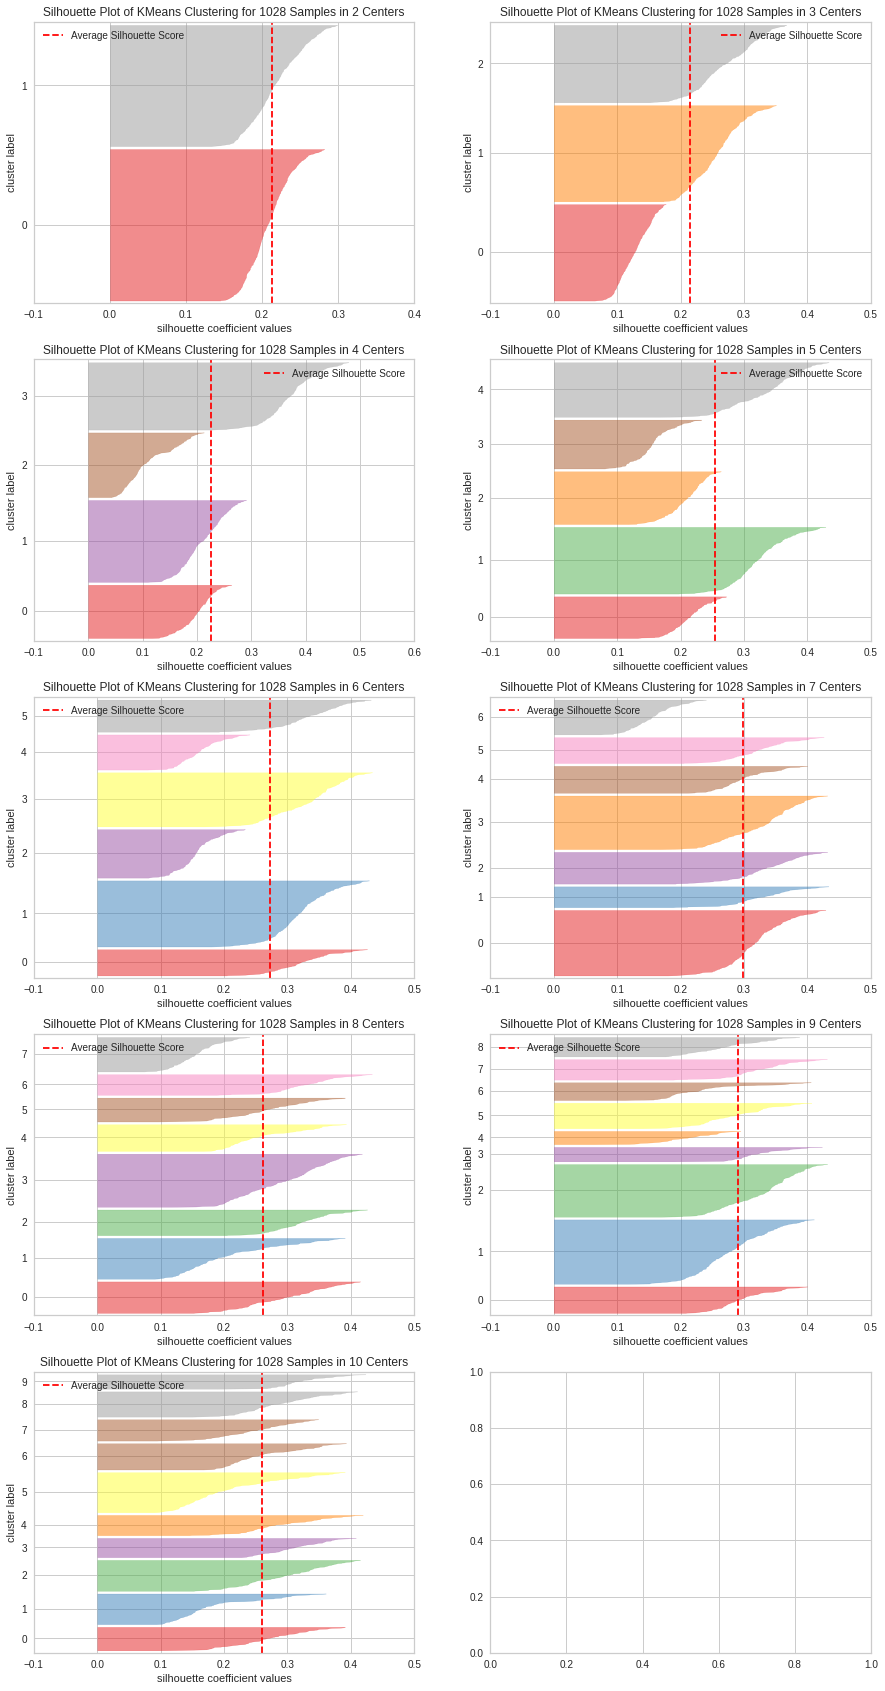

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster_exited_GenX)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
#we pick 4 cluster based on above (lowest cluster number with all cluster value are more than average sillhouette score and relative similar thickness for each cluster)
cluster_model = cluster.KMeans(n_clusters=4, random_state=123)
cluster_model.fit(df_cluster_exited_GenX)
cluster_label = cluster_model.labels_
df_cluster_exited_GenX['cluster'] = cluster_label
df_cluster_exited_GenX[columns_list] = scaler.inverse_transform(df_cluster_exited_GenX[columns_list])
df_cluster_exited_GenX['CustomerId'] = customer_master
df_cluster_exited_GenX

<ipython-input-224-ec4bac7f4d4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_exited_GenX['cluster'] = cluster_label
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
<ipython-input-224-ec4bac7f4d4f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

CreditScore  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
5          645.00    8.00 113755.00           2.00       1.00            0.00   
16         653.00    1.00 132602.00           1.00       1.00            0.00   
35         475.00    0.00 134264.00           1.00       1.00            0.00   
41         465.00    8.00 122522.00           1.00       0.00            0.00   
43         834.00    2.00 131394.00           1.00       0.00            0.00   
...           ...     ...       ...            ...        ...             ...   
9956       520.00   10.00  85216.00           1.00       1.00            0.00   
9962       702.00    9.00      0.00           1.00       0.00            0.00   
9975       610.00    1.00 113957.00           2.00       1.00            0.00   
9982       655.00    7.00 137145.00           1.00       1.00            0.00   
9991       597.00    4.00  88381.00           1.00       1.00            0.00   

      EstimatedSalary  Geography_category  Gender_category  cluster CustomerId  
5           149756.00                2.00             0.00        0   15574012  
16            5097.00                1.00             0.00        0   15737452  
35           27822.00                0.00             1.00        1   15794171  
41          181297.00                0.00             1.00        2   15738148  
43          194365.00                0.00             1.00        2   15755196  
...               ...                 ...              ...      ...        ...  
9956        117369.00                0.00             1.00        1   15707861  
9962         59207.00                2.00             0.00        0   15594612  
9975        196526.00                1.00             0.00        0   15666295  
9982        115146.00                1.00             1.00        1   15768163  
9991         69384.00                0.00             1.00        1   15769959  

[1028 rows x 11 columns]

In [ ]:
# Re-look the data after clustering with k=4
df_cluster_exited_GenX.groupby(['cluster','NumOfProducts']).agg('nunique')['CustomerId']


cluster  NumOfProducts
0        1.00             228
         2.00              37
         3.00              22
         4.00               8
1        1.00             184
         2.00              36
         3.00              29
         4.00              10
2        1.00             167
         2.00              42
         3.00              28
         4.00               8
3        1.00             149
         2.00              43
         3.00              28
         4.00               9
Name: CustomerId, dtype: int64

In [ ]:
# Re-look the data after clustering with k=4
df_cluster_exited_GenX.groupby(['cluster','HasCrCard']).agg('nunique')['CustomerId']

cluster  HasCrCard
0        0.00          83
         1.00         212
1        1.00         259
2        0.00         245
3        1.00         229
Name: CustomerId, dtype: int64

In [ ]:
# Re-look the data after clustering with k=4
df_cluster_exited_GenX.groupby(['cluster','IsActiveMember']).agg('nunique')['CustomerId']

cluster  IsActiveMember
0        0.00              295
1        0.00              259
2        0.00              107
         1.00              138
3        1.00              229
Name: CustomerId, dtype: int64

In [ ]:
# Re-look the data after clustering with k=4
df_cluster_exited_GenX.groupby(['cluster','Gender_category','Geography_category']).agg('nunique')['CustomerId']

cluster  Gender_category  Geography_category
0        0.00             0.00                  116
                          1.00                  122
                          2.00                   57
1        1.00             0.00                   96
                          1.00                  107
                          2.00                   56
2        0.00             0.00                   22
                          1.00                   22
                          2.00                   15
         1.00             0.00                   70
                          1.00                   77
                          2.00                   39
3        0.00             0.00                   39
                          1.00                   46
                          2.00                   18
         1.00             0.00                   54
                          1.00                   52
                          2.00                   20
Name: CustomerId, d

In [ ]:
# Re-look the data after clustering with k=4
df_cluster_exited_GenX.groupby('cluster')['CreditScore','Balance','Tenure','EstimatedSalary'].agg(['mean', 'max','min'])

<ipython-input-229-b35816142fc9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cluster_exited_GenX.groupby('cluster')['CreditScore','Balance','Tenure','EstimatedSalary'].agg(['mean', 'max','min'])


CreditScore                Balance                Tenure             \
               mean    max    min     mean       max  min   mean   max  min   
cluster                                                                       
0            642.43 850.00 399.00 94640.82 201696.00 0.00   4.98 10.00 0.00   
1            639.40 850.00 351.00 86572.08 213146.00 0.00   4.89 10.00 0.00   
2            646.40 850.00 383.00 87077.44 238387.00 0.00   4.82 10.00 0.00   
3            649.21 850.00 350.00 91922.34 209767.00 0.00   4.72 10.00 0.00   

        EstimatedSalary                    
                   mean       max     min  
cluster                                    
0             100935.39 199290.00  123.00  
1             103540.46 199378.00 2919.00  
2             107475.10 199273.00  548.00  
3              98028.54 198402.00   11.00

# Logistics Regression Dropping some Variable based on clustering result

In [ ]:
df_regression_alt

CreditScore  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
4            1.00    0.20     0.53           0.00       1.00            1.00   
5            0.59    0.80     0.48           0.33       1.00            0.00   
6            0.94    0.70     0.00           0.33       1.00            1.00   
8            0.30    0.40     0.60           0.33       0.00            1.00   
15           0.53    0.30     0.60           0.33       0.00            1.00   
...           ...     ...      ...            ...        ...             ...   
9975         0.52    0.10     0.48           0.33       1.00            0.00   
9979         0.65    0.10     0.38           0.00       0.00            1.00   
9982         0.61    0.70     0.58           0.00       1.00            0.00   
9986         0.65    0.10     0.77           0.33       0.00            1.00   
9991         0.49    0.40     0.37           0.00       1.00            0.00   

      EstimatedSalary  Exited  Geography_category  Gender_category  
4                0.40       0                1.00             1.00  
5                0.75       1                1.00             0.00  
6                0.05       0                0.00             0.00  
8                0.38       0                0.00             0.00  
15               0.32       0                0.50             0.00  
...               ...     ...                 ...              ...  
9975             0.98       1                0.50             0.00  
9979             0.01       0                0.00             1.00  
9982             0.58       1                0.50             1.00  
9986             0.17       0                0.50             0.00  
9991             0.35       1                0.00             1.00  

[2306 rows x 10 columns]

In [ ]:
df_regression_alt.columns

Index(['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_category',
       'Gender_category'],
      dtype='object')

In [ ]:
df_regression_alt.drop(columns=['CreditScore','Tenure', 'Balance','EstimatedSalary','Geography_category'], inplace=True)
df_regression_alt

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


NumOfProducts  HasCrCard  IsActiveMember  Exited  Gender_category
4              0.00       1.00            1.00       0             1.00
5              0.33       1.00            0.00       1             0.00
6              0.33       1.00            1.00       0             0.00
8              0.33       0.00            1.00       0             0.00
15             0.33       0.00            1.00       0             0.00
...             ...        ...             ...     ...              ...
9975           0.33       1.00            0.00       1             0.00
9979           0.00       0.00            1.00       0             1.00
9982           0.00       1.00            0.00       1             1.00
9986           0.33       0.00            1.00       0             0.00
9991           0.00       1.00            0.00       1             1.00

[2306 rows x 5 columns]

In [ ]:
columns_list = [ 'NumOfProducts', 'HasCrCard','IsActiveMember','Gender_category']

scaler = MinMaxScaler() #Transform data by scaler
df_regression_alt[columns_list] = scaler.fit_transform(df_regression_alt[columns_list])
df_regression_alt

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


NumOfProducts  HasCrCard  IsActiveMember  Exited  Gender_category
4              0.00       1.00            1.00       0             1.00
5              0.33       1.00            0.00       1             0.00
6              0.33       1.00            1.00       0             0.00
8              0.33       0.00            1.00       0             0.00
15             0.33       0.00            1.00       0             0.00
...             ...        ...             ...     ...              ...
9975           0.33       1.00            0.00       1             0.00
9979           0.00       0.00            1.00       0             1.00
9982           0.00       1.00            0.00       1             1.00
9986           0.33       0.00            1.00       0             0.00
9991           0.00       1.00            0.00       1             1.00

[2306 rows x 5 columns]

<ipython-input-250-60fce6fde1b8>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_regression_alt[columns_list].corr(), dtype=np.bool))


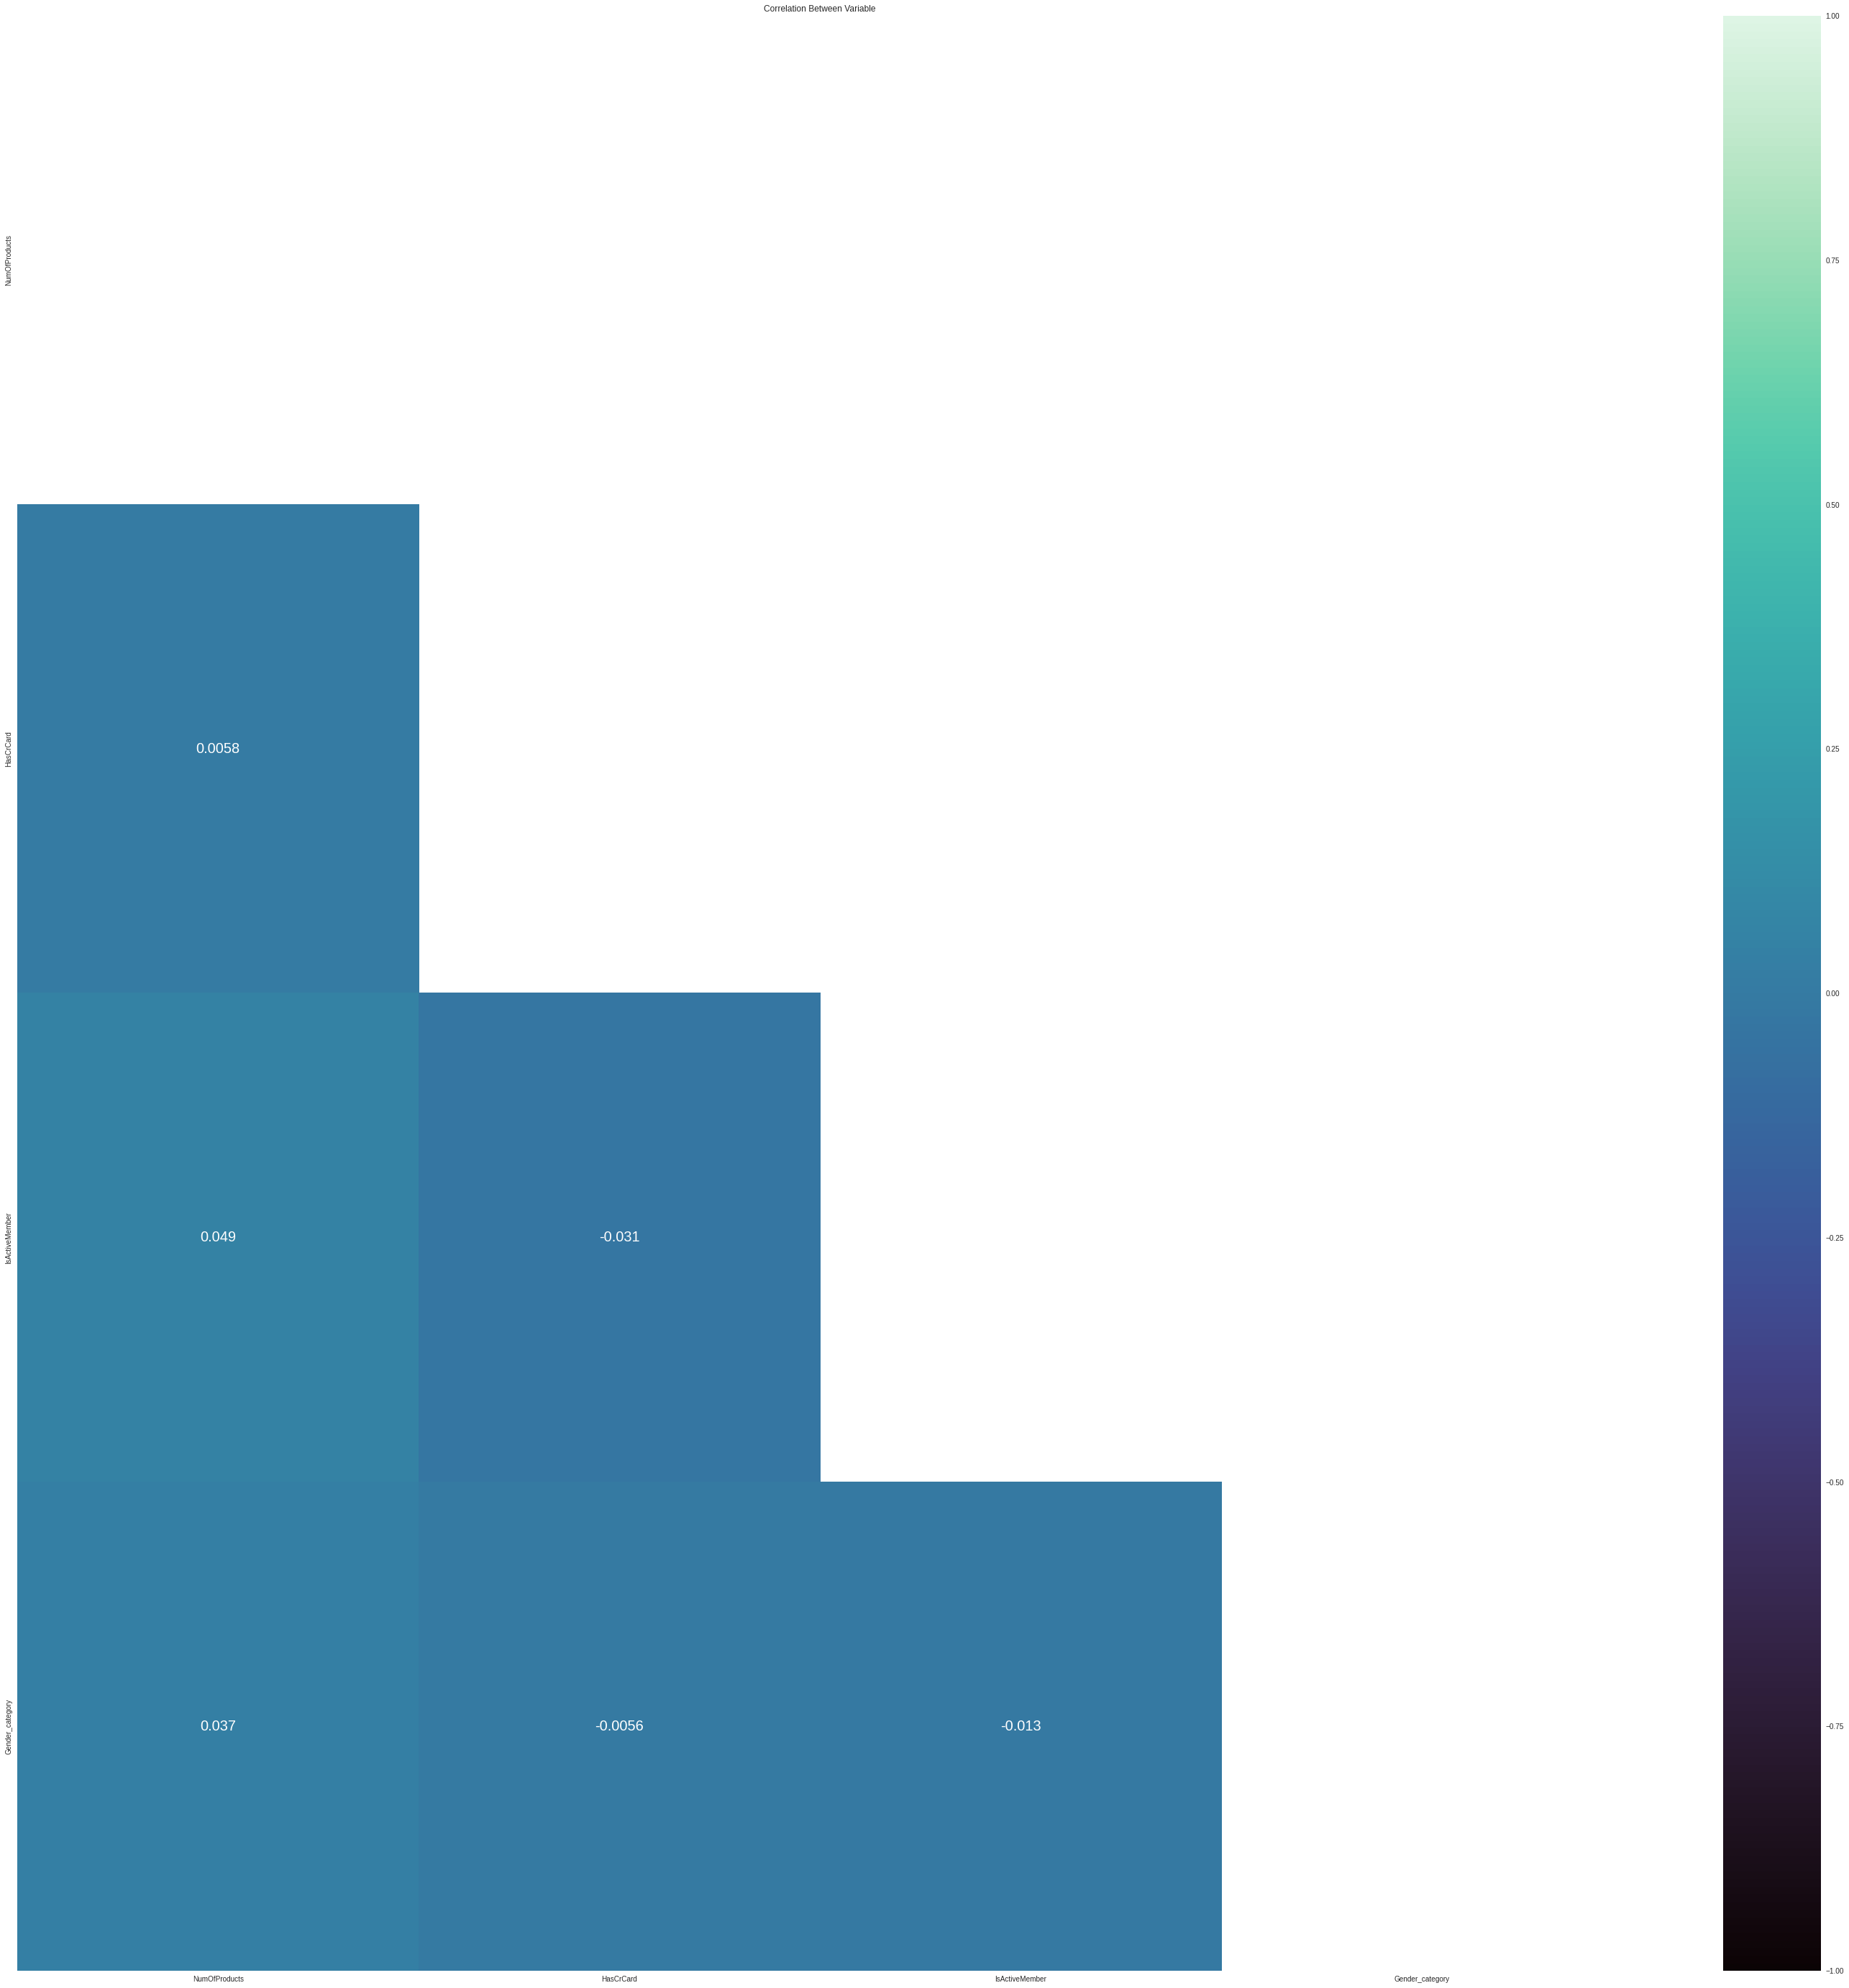

In [ ]:
fig = plt.figure(figsize=(50,50))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(df_regression_alt[columns_list].corr(), dtype=np.bool))

sns.heatmap(df_regression_alt[columns_list].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":20})

plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = df_regression_alt.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any( (upper[column] > 0.7) )]
to_drop

<ipython-input-251-d1d564dfc043>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


[]

In [ ]:
# Define the whole data
x = df_regression_alt[columns_list]
y = df_regression_alt['Exited']

# Split into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123)

In [ ]:
# Check split result
for for_regression in [x_train, x_test, y_train, y_test]:
  print(for_regression.shape)

(1844, 4)
(462, 4)
(1844,)
(462,)


In [ ]:
# Check class balance in each datasets
for for_regression in [y_train,y_test]:
  check_balance = for_regression.value_counts()
  print(check_balance)

0    1028
1     816
Name: Exited, dtype: int64
0    250
1    212
Name: Exited, dtype: int64


In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
model.score(x_train, y_train)

0.6285249457700651

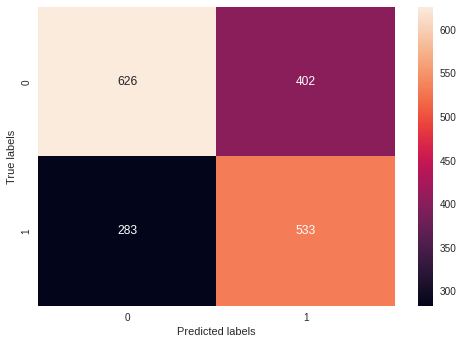

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_train, model.predict(x_train)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
model.score(x_test, y_test)

0.5909090909090909

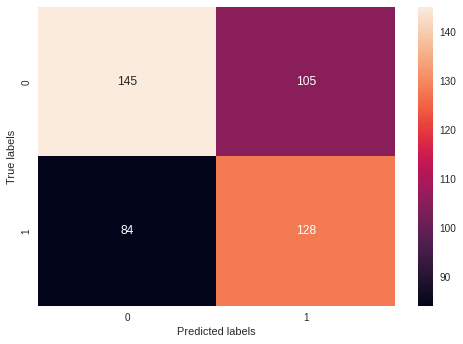

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.645426
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 1844
Model:                          Logit   Df Residuals:                     1839
Method:                           MLE   Df Model:                            4
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                 0.05986
Time:                        06:21:34   Log-Likelihood:                -1190.2
converged:                       True   LL-Null:                       -1265.9
Covariance Type:            nonrobust   LLR p-value:                 9.382e-32
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1707      0.115      1.485      0.138      -0.055       0.396
NumOfProducts 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
np.exp([0.4656,-1.0756,-0.1017,-0.2919])

array([1.59296968, 0.34109304, 0.9033005 , 0.74684322])

Churn Interpretation based on Logistics Regression Model
*   Female has 59% higher probability to churn compared to male 
*   Being active member will lower probability to churn by 66%
*   Has CrCard will lower probability to churn by 10%
*   For each additonal number of product will lower probablity to churn by 25%



# Logistics Regression with Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


In [ ]:
df_regression_alt2 = df1[df1['Age_group']=='Gen X'] 
df_regression_alt2 

CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
4      15737888     Mitchell          850     Spain  Female   43       2   
5      15574012          Chu          645     Spain    Male   44       8   
6      15592531     Bartlett          822    France    Male   50       7   
8      15792365           He          501    France    Male   44       4   
15     15643966      Goforth          616   Germany    Male   45       3   
...         ...          ...          ...       ...     ...  ...     ...   
9975   15666295        Smith          610   Germany    Male   50       1   
9979   15692664       Diribe          677    France  Female   58       1   
9982   15768163      Griffin          655   Germany  Female   46       7   
9986   15581736     Bartlett          673   Germany    Male   47       1   
9991   15769959  Ajuluchukwu          597    France  Female   53       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
4      125510              1          1               1            79084   
5      113755              2          1               0           149756   
6           0              2          1               1            10062   
8      142051              2          0               1            74940   
15     143129              2          0               1            64327   
...       ...            ...        ...             ...              ...   
9975   113957              2          1               0           196526   
9979    90022              1          0               1             2988   
9982   137145              1          1               0           115146   
9986   183579              2          0               1            34047   
9991    88381              1          1               0            69384   

      Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  
4          0     Gen X      Excellent         Level 3                    Fair  
5          1     Gen X           Poor         Level 3                    Good  
6          0     Gen X      Excellent         Level 1               Very Poor  
8          0     Gen X      Very Poor         Level 3                    Fair  
15         0     Gen X           Poor         Level 3                    Fair  
...      ...       ...            ...             ...                     ...  
9975       1     Gen X           Poor         Level 3                     NaN  
9979       0     Gen X           Fair         Level 2                     NaN  
9982       1     Gen X           Fair         Level 3                    Good  
9986       0     Gen X           Fair         Level 4                    Poor  
9991       1     Gen X           Poor         Level 2                    Fair  

[2306 rows x 17 columns]

In [ ]:
# cat.code geography
# 0 France, 1 Germany, Spain 2
df_regression_alt2['Geography'] = df_regression_alt2['Geography'].astype('category')
df_regression_alt2['Geography'] = df_regression_alt2['Geography'].cat.set_categories(['France', 'Germany', 'Spain'])
df_regression_alt2['Geography_category'] = df_regression_alt2['Geography'].cat.codes

# cat.code gender
# 0 Male, 1 Female
df_regression_alt2['Gender'] = df_regression_alt2['Gender'].astype('category')
df_regression_alt2['Gender'] = df_regression_alt2['Gender'].cat.set_categories(['Male', 'Female'])
df_regression_alt2['Gender_category'] = df_regression_alt2['Gender'].cat.codes

df_regression_alt2

<ipython-input-264-f5a93a984bfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression_alt2['Geography'] = df_regression_alt2['Geography'].astype('category')
<ipython-input-264-f5a93a984bfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regression_alt2['Geography'] = df_regression_alt2['Geography'].cat.set_categories(['France', 'Germany', 'Spain'])
<ipython-input-264-f5a93a984bfd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
4      15737888     Mitchell          850     Spain  Female   43       2   
5      15574012          Chu          645     Spain    Male   44       8   
6      15592531     Bartlett          822    France    Male   50       7   
8      15792365           He          501    France    Male   44       4   
15     15643966      Goforth          616   Germany    Male   45       3   
...         ...          ...          ...       ...     ...  ...     ...   
9975   15666295        Smith          610   Germany    Male   50       1   
9979   15692664       Diribe          677    France  Female   58       1   
9982   15768163      Griffin          655   Germany  Female   46       7   
9986   15581736     Bartlett          673   Germany    Male   47       1   
9991   15769959  Ajuluchukwu          597    France  Female   53       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
4      125510              1          1               1            79084   
5      113755              2          1               0           149756   
6           0              2          1               1            10062   
8      142051              2          0               1            74940   
15     143129              2          0               1            64327   
...       ...            ...        ...             ...              ...   
9975   113957              2          1               0           196526   
9979    90022              1          0               1             2988   
9982   137145              1          1               0           115146   
9986   183579              2          0               1            34047   
9991    88381              1          1               0            69384   

      Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  \
4          0     Gen X      Excellent         Level 3                    Fair   
5          1     Gen X           Poor         Level 3                    Good   
6          0     Gen X      Excellent         Level 1               Very Poor   
8          0     Gen X      Very Poor         Level 3                    Fair   
15         0     Gen X           Poor         Level 3                    Fair   
...      ...       ...            ...             ...                     ...   
9975       1     Gen X           Poor         Level 3                     NaN   
9979       0     Gen X           Fair         Level 2                     NaN   
9982       1     Gen X           Fair         Level 3                    Good   
9986       0     Gen X           Fair         Level 4                    Poor   
9991       1     Gen X           Poor         Level 2                    Fair   

      Geography_category  Gender_category  
4                      2                1  
5                      2                0  
6                      0                0  
8                      0                0  
15                     1                0  
...                  ...              ...  
9975                   1                0  
9979                   0                1  
9982                   1                1  
9986                   1                0  
9991                   0                1  

[2306 rows x 19 columns]

In [ ]:
df_regression_alt2.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Age_group', 'CreditCategory',
       'Balancecategory', 'EstimatedSalarycategory', 'Geography_category',
       'Gender_category'],
      dtype='object')

In [ ]:
df_regression_alt2.drop(columns=['CustomerId', 'Surname','Gender','Geography','Age_group', 'CreditCategory',
       'Balancecategory', 'EstimatedSalarycategory'], inplace=True)
df_regression_alt2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
4             850   43       2   125510              1          1   
5             645   44       8   113755              2          1   
6             822   50       7        0              2          1   
8             501   44       4   142051              2          0   
15            616   45       3   143129              2          0   
...           ...  ...     ...      ...            ...        ...   
9975          610   50       1   113957              2          1   
9979          677   58       1    90022              1          0   
9982          655   46       7   137145              1          1   
9986          673   47       1   183579              2          0   
9991          597   53       4    88381              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_category  \
4                  1            79084       0                   2   
5                  0           149756       1                   2   
6                  1            10062       0                   0   
8                  1            74940       0                   0   
15                 1            64327       0                   1   
...              ...              ...     ...                 ...   
9975               0           196526       1                   1   
9979               1             2988       0                   0   
9982               0           115146       1                   1   
9986               1            34047       0                   1   
9991               0            69384       1                   0   

      Gender_category  
4                   1  
5                   0  
6                   0  
8                   0  
15                  0  
...               ...  
9975                0  
9979                1  
9982                1  
9986                0  
9991                1  

[2306 rows x 11 columns]

In [ ]:
columns_list = [ 'CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_category','Gender_category']

scaler = MinMaxScaler() #Transform data by scaler
df_regression_alt2[columns_list] = scaler.fit_transform(df_regression_alt2[columns_list])
df_regression_alt2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
4            1.00 0.00    0.20     0.53           0.00       1.00   
5            0.59 0.07    0.80     0.48           0.33       1.00   
6            0.94 0.47    0.70     0.00           0.33       1.00   
8            0.30 0.07    0.40     0.60           0.33       0.00   
15           0.53 0.13    0.30     0.60           0.33       0.00   
...           ...  ...     ...      ...            ...        ...   
9975         0.52 0.47    0.10     0.48           0.33       1.00   
9979         0.65 1.00    0.10     0.38           0.00       0.00   
9982         0.61 0.20    0.70     0.58           0.00       1.00   
9986         0.65 0.27    0.10     0.77           0.33       0.00   
9991         0.49 0.67    0.40     0.37           0.00       1.00   

      IsActiveMember  EstimatedSalary  Exited  Geography_category  \
4               1.00             0.40       0                1.00   
5               0.00             0.75       1                1.00   
6               1.00             0.05       0                0.00   
8               1.00             0.38       0                0.00   
15              1.00             0.32       0                0.50   
...              ...              ...     ...                 ...   
9975            0.00             0.98       1                0.50   
9979            1.00             0.01       0                0.00   
9982            0.00             0.58       1                0.50   
9986            1.00             0.17       0                0.50   
9991            0.00             0.35       1                0.00   

      Gender_category  
4                1.00  
5                0.00  
6                0.00  
8                0.00  
15               0.00  
...               ...  
9975             0.00  
9979             1.00  
9982             1.00  
9986             0.00  
9991             1.00  

[2306 rows x 11 columns]

In [ ]:
x = df_regression_alt2[columns_list]
y = df_regression_alt2['Exited']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x, y)
print(model.feature_importances_)
# 'CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary', 'Geography_category','Gender_category']

[0.13068952 0.14562882 0.10395359 0.1404755  0.16994009 0.03571089
 0.0670406  0.12570747 0.05867726 0.02217628]


In [ ]:
df_regression_alt2.drop(columns=['HasCrCard','IsActiveMember','Geography_category','Gender_category'], inplace=True)
df_regression_alt2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


CreditScore  Age  Tenure  Balance  NumOfProducts  EstimatedSalary  \
4            1.00 0.00    0.20     0.53           0.00             0.40   
5            0.59 0.07    0.80     0.48           0.33             0.75   
6            0.94 0.47    0.70     0.00           0.33             0.05   
8            0.30 0.07    0.40     0.60           0.33             0.38   
15           0.53 0.13    0.30     0.60           0.33             0.32   
...           ...  ...     ...      ...            ...              ...   
9975         0.52 0.47    0.10     0.48           0.33             0.98   
9979         0.65 1.00    0.10     0.38           0.00             0.01   
9982         0.61 0.20    0.70     0.58           0.00             0.58   
9986         0.65 0.27    0.10     0.77           0.33             0.17   
9991         0.49 0.67    0.40     0.37           0.00             0.35   

      Exited  
4          0  
5          1  
6          0  
8          0  
15         0  
...      ...  
9975       1  
9979       0  
9982       1  
9986       0  
9991       1  

[2306 rows x 7 columns]

<ipython-input-271-8473d19bd10d>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_regression_alt2[columns_list].corr(), dtype=np.bool))


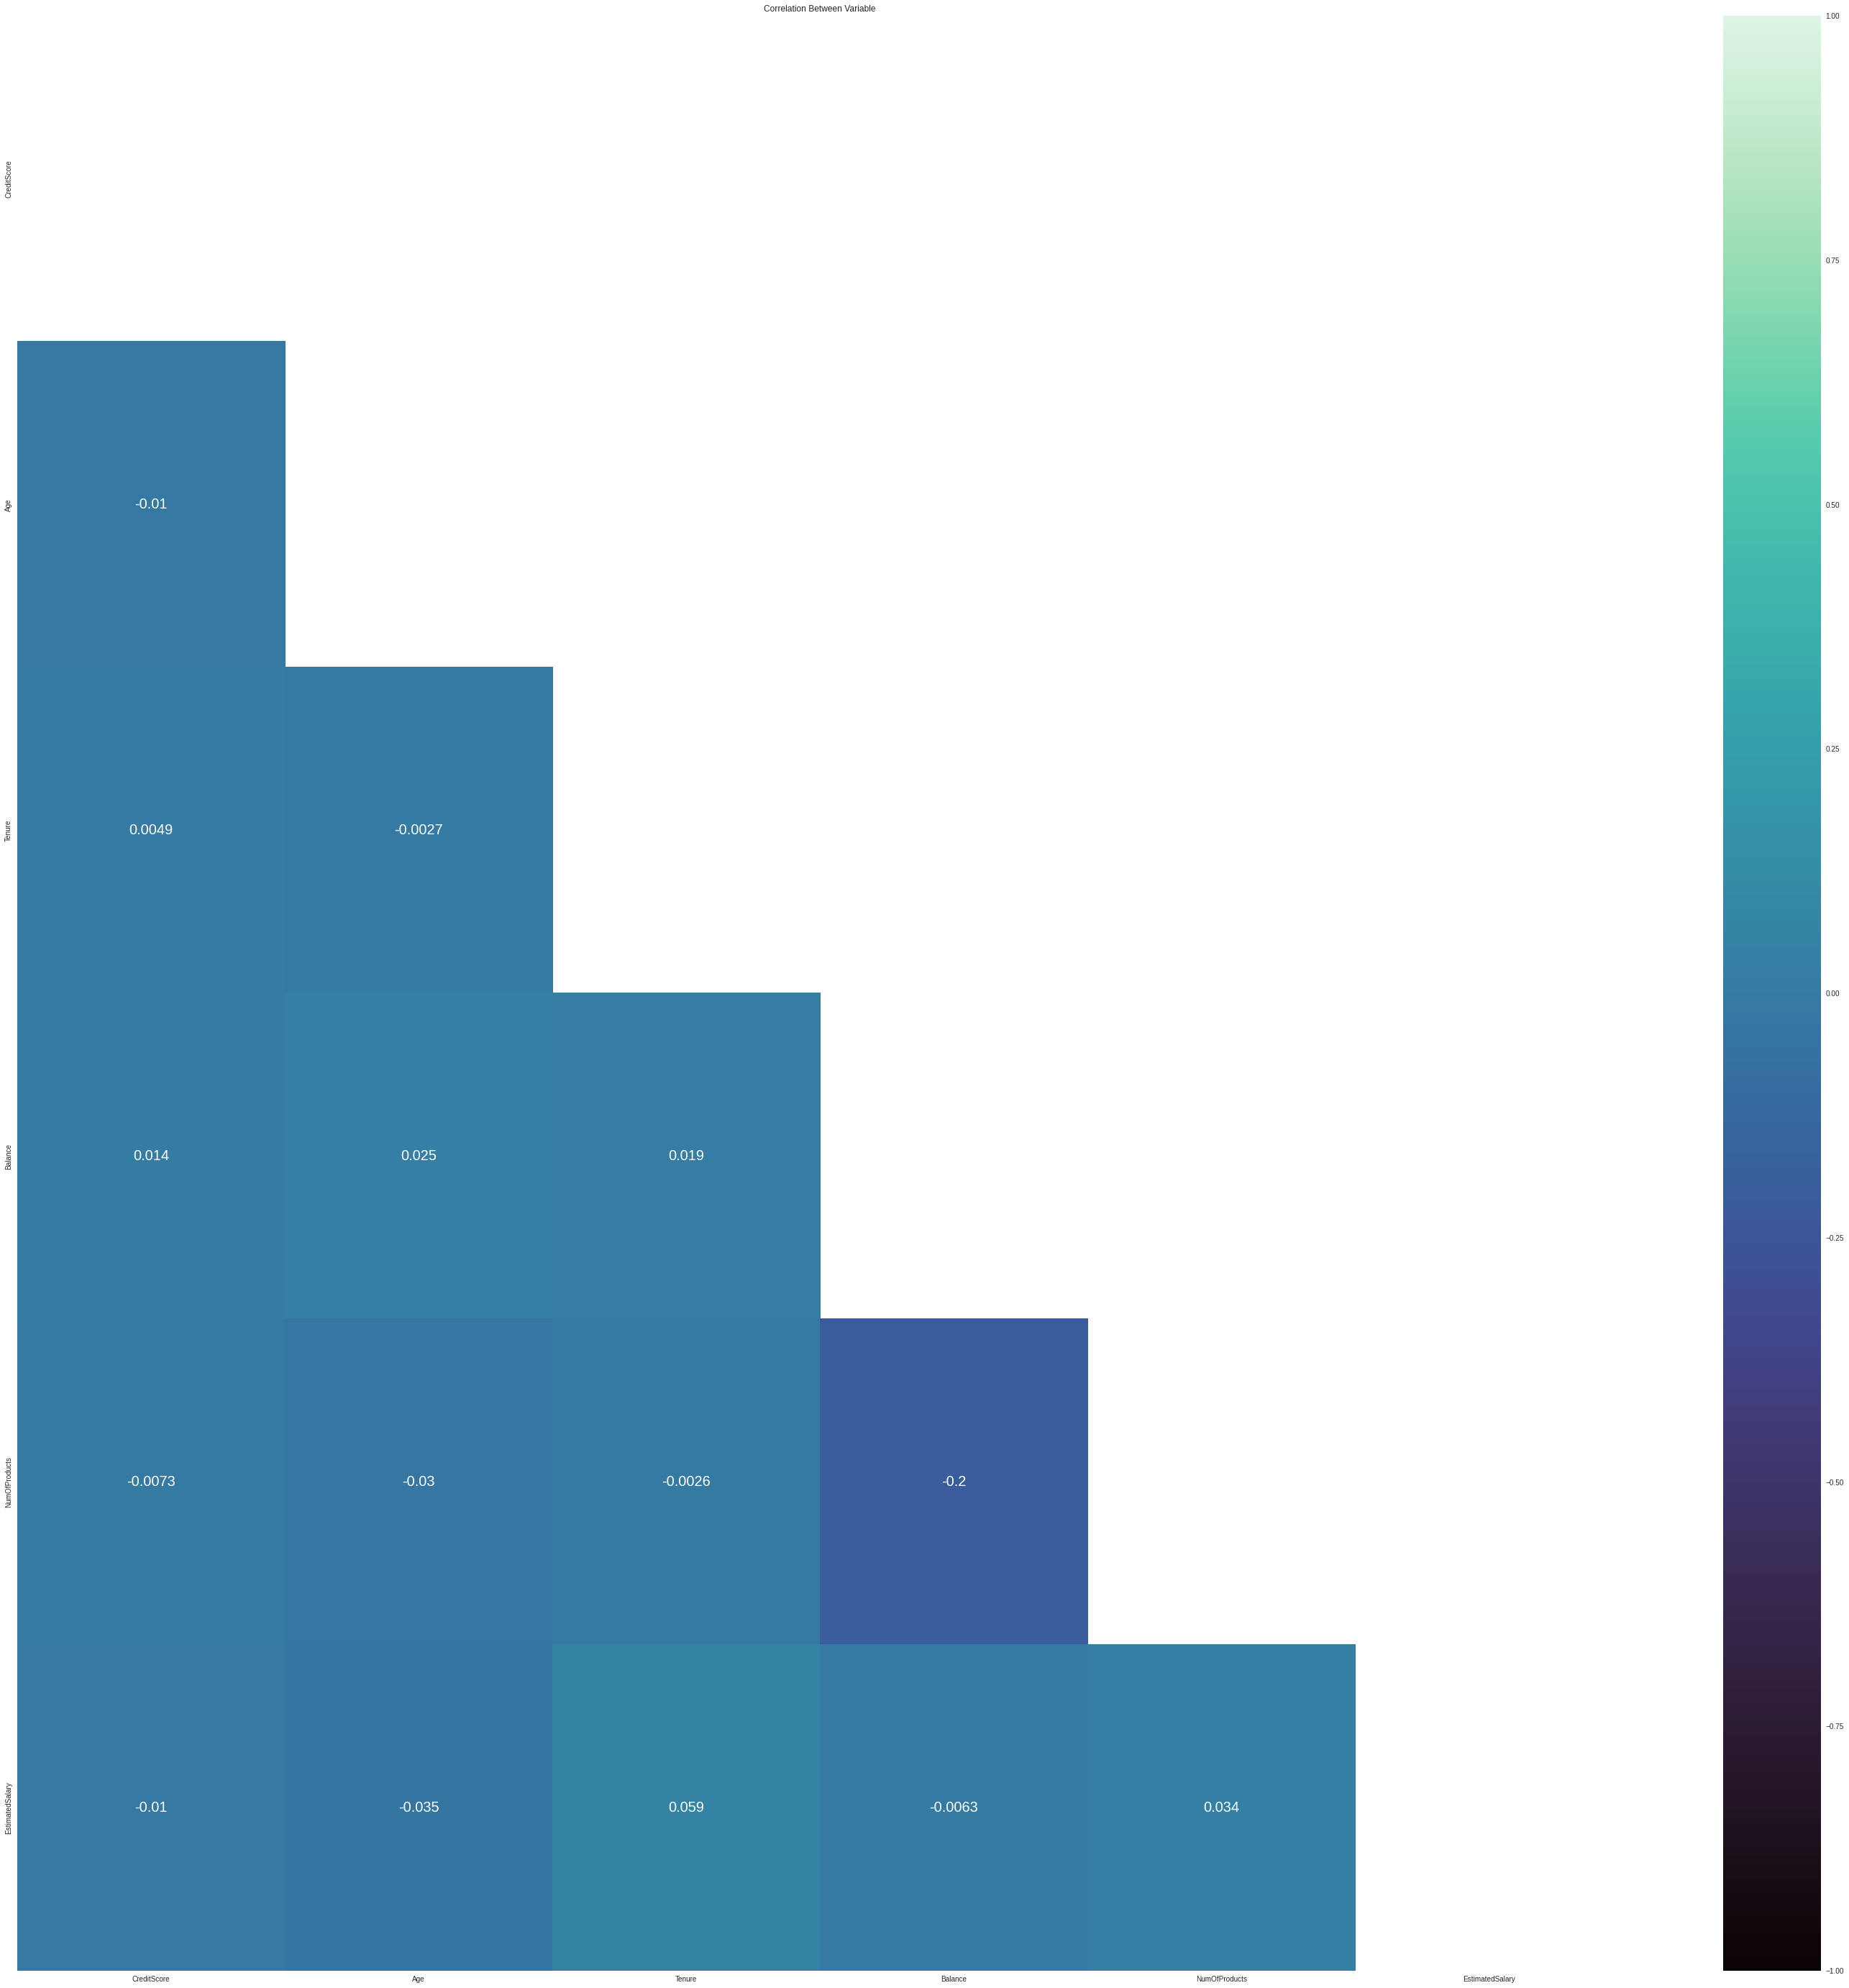

In [ ]:
columns_list = [ 'CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
fig = plt.figure(figsize=(50,50))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(df_regression_alt2[columns_list].corr(), dtype=np.bool))

sns.heatmap(df_regression_alt2[columns_list].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":20})

plt.show()

In [ ]:
# Define the whole data
x = df_regression_alt2[columns_list]
y = df_regression_alt2['Exited']

# Split into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123)

In [ ]:
# Check split result
for for_regression in [x_train, x_test, y_train, y_test]:
  print(for_regression.shape)

(1844, 6)
(462, 6)
(1844,)
(462,)


In [ ]:
# Check class balance in each datasets
for for_regression in [y_train,y_test]:
  check_balance = for_regression.value_counts()
  print(check_balance)

0    1028
1     816
Name: Exited, dtype: int64
0    250
1    212
Name: Exited, dtype: int64


In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
model.score(x_train, y_train)

0.5981561822125814

In [ ]:
model.score(x_test, y_test)

0.6471861471861472

# Decision Tree Analysis

In [ ]:
df_tree = df1[df1['Age_group']=='Gen X'] 
df_tree

CustomerId      Surname  CreditScore Geography  Gender  Age  Tenure  \
4      15737888     Mitchell          850     Spain  Female   43       2   
5      15574012          Chu          645     Spain    Male   44       8   
6      15592531     Bartlett          822    France    Male   50       7   
8      15792365           He          501    France    Male   44       4   
15     15643966      Goforth          616   Germany    Male   45       3   
...         ...          ...          ...       ...     ...  ...     ...   
9975   15666295        Smith          610   Germany    Male   50       1   
9979   15692664       Diribe          677    France  Female   58       1   
9982   15768163      Griffin          655   Germany  Female   46       7   
9986   15581736     Bartlett          673   Germany    Male   47       1   
9991   15769959  Ajuluchukwu          597    France  Female   53       4   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
4      125510              1          1               1            79084   
5      113755              2          1               0           149756   
6           0              2          1               1            10062   
8      142051              2          0               1            74940   
15     143129              2          0               1            64327   
...       ...            ...        ...             ...              ...   
9975   113957              2          1               0           196526   
9979    90022              1          0               1             2988   
9982   137145              1          1               0           115146   
9986   183579              2          0               1            34047   
9991    88381              1          1               0            69384   

      Exited Age_group CreditCategory Balancecategory EstimatedSalarycategory  
4          0     Gen X      Excellent         Level 3                    Fair  
5          1     Gen X           Poor         Level 3                    Good  
6          0     Gen X      Excellent         Level 1               Very Poor  
8          0     Gen X      Very Poor         Level 3                    Fair  
15         0     Gen X           Poor         Level 3                    Fair  
...      ...       ...            ...             ...                     ...  
9975       1     Gen X           Poor         Level 3                     NaN  
9979       0     Gen X           Fair         Level 2                     NaN  
9982       1     Gen X           Fair         Level 3                    Good  
9986       0     Gen X           Fair         Level 4                    Poor  
9991       1     Gen X           Poor         Level 2                    Fair  

[2306 rows x 17 columns]

In [ ]:
# cat.code geography
# 0 France, 1 Germany, Spain 2
df_tree['Geography'] = df_tree['Geography'].astype('category')
df_tree['Geography'] = df_tree['Geography'].cat.set_categories(['France', 'Germany', 'Spain'])
df_tree['Geography_category'] = df_tree['Geography'].cat.codes

# cat.code gender
# 0 Male, 1 Female
df_tree['Gender'] = df_tree['Gender'].astype('category')
df_tree['Gender'] = df_tree['Gender'].cat.set_categories(['Male', 'Female'])
df_tree['Gender_category'] = df_tree['Gender'].cat.codes

df_tree.drop(columns=['CustomerId', 'Surname','Gender','Geography','Age_group', 'CreditCategory','Balancecategory', 'EstimatedSalarycategory'], inplace=True)

df_tree

<ipython-input-279-85626b3258b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree['Geography'] = df_tree['Geography'].astype('category')
<ipython-input-279-85626b3258b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree['Geography'] = df_tree['Geography'].cat.set_categories(['France', 'Germany', 'Spain'])
<ipython-input-279-85626b3258b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
4             850   43       2   125510              1          1   
5             645   44       8   113755              2          1   
6             822   50       7        0              2          1   
8             501   44       4   142051              2          0   
15            616   45       3   143129              2          0   
...           ...  ...     ...      ...            ...        ...   
9975          610   50       1   113957              2          1   
9979          677   58       1    90022              1          0   
9982          655   46       7   137145              1          1   
9986          673   47       1   183579              2          0   
9991          597   53       4    88381              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_category  \
4                  1            79084       0                   2   
5                  0           149756       1                   2   
6                  1            10062       0                   0   
8                  1            74940       0                   0   
15                 1            64327       0                   1   
...              ...              ...     ...                 ...   
9975               0           196526       1                   1   
9979               1             2988       0                   0   
9982               0           115146       1                   1   
9986               1            34047       0                   1   
9991               0            69384       1                   0   

      Gender_category  
4                   1  
5                   0  
6                   0  
8                   0  
15                  0  
...               ...  
9975                0  
9979                1  
9982                1  
9986                0  
9991                1  

[2306 rows x 11 columns]

In [ ]:
columns_list = [ 'CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_category','Gender_category']

# Define the whole data
x = df_tree[columns_list]
y = df_tree['Exited']

# Split into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123)

In [ ]:
# Check split result
for for_decisiontree in [x_train, x_test, y_train, y_test]:
  print(for_decisiontree.shape)

(1844, 10)
(462, 10)
(1844,)
(462,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3,random_state=123)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

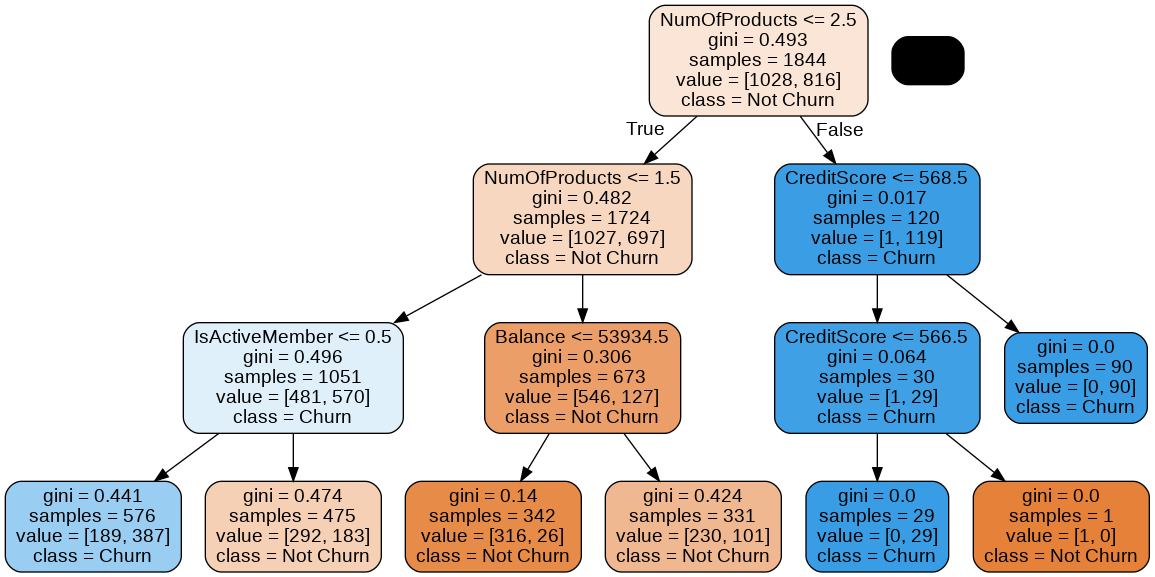

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=x.columns, class_names=["Not Churn", "Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
dt.score(x_train, y_train)

0.7293926247288504

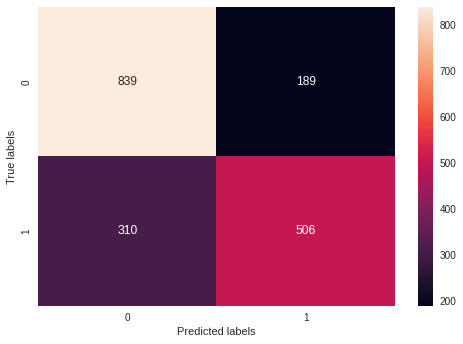

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_train, dt.predict(x_train)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
dt.score(x_test, y_test)

0.696969696969697

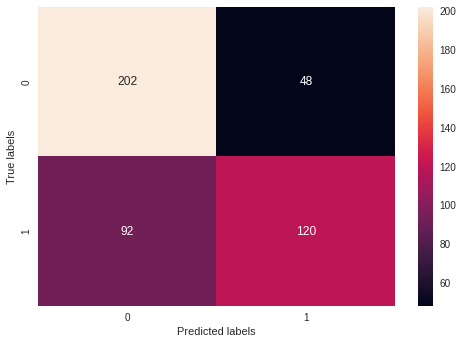

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, dt.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 763 kB/s 


In [ ]:
import dtreeviz.trees

In [ ]:
dt_viz = DecisionTreeClassifier(max_depth=3,random_state=123)
dt_viz.fit(x_train, y_train)
tree_viz1 = dtreeviz.trees.dtreeviz(dt_viz, x_train,y_train, target_name='Churn', feature_names= x_train.columns,class_names=['Not Churn','Churn'])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Feature: 0, Score: 0.00818
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.07284
Feature: 4, Score: 0.74257
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.17641
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


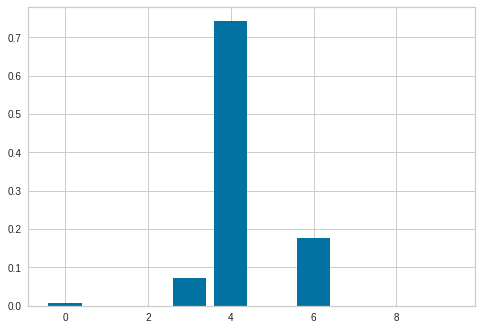

In [ ]:
from matplotlib import pyplot

# get importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

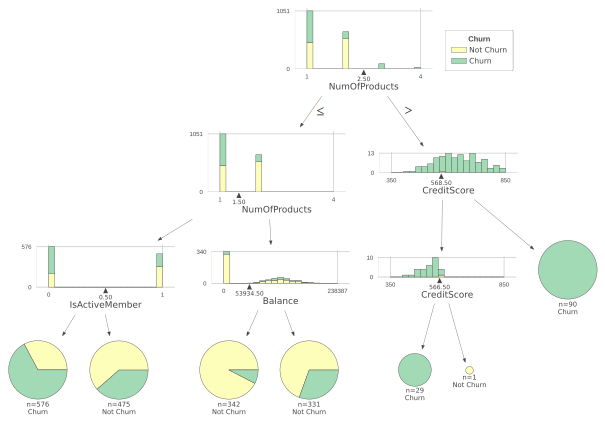

In [ ]:
tree_viz1

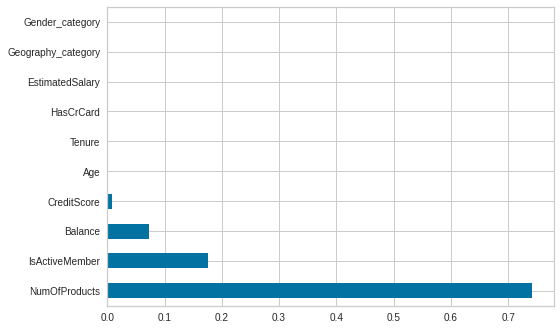

In [ ]:
(pd.Series(dt.feature_importances_, index=x.columns)
   .nlargest(10)
   .plot(kind='barh'))        

Significant Feature in Decision Tree Model
1. NumOfProducts (0.743)
2. IsActiveMember (0.176)
3. Balance (0.073)
4. Credit Score (0.008)

,